In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#to display all the columns in the dataset
pd.pandas.set_option('display.max_columns',None)

In [3]:
train=pd.read_csv(r'C:\Users\Priyanka\Downloads\Project-Housing\Project-Housing_splitted\train.csv')

In [4]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

# Exploratory data analysis/Data preprocessing
In Data analysis we will try to understand/explore the data. Gather information about the data and for that we have to always compare the dependant and independant variables.

In [5]:
#The train dataset has 1168 rows and 81 columns.
print('The shape of the dataset is',train.shape)

The shape of the dataset is (1168, 81)


In [6]:
train.info()
#We can see that we have many features with missing values represented as NaN. 
# Also the features are either of int datatype, float datatype or object datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
#The list of all the column names
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

>DATA PRE_PROCESSING
>> 1. Analysing the missing values in the dataset
>> 2. Splitting numerical and categorical features.
>> 3. Studying the distribution of numerical and categorical variables.
>> 4. Studying correlation between target variable and independant features.
>> 5. Studying outliers.
>> 6. Relationship between independant variables and dependant variable (sale price).
>> 7. Checking skewness.

In [8]:
# Checking for the null values in the features and making a list of the columns with missing values
columns_na=[i for i in train.columns if train[i].isnull().sum()!=0]
# Percentage of the missing values of the features.
null=(train[columns_na].isnull().sum()/len(train)*100).sort_values(ascending=False).to_frame().rename(columns={0:'Null Values'})
null.index.names=['Features']
null['Features']=null.index
null['Data type']=train[columns_na].dtypes
null

Null Values      Features Data type
Features                                         
PoolQC          99.400685        PoolQC    object
MiscFeature     96.232877   MiscFeature    object
Alley           93.407534         Alley    object
Fence           79.708904         Fence    object
FireplaceQu     47.174658   FireplaceQu    object
LotFrontage     18.321918   LotFrontage   float64
GarageYrBlt      5.479452   GarageYrBlt   float64
GarageType       5.479452    GarageType    object
GarageFinish     5.479452  GarageFinish    object
GarageQual       5.479452    GarageQual    object
GarageCond       5.479452    GarageCond    object
BsmtExposure     2.654110  BsmtExposure    object
BsmtFinType2     2.654110  BsmtFinType2    object
BsmtFinType1     2.568493  BsmtFinType1    object
BsmtCond         2.568493      BsmtCond    object
BsmtQual         2.568493      BsmtQual    object
MasVnrArea       0.599315    MasVnrArea   float64
MasVnrType       0.599315    MasVnrType    object

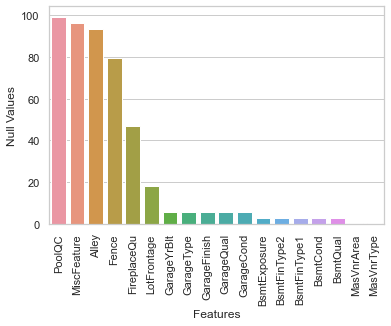

In [9]:
#plot the missing values
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Features', y = 'Null Values', data=null)
plt.xticks(rotation = 90)
plt.show()

> OBSERVATION:
>>As can be observed that many features have null-values. PoolQC, MiscFeature and Alley has more than 90% of the missing values. Let us try to see if the null values have any relation with the sale price of the house. For that we will plot the features with sale price.

([<matplotlib.patches.Wedge at 0x228862b89d0>,
 [Text(2.1788006065159147, 1.677893893261991, 'PoolQC'),
  Text(-1.0124008500891142, 2.5568622408606294, 'MiscFeature'),
  Text(-2.7453406940264693, -0.16001397977134257, 'Alley'),
  Text(-0.9935843848731836, -2.564232842418211, 'Fence'),
  Text(1.2405736643594039, -2.4542772832949993, 'FireplaceQu'),
  Text(2.1548742556534335, -1.7085130793535241, 'LotFrontage'),
  Text(2.3956908478180927, -1.350246407764386, 'GarageYrBlt'),
  Text(2.4870290995302478, -1.1735357932716688, 'GarageType'),
  Text(2.565354452852768, -0.9906848798828395, 'GarageFinish'),
  Text(2.630257085534554, -0.8026503996107365, 'GarageQual'),
  Text(2.6813974071122426, -0.6104162064786136, 'GarageCond'),
  Text(2.710294661737818, -0.46562092581356856, 'BsmtExposure'),
  Text(2.724944760050534, -0.3703728589855607, 'BsmtFinType2'),
  Text(2.736092910137743, -0.27621655832693204, 'BsmtFinType1'),
  Text(2.7438854534926307, -0.18328289094059297, 'BsmtCond'),
  Text(2.748522

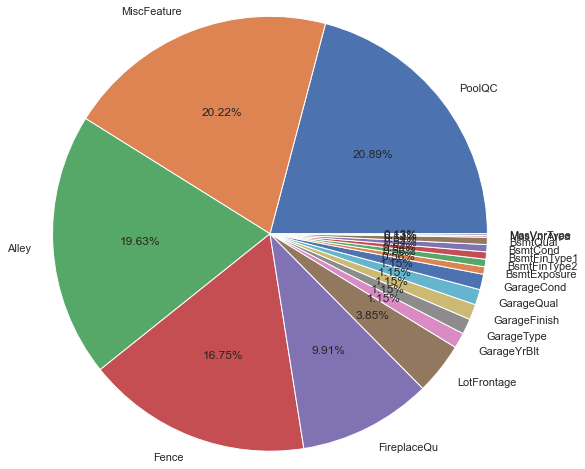

In [10]:
#Pie plot for the percentage values

plt.pie(null['Null Values'],labels=null.index,radius=2.5,autopct = "%0.2f%%")

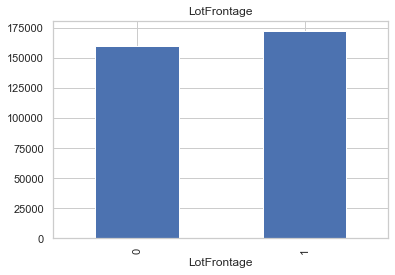

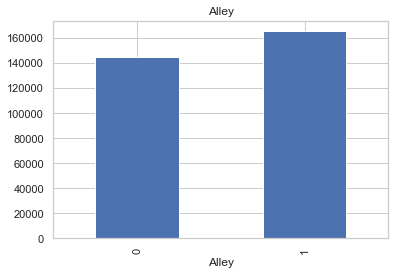

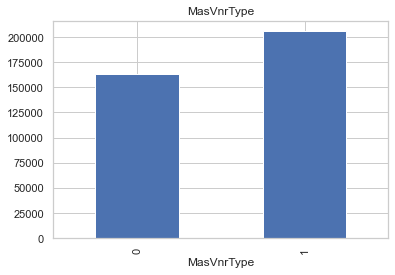

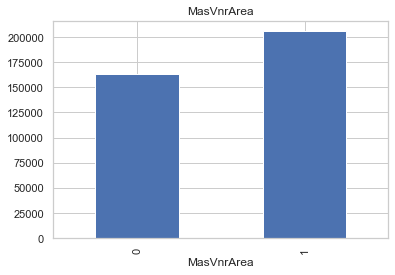

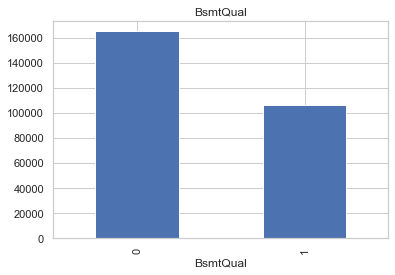

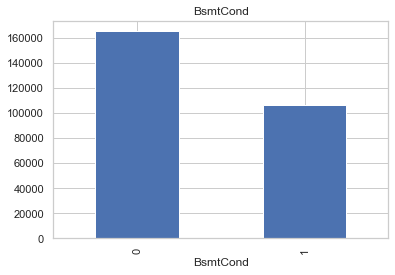

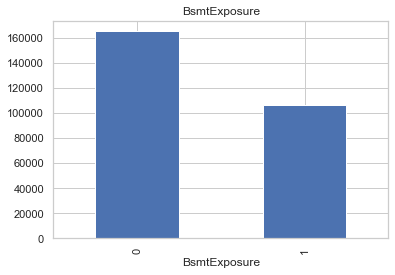

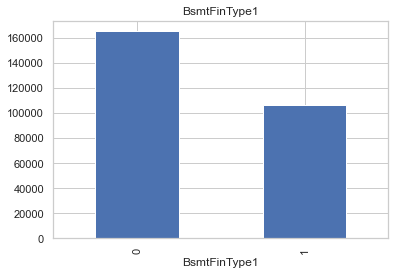

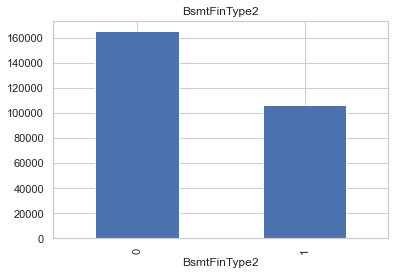

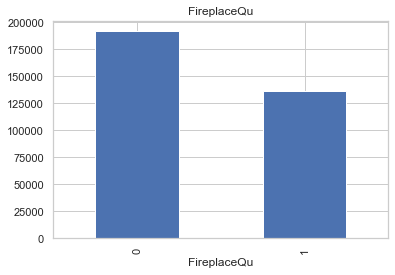

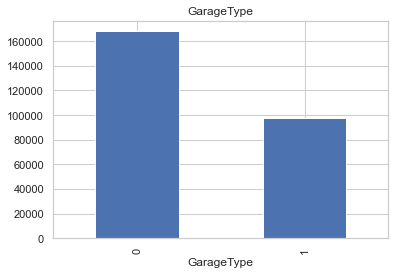

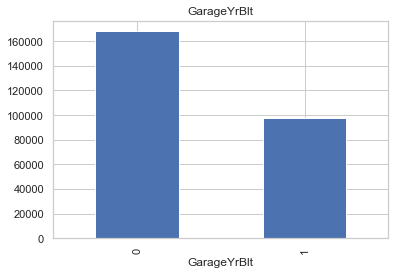

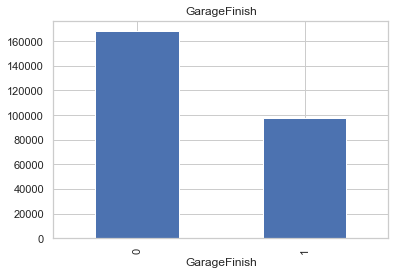

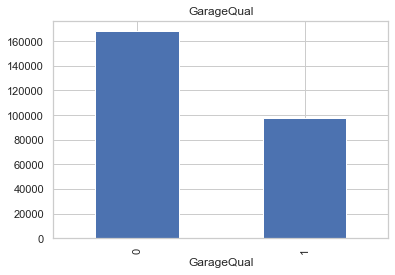

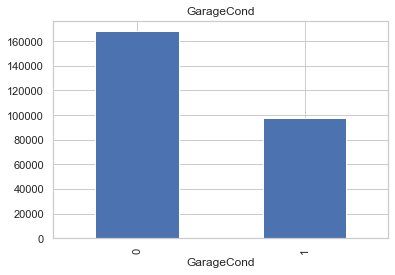

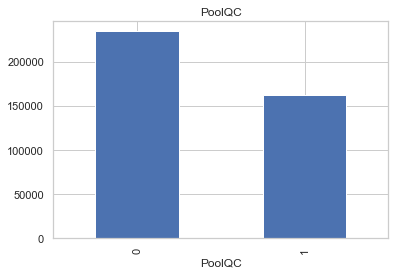

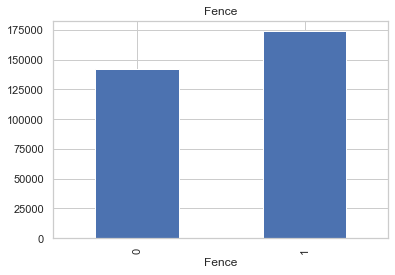

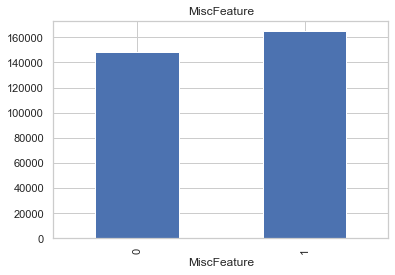

In [11]:
#We will replace every missing response with 1 and 0 otherwise for the features having null-values.
#This way we will be able to generate countplot for the features and the sale price.
for features in columns_na:
    data=train.copy()
    
    data[features]=np.where(data[features].isnull(),1,0)
    #Claculating the median of the sale price for missing entries
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(features)
    plt.show()

>OBSERVATION:
>>We can observe a relationship between the null-values and the sale price. It implies that the null-values are important and we should wisely replace the null responses in feature engineering.

In [12]:
print(len(train['Id'].unique()))
#Id column in the dataset is count of the rows and therefore is unique to every row. 
#We must drop this column in the feature engineering.

1168


<AxesSubplot:ylabel='None'>

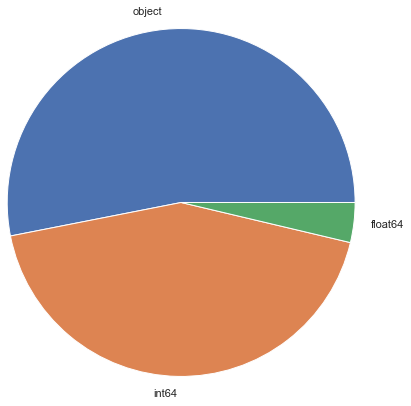

In [13]:
train.dtypes.value_counts().plot.pie(radius=2)
#We have three datatypes in the datatset- object comprises of more than half pf the dataset, int64 and float64.

In [14]:
#Analysing Numerical feature
numerical_col=[i for i in train.columns if train[i].dtypes!='object']
print('Number of numerical features is: ',len(numerical_col))

#Visualizing the numerical variables
train[numerical_col]

Number of numerical features is:  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     127         120          NaN     4928            6            5   
1     889          20         95.0    15865            8            6   
2     793          60         92.0     9920            7            5   
3     110          20        105.0    11751            6            6   
4     422          20          NaN    16635            6            7   
...   ...         ...          ...      ...          ...          ...   
1163  289          20          NaN     9819            5            5   
1164  554          20         67.0     8777            4            5   
1165  196         160         24.0     2280            6            6   
1166   31          70         50.0     8500            4            4   
1167  617          60          NaN     7861            6            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          1976          1976         0.0         120           0        958   
1          1970          1970         0.0         351         823       1043   
2          1996          1997         0.0         862           0        255   
3          1977          1977       480.0         705           0       1139   
4          1977          2000       126.0        1246           0        356   
...         ...           ...         ...         ...         ...        ...   
1163       1967          1967        31.0         450           0        432   
1164       1949          2003         0.0           0           0          0   
1165       1976          1976         0.0         566           0        289   
1166       1920          1950         0.0           0           0        649   
1167       2002          2003         0.0         457           0        326   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0            1078       958         0             0        958             0   
1            2217      2217         0             0       2217             1   
2            1117      1127       886             0       2013             1   
3            1844      1844         0             0       1844             0   
4            1602      1602         0             0       1602             0   
...           ...       ...       ...           ...        ...           ...   
1163          882       900         0             0        900             0   
1164            0      1126         0             0       1126             0   
1165          855       855       601             0       1456             0   
1166          649       649       668             0       1317             0   
1167          783       807       702             0       1509             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         0             2             1   
1                0         2         0             4             1   
2                0         2         1             3             1   
3                0         2         0             3             1   
4                1         2         0             3             1   
...            ...       ...       ...           ...           ...   
1163             0         1         0             3             1   
1164             0         2         0             2             1   
1165             0         2         1             3             1   
1166             0         1         0             3             1   
1167             0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                5           1       1977.0           2         440   
1                8           1       1970.0           2         621   
2                8           1       1997.0           2         455   
3                7           1       1977.0           2         546   
4           

In [15]:
#In the  numerical features one thing to be observed is the presence of date_time features. 
#We will extract information from these year features.
#let us look ot the number of year features.
year_col=[i for i in numerical_col if 'Yr' in i or 'Year' in i]
print(year_col)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [16]:
#Exploring the entries of year features.
for i in year_col:
    print('Number of unique entries in column {} are: {}'.format(i,len(train[i].unique())))
    print('Unique entries in column ',i,'are:\n',train[i].unique(),'\n\n')

Number of unique entries in column YearBuilt are: 110
Unique entries in column  YearBuilt are:
 [1976 1970 1996 1977 2006 1957 1965 1947 1937 2003 1960 1955 1923 1930
 2007 2001 1972 1950 1961 1953 1918 2010 1922 1934 2005 1946 1941 1948
 1975 1978 1956 2004 1982 2000 2002 1920 1992 1936 1967 1989 1929 1968
 1959 1935 1966 1931 1916 1998 1962 1974 1926 1904 1995 1969 1985 1963
 1958 1892 2008 1971 1980 1945 1986 1981 1949 1940 1954 1925 1915 1921
 1924 1999 1951 1993 1964 1900 1919 1910 1938 1880 1988 1911 1990 1979
 1927 1983 1994 2009 1928 1917 1898 1997 1984 1973 1952 1939 1987 1890
 1942 1991 1932 1908 1914 1882 1905 1875 1906 1893 1912 1913] 


Number of unique entries in column YearRemodAdd are: 61
Unique entries in column  YearRemodAdd are:
 [1976 1970 1997 1977 2000 2006 1996 1965 1950 2003 1960 1955 2007 2001
 1961 1998 1953 2010 1995 2005 1992 1975 1978 1982 2002 1989 1967 1968
 1959 2004 1966 2008 1987 1981 1969 1985 1963 1991 1993 1971 1990 1956
 1986 1999 1954 1957 1994 19

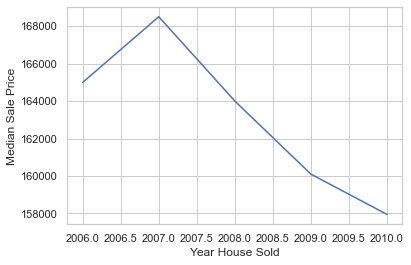

In [17]:
#Analyzing the relationship if any between YrSold: Year in which the house is sold and target 'Saleprice'
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year House Sold')
plt.ylabel('Median Sale Price')
plt.show()

>OBSERVATION
>>As the years increase we were expecting to see a price rise but here we can see a fall in the price as the year increase.
We will try to understand years datatype more.

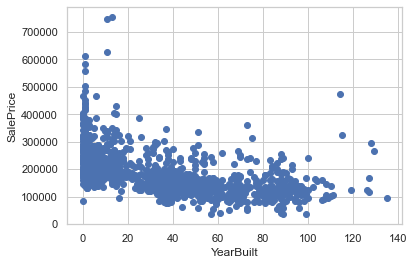

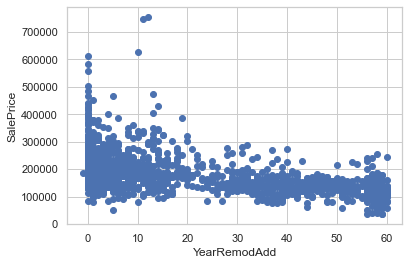

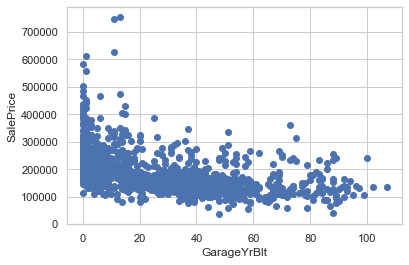

In [18]:
# We will compare the difference between the remaining year features and year sold with the sale price of the house.
for i in year_col:
    if i!='YrSold':
        data=train.copy()
        #Calculating the difference between year features and year in which the house was sold
        data[i]=data['YrSold']-data[i]
        
        plt.scatter(data[i],data['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()

> Observations:
>>1. As can be observed that as the year built increases the sale price drops. So a new house costs higher than an old house.
>>2. Also as the year in which remodification was done increases the price gradually decreases.
>>3. The years in which garage was buit increases the price at which the house was sold drops.

> Conclusion:
>>We can conclude that years features have an inverse relationship with the target variable 'YrSold'.

> DISCRETE FEATURES

In [19]:
#After analyzing year based numerical features, We will now analyze the discrete numerical variable and continuous numerical variables
discrete_col=[i for i in numerical_col if len(train[i].unique())<25 and i not in year_col]
print('The number of discrete numerical variables are:',len(discrete_col))
print('\nThe features names are:\n',discrete_col)

The number of discrete numerical variables are: 17

The features names are:
 ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [20]:
train[discrete_col]

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0            120            6            5             0             0   
1             20            8            6             0             1   
2             60            7            5             0             1   
3             20            6            6             0             0   
4             20            6            7             0             0   
...          ...          ...          ...           ...           ...   
1163          20            5            5             0             0   
1164          20            4            5             0             0   
1165         160            6            6             0             0   
1166          70            4            4             0             0   
1167          60            6            5             0             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         0             2             1   
1                0         2         0             4             1   
2                0         2         1             3             1   
3                0         2         0             3             1   
4                1         2         0             3             1   
...            ...       ...       ...           ...           ...   
1163             0         1         0             3             1   
1164             0         2         0             2             1   
1165             0         2         1             3             1   
1166             0         1         0             3             1   
1167             0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  \
0                5           1           2          0         0        0   
1                8           1           2          0         0        0   
2                8           1           2          0         0        0   
3                7           1           2          0         0        0   
4                8           1           2          0         0        0   
...            ...         ...         ...        ...       ...      ...   
1163             5           0           1          0         0        0   
1164             5           0           2          0         0        0   
1165             7           1           2          0         0        0   
1166             6           0           1          0         0        0   
1167             7           1           2          0         0        0   

      MoSold  
0          2  
1         10  
2          6  
3          1  
4          6  
...      ...  
1163       2  
1164       5  
1165       7  
1166       7  
1167       6  

[1168 rows x 17 columns]

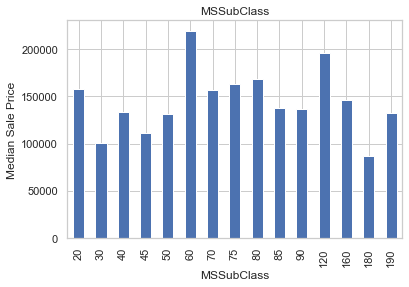

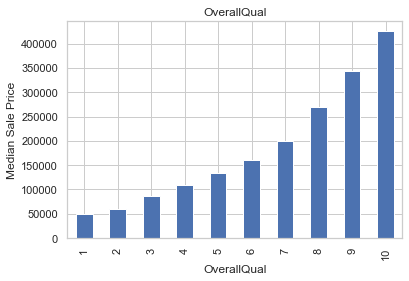

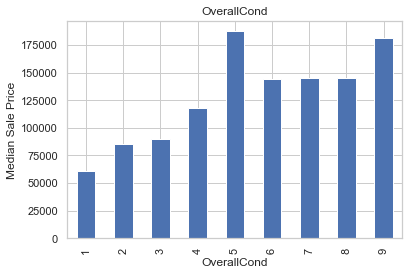

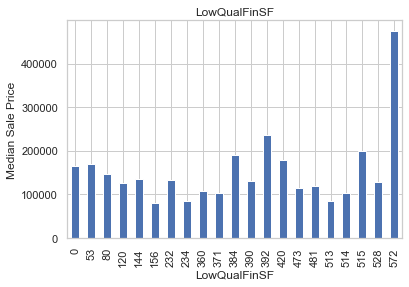

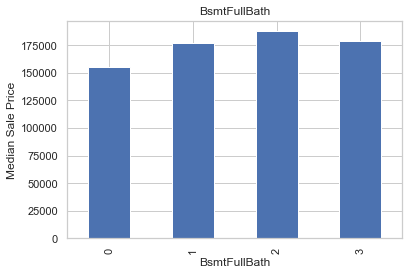

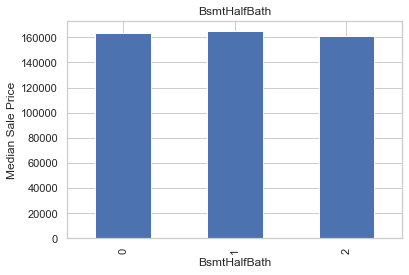

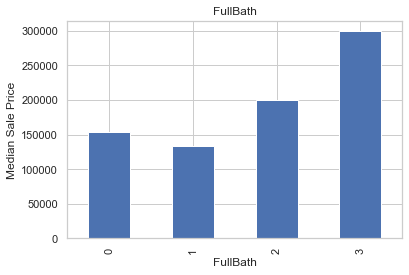

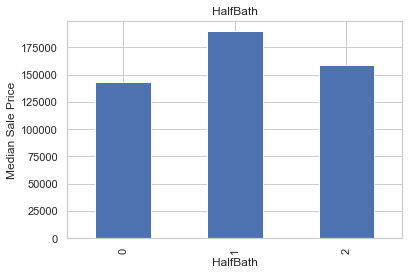

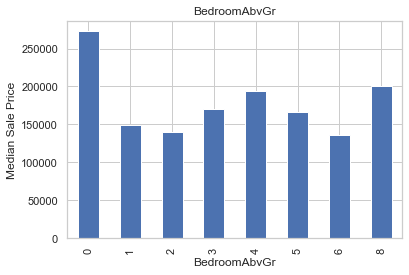

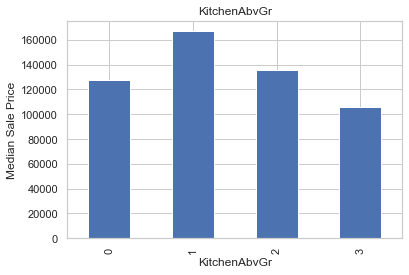

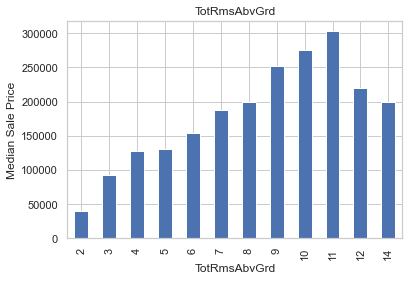

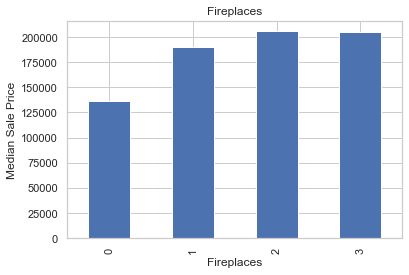

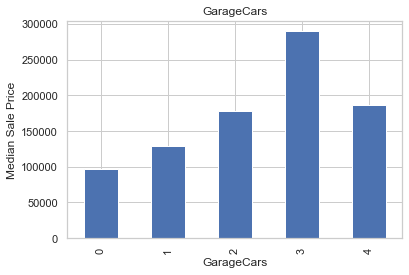

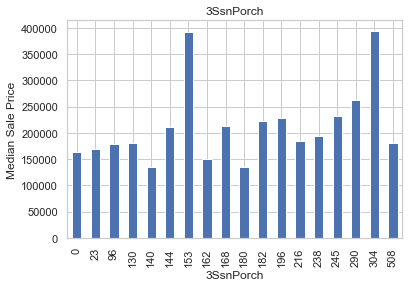

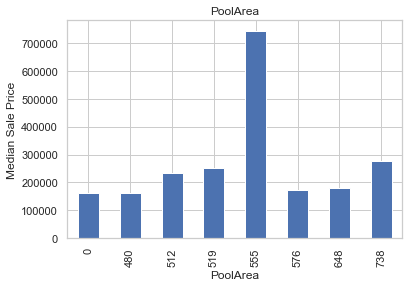

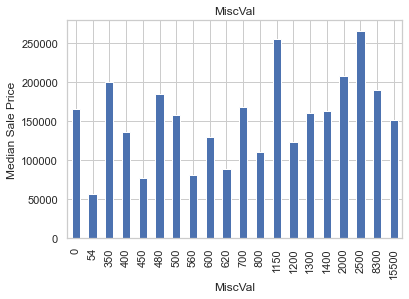

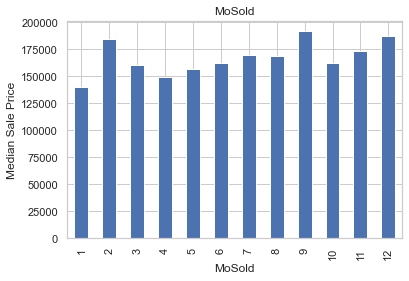

In [21]:
#Visualizing the discrete features with the target variable 'Sale Price'
for i in discrete_col:
    data=train.copy()
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Median Sale Price')
    plt.title(i)
    plt.show()

> Observations:
    >>1. We can see a higher house selling price at above 200000 for MSSubClass 60 and close to 200000 for MSSubClass 120.
    >>2. We can see an exponential rise in the house price as the Over all quality of the house increases.
    >>3. We also have a monotonic relation of full bath with Sale Price.
    >>4.  Apart from that we can see a mixed zig-zag pattern for other features woth the target variable.
    
>Conclusion:
>>1. We were able to find some relationship between discrete variables and the House sale price.

In [22]:
#Null-valus in Discrete features
discrete_null=[i for i in discrete_col if train[i].isnull().sum()!=0]
#Discrete features doesnot have null-values
discrete_null

[]

In [23]:
#Skewness of discrete variables
train[discrete_col].skew()

MSSubClass       1.422019
OverallQual      0.175082
OverallCond      0.580714
LowQualFinSF     8.666142
BsmtFullBath     0.627106
BsmtHalfBath     4.264403
FullBath         0.057809
HalfBath         0.656492
BedroomAbvGr     0.243855
KitchenAbvGr     4.365259
TotRmsAbvGrd     0.644657
Fireplaces       0.671966
GarageCars      -0.358556
3SsnPorch        9.770611
PoolArea        13.243711
MiscVal         23.065943
MoSold           0.220979
dtype: float64

> CONTINUOUS FEATURES

In [24]:
#Let us move forward and analyze continuous features with the target variable.
cts_col=[i for i in numerical_col if i not in discrete_col+year_col+['Id']]
print('The number of continuous variables are:',len(cts_col))
print('The continuous features are:',cts_col)

The number of continuous variables are: 16
The continuous features are: ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


In [25]:
train[cts_col]

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             NaN     4928         0.0         120           0        958   
1            95.0    15865         0.0         351         823       1043   
2            92.0     9920         0.0         862           0        255   
3           105.0    11751       480.0         705           0       1139   
4             NaN    16635       126.0        1246           0        356   
...           ...      ...         ...         ...         ...        ...   
1163          NaN     9819        31.0         450           0        432   
1164         67.0     8777         0.0           0           0          0   
1165         24.0     2280         0.0         566           0        289   
1166         50.0     8500         0.0           0           0        649   
1167          NaN     7861         0.0         457           0        326   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0            1078       958         0        958         440           0   
1            2217      2217         0       2217         621          81   
2            1117      1127       886       2013         455         180   
3            1844      1844         0       1844         546           0   
4            1602      1602         0       1602         529         240   
...           ...       ...       ...        ...         ...         ...   
1163          882       900         0        900         280           0   
1164            0      1126         0       1126         520           0   
1165          855       855       601       1456         440          87   
1166          649       649       668       1317         250           0   
1167          783       807       702       1509         393         100   

      OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0             205              0            0     128000  
1             207              0          224     268000  
2             130              0            0     269790  
3             122              0            0     190000  
4               0              0            0     215000  
...           ...            ...          ...        ...  
1163            0              0            0     122000  
1164           96              0            0     108000  
1165            0              0            0     148500  
1166           54            172            0      40000  
1167           75              0            0     183200  

[1168 rows x 16 columns]

In [26]:
#We will confirm if sum BsmtFin1, BsmtFin2, BsmtUnfSF equals TotalBsmtSf
total_bsmt_area=train['BsmtFinSF1']+train['BsmtFinSF2']+train['BsmtUnfSF']

In [27]:
bsmt=train['TotalBsmtSF']

In [28]:
similar=np.where(total_bsmt_area==bsmt,'true','False')

In [29]:
np.unique(similar)

array(['true'], dtype='<U5')

>OBSERVATION:
>> Here we can see that TotalBsmtArea is actually the sum of BsmtFin1+BsmtFin2+BsmtUnfSF.

In [30]:
i=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SalePrice']
bsmt=train[i].corr()
bsmt

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  SalePrice
BsmtFinSF1     1.000000   -0.052145  -0.499861     0.518940   0.362874
BsmtFinSF2    -0.052145    1.000000  -0.213580     0.098167  -0.010151
BsmtUnfSF     -0.499861   -0.213580   1.000000     0.414186   0.215724
TotalBsmtSF    0.518940    0.098167   0.414186     1.000000   0.595042
SalePrice      0.362874   -0.010151   0.215724     0.595042   1.000000

> OBSERVATION
>> None is highly correlated with Sale price or with each other. We can consider dropping these columns.

> VISUALIZING CONTINUOUS VARIABLES

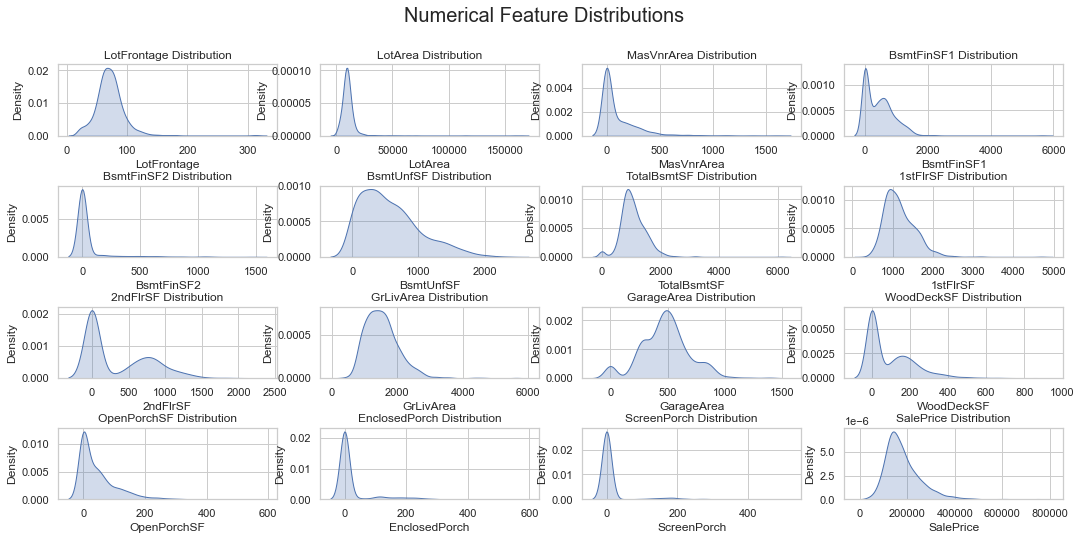

In [31]:
#As now we are visualizing continuous features, we need to see the distribution of these variables too.
# Take a look on the numerical distributions :
sns.set_style('whitegrid')
fig, axes = plt.subplots(4,4, figsize=(18, 8));
plt.subplots_adjust(hspace = 0.7, wspace=0.2)
fig.suptitle('Numerical Feature Distributions', fontsize=20)

# Take a look on the numerical distributions
a = len(cts_col)  # number of rows

for i,col in zip(range(a),cts_col):
    sns.kdeplot(train[col], fill= True,ax=axes[i//4][i%4]);
    axes[i//4][i%4].set_title(col+' Distribution')

> Observations:
>> 1. The feature LotFrontAge and SalePrice has somewhat Gaussian like distribution.
>> 2. Other features does not have gaussian distribution indicating that the data is skewed.

>Conclusion:
    >> For the features with non-Gaussian distribution we will handle the skewness using log transformation method.
 

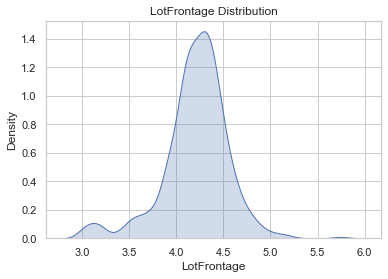

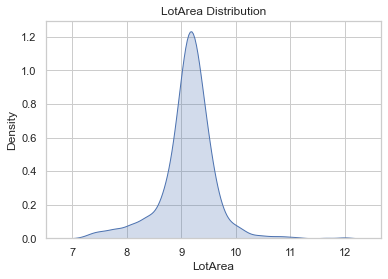

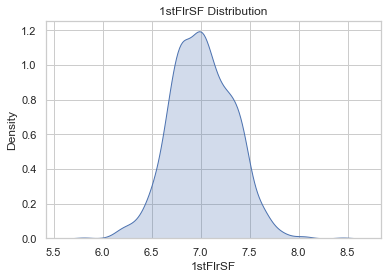

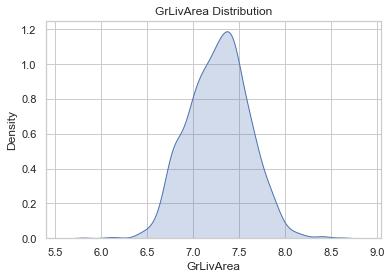

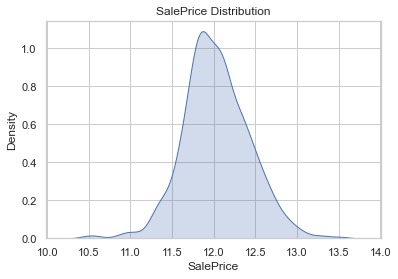

In [32]:
#Using log transformation to treat the skewness and visualizing again to see the difference

for i in cts_col:
    data=train.copy()
    if 0 in data[i].unique():  # excluding those features which have 0 as an entry.
        pass
    else:
        sns.kdeplot(np.log(data[i]),fill=True)
        plt.title(i+' Distribution')
        plt.show()

>OBSERVATION:
>>After log transformation of the continuous features we can see a monotonic relationship between the continuous features and the target variables. This transformation would give us a positive correlation between these features and target variable 'SalePrice'.

In [33]:
#checking for Null-values in continuous variables
null_cts=[i for i in cts_col if train[i].isnull().sum()!=0]
null_cts

['LotFrontage', 'MasVnrArea']

> Analyzing Target variable- SalePrice

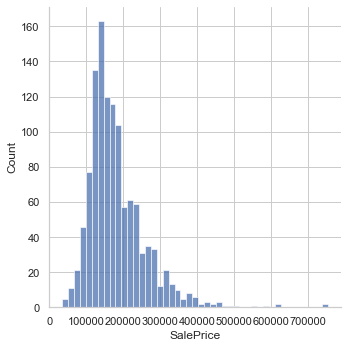

In [34]:
sns.displot(train['SalePrice'])

> OBSERVATION:
>>We see that our target variable Sale Price has a right skewed distribution. Visualizing it again after applying log transformation to see if it becomes Normally Distributed

In [35]:
print('The skewness of the Sale Price is {}'.format(train['SalePrice'].skew()))

The skewness of the Sale Price is 1.953877705368286


Skewness of Sale price after log tranformation is: 0.07359740998337982


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

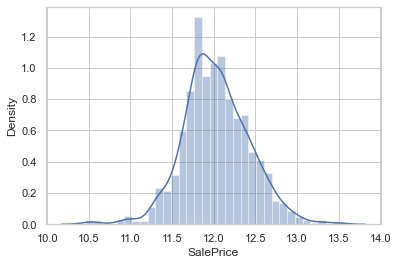

In [36]:
#Log transforming Sale Price to check the distribution
target=np.log(train['SalePrice'])
print('Skewness of Sale price after log tranformation is: {}'.format(target.skew()))
sns.distplot(target)

> OBSERVATION
>>As we observed that log transformation of the Sale price has helped us fix its skewness and the new distribution looks closer to Gaussian Distribution.

>CHECKING OUTLIERS

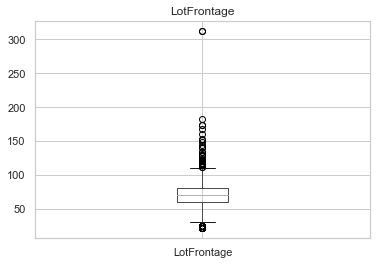

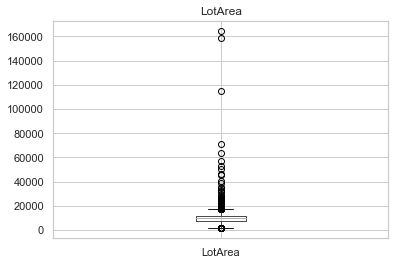

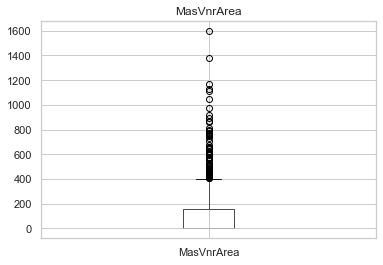

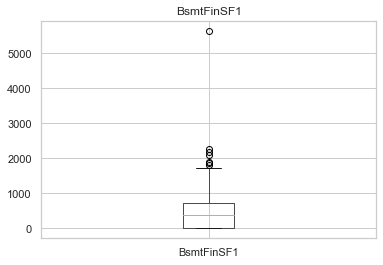

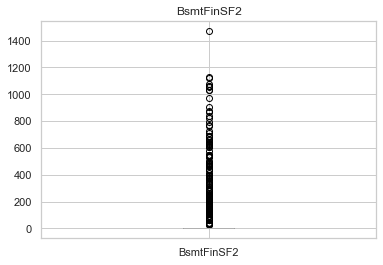

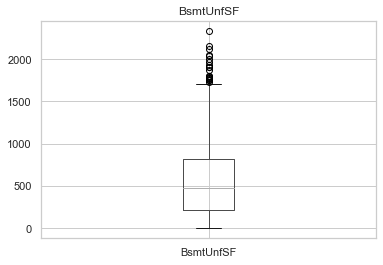

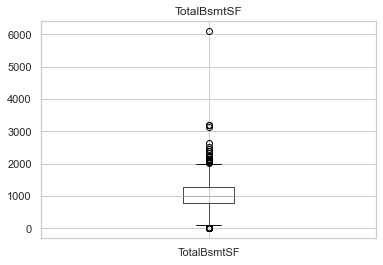

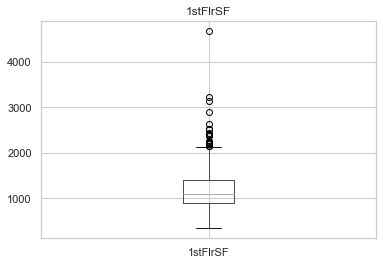

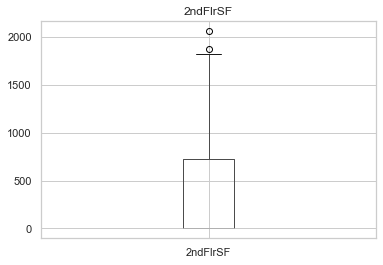

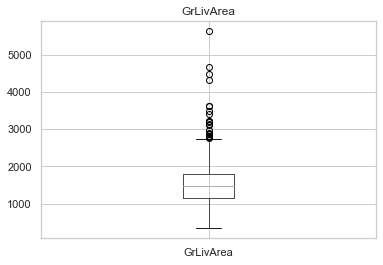

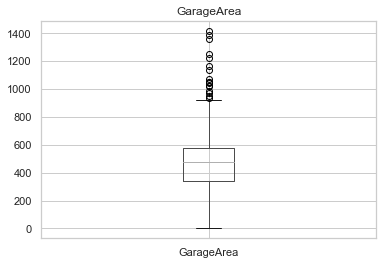

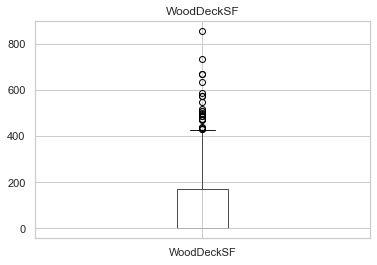

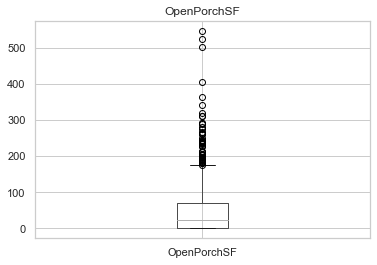

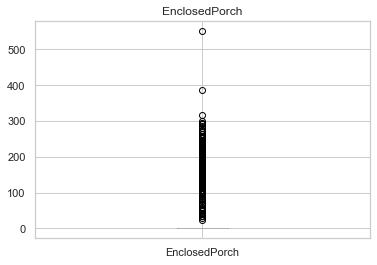

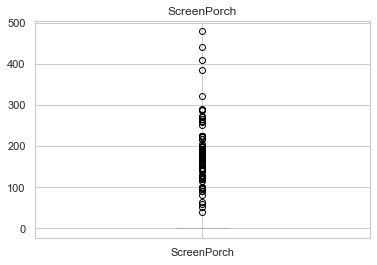

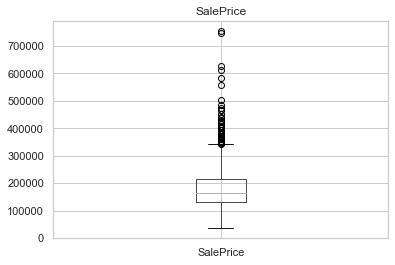

In [37]:
#Checking for outliers in the continuous features
for i in cts_col:
    data=train.copy()
    #Plotting boxplot for outliers
    data.boxplot(column=i)
    plt.title(i)
    plt.show()

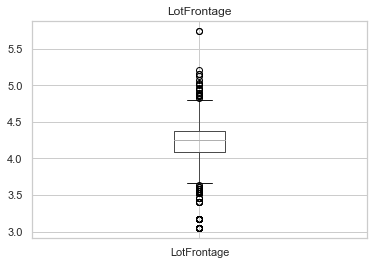

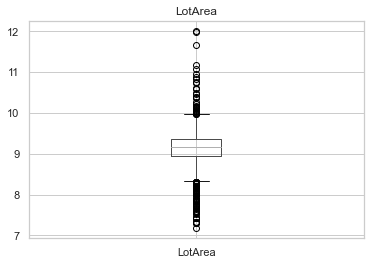

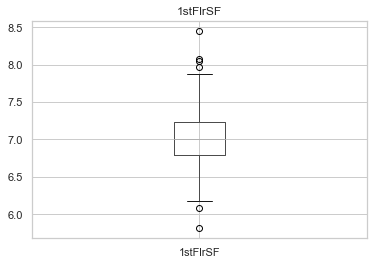

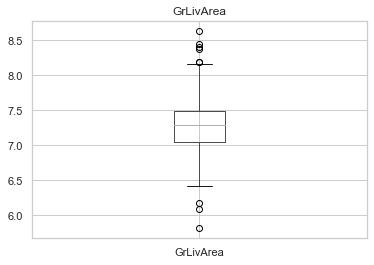

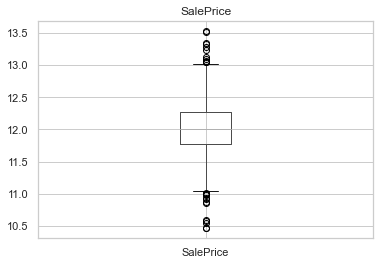

In [38]:
#Checking for outliers in the continuous features after applying log transformation
for i in cts_col:
    data=train.copy()
    if 0 in data[i].unique():  # as 0 would cause an error in log transformation method
        pass
    else:
        data[i]=np.log(data[i])
        #Plotting boxplot for outliers
        data.boxplot(column=i)
        plt.title(i)
        plt.show()

>Observation:
    The presence of outliers in the features can be seen. These outliers are to be treated properly in the feature engineering part.

CATEGORICAL VARIABLES

In [39]:
cat_col=[i for i in train.columns if train[i].dtypes=='object']
print('The number of categorical features is:',len(cat_col))
print('The categorical variables are:\n',cat_col)

The number of categorical features is: 43
The categorical variables are:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [40]:
train[cat_col]

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2          RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1163       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1164       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1165       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
1166  C (all)   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
1167       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         NPkVill       Norm       Norm   TwnhsE     1Story     Gable   
1           NAmes       Norm       Norm     1Fam     1Story      Flat   
2         NoRidge       Norm       Norm     1Fam     2Story     Gable   
3          NWAmes       Norm       Norm     1Fam     1Story       Hip   
4          NWAmes       Norm       Norm     1Fam     1Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1163       Sawyer       Norm       Norm     1Fam     1Story     Gable   
1164      Edwards      Feedr       Norm     1Fam     1Story     Gable   
1165      NPkVill       Norm       Norm    Twnhs     2Story     Gable   
1166       IDOTRR      Feedr       Norm     1Fam     2Story   Gambrel   
1167      Gilbert       Norm       Norm     1Fam     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     Plywood     Plywood       None        TA        TA   
1     Tar&Grv     Wd Sdng     Wd Sdng       None        Gd        Gd   
2     CompShg     MetalSd     MetalSd       None        Gd        TA   
3     CompShg     Plywood     Plywood    BrkFace        TA        TA   
4     CompShg     CemntBd     CmentBd      Stone        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1163  CompShg     MetalSd     MetalSd    BrkFace        TA        Gd   
1164  CompShg     VinylSd     VinylSd       None        TA        TA   
1165  CompShg     Plywood     Brk Cmn       None        TA        TA   
1166  CompShg     BrkFace     BrkFace       None        TA        Fa   
1167  CompShg     VinylSd     VinylSd       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0        CBlock       Gd       TA           No          ALQ          Unf   
1         PConc       TA       Gd           Gd          ALQ          Rec   
2         PConc       Gd       TA           Av          GLQ          Unf   
3        CBlock       Gd       TA           No          BLQ          Unf   
4        CBlock       Gd       TA           No          ALQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1163     CBlock       TA       TA           No          BLQ          Unf   
1164     CBlock      NaN      NaN          NaN          NaN          NaN   
1165     CBlock       Gd       TA           No          ALQ          Unf   
1166     BrkTil       TA       TA           No          Unf          Unf   
1167      PConc       Gd       TA           No          GLQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        TA          Y      SBrkr          TA        Typ   
1       GasA        Ex          Y      SBrkr          Gd        Typ   
2       GasA        Ex          Y      SBrkr          TA        Typ   
3       GasA        Ex          Y      SBrkr          TA        Typ   
4       GasA        Gd

In [41]:
#Checking for the number of categories each feature has
for i in cat_col:
    print('The feature {} has {} different categories.'.format(i,len(train[i].unique())))
    print('The different categories of the feature {} are: {}\n\n'.format(i,train[i].unique()))

The feature MSZoning has 5 different categories.
The different categories of the feature MSZoning are: ['RL' 'RM' 'FV' 'RH' 'C (all)']


The feature Street has 2 different categories.
The different categories of the feature Street are: ['Pave' 'Grvl']


The feature Alley has 3 different categories.
The different categories of the feature Alley are: [nan 'Grvl' 'Pave']


The feature LotShape has 4 different categories.
The different categories of the feature LotShape are: ['IR1' 'Reg' 'IR2' 'IR3']


The feature LandContour has 4 different categories.
The different categories of the feature LandContour are: ['Lvl' 'Bnk' 'HLS' 'Low']


The feature Utilities has 1 different categories.
The different categories of the feature Utilities are: ['AllPub']


The feature LotConfig has 5 different categories.
The different categories of the feature LotConfig are: ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']


The feature LandSlope has 3 different categories.
The different categories of the feature La

>Observations:
>> 1. As can be observed some of the categorical features like Neighbourhod has 25 different categories, Exteriori1st has 14 different categories, Exterior2nd has 15 differnet categories, etc.
>> 2. Such features with a higher number of categories must be handled to decrease the number of categories.
>> 3. Rest others can be dealt with encoding techniques.    

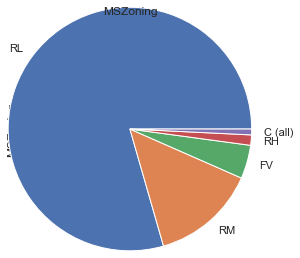

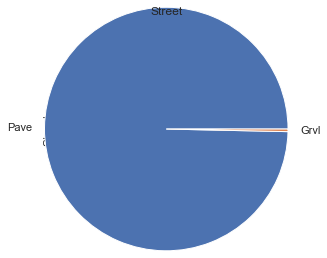

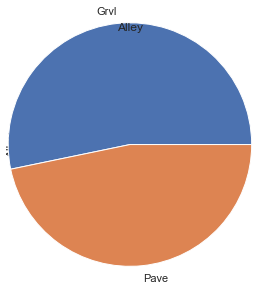

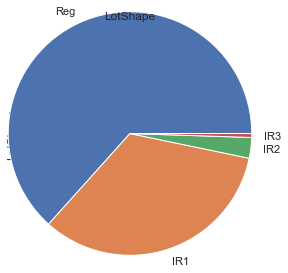

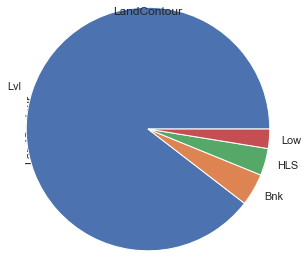

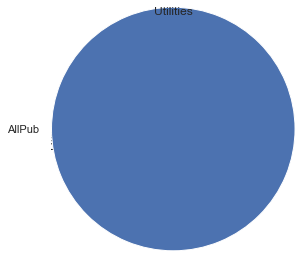

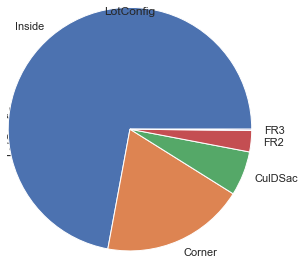

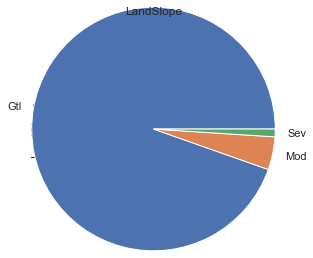

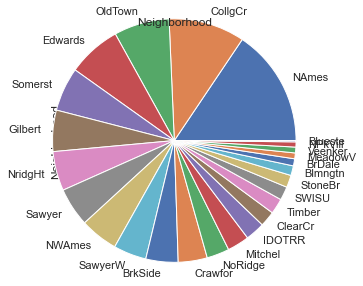

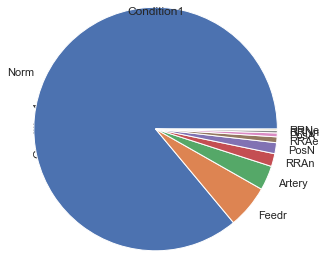

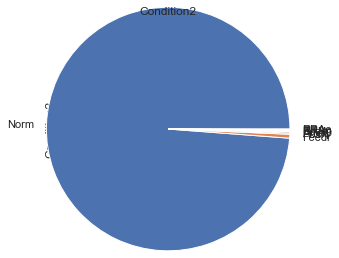

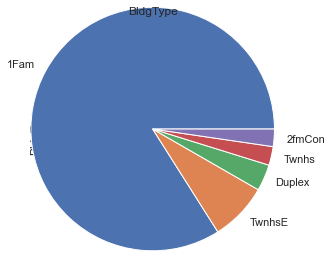

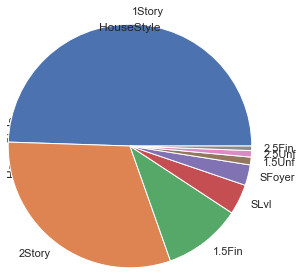

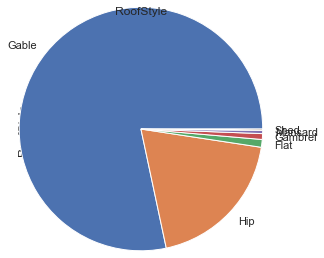

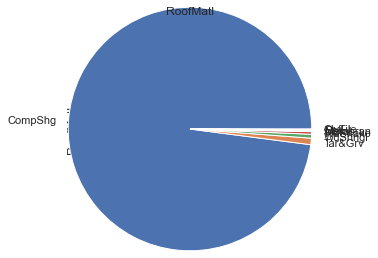

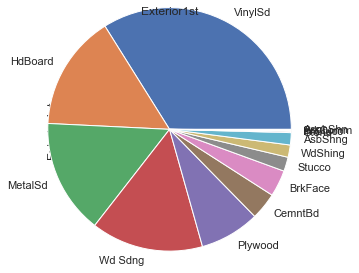

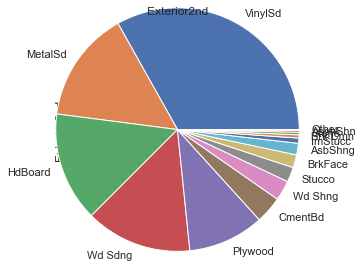

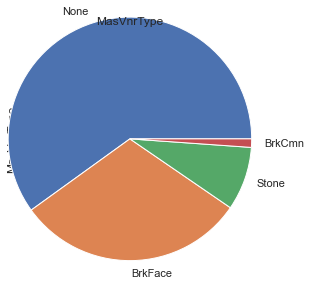

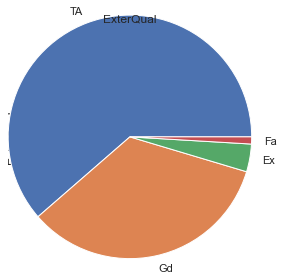

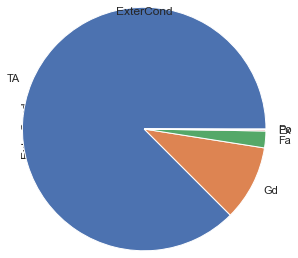

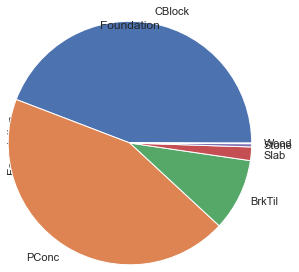

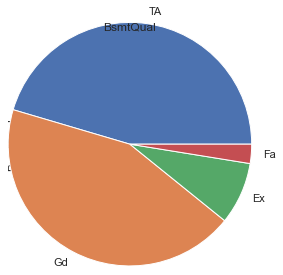

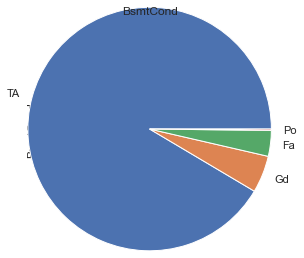

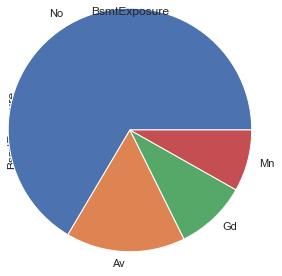

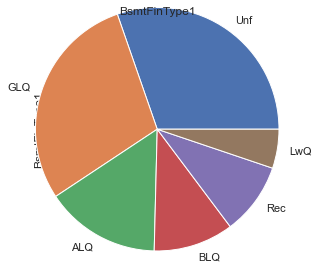

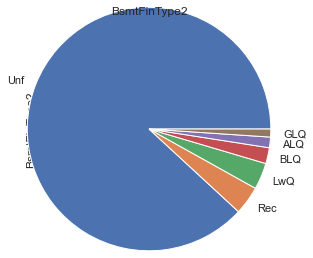

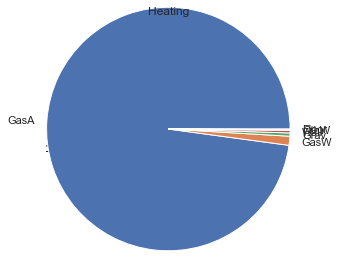

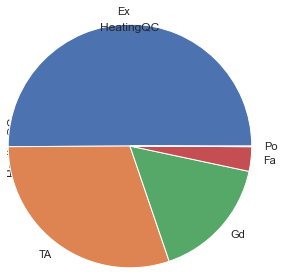

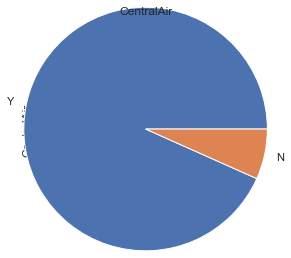

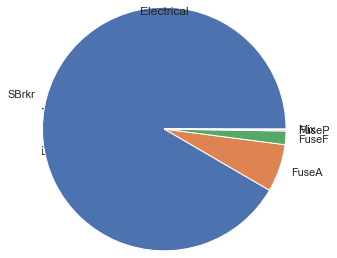

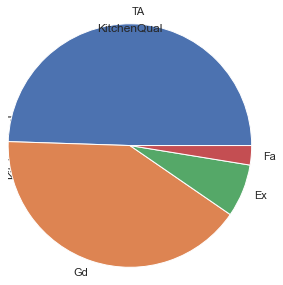

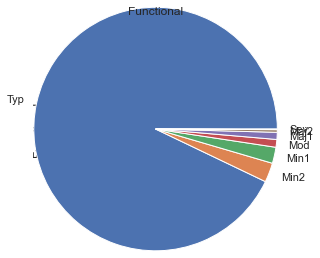

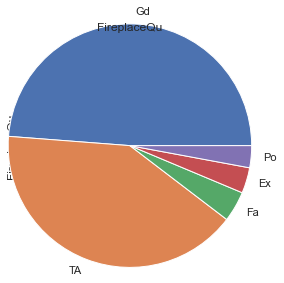

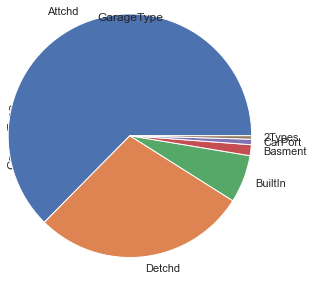

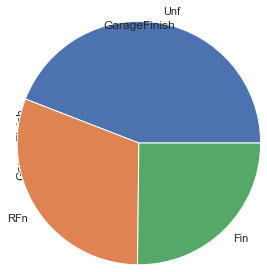

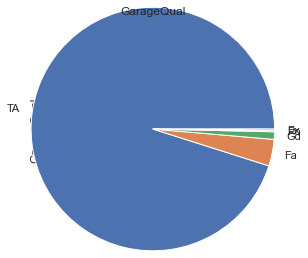

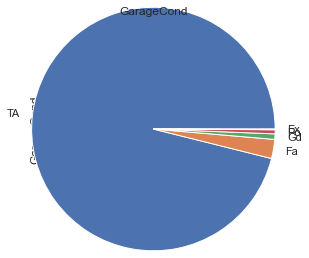

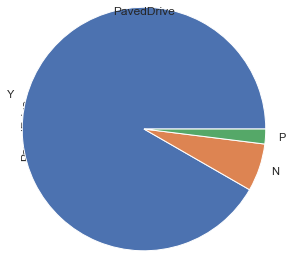

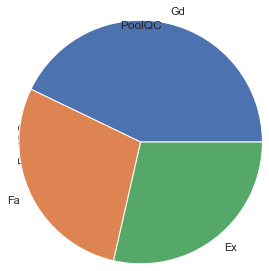

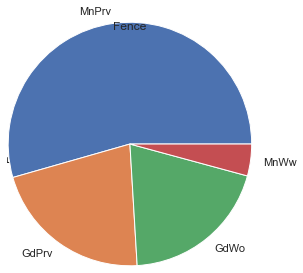

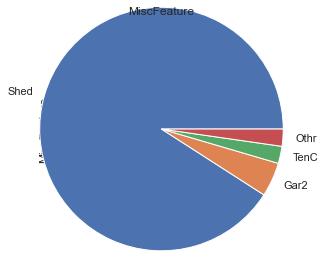

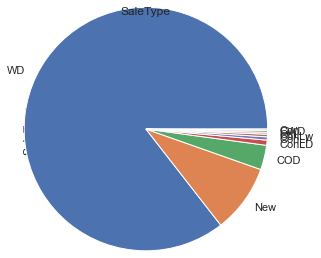

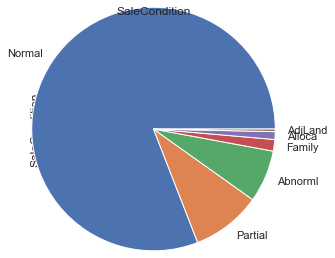

In [42]:
#Visualizing the distribution of the categorical variables
for col in cat_col:
    plt.figure()
    plt.title(col)
    train[col].value_counts().plot.pie(radius=1.4)

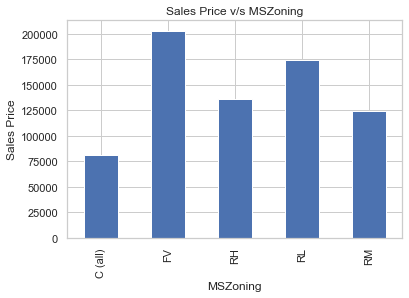

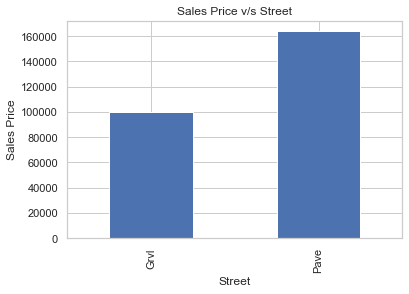

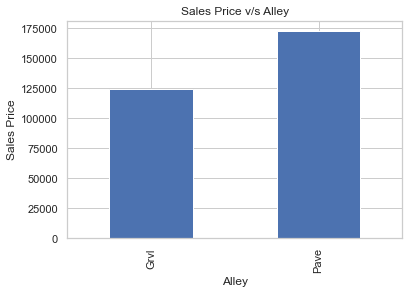

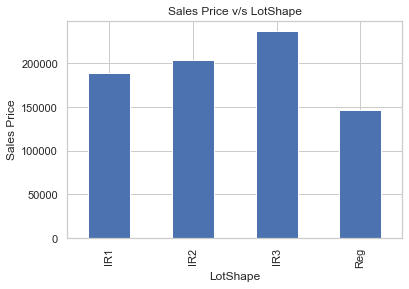

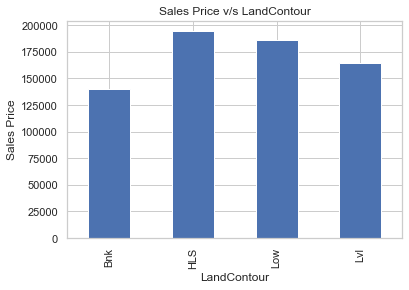

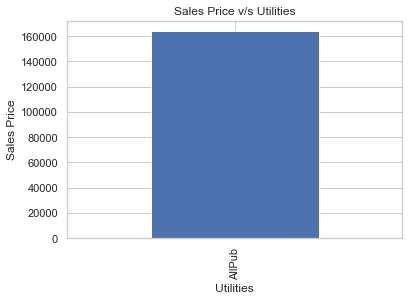

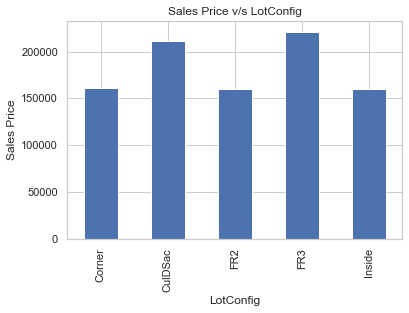

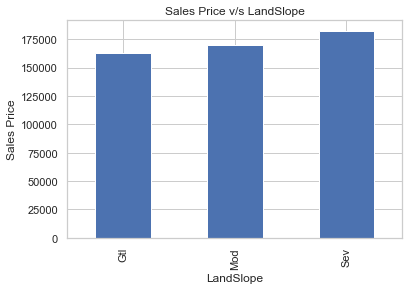

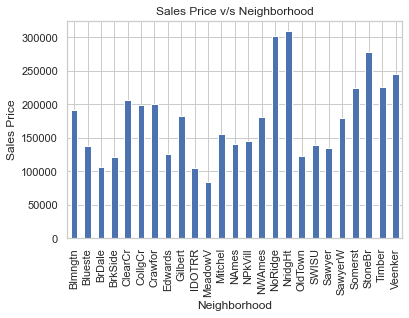

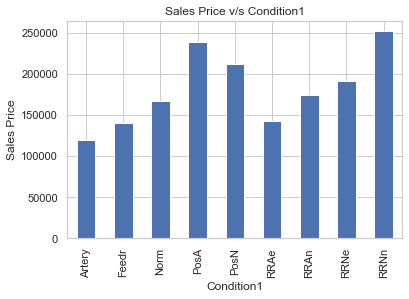

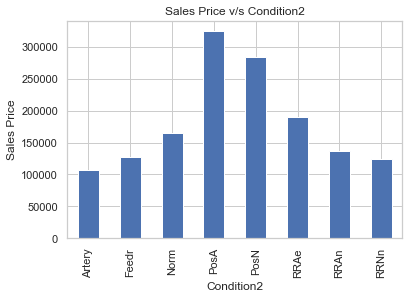

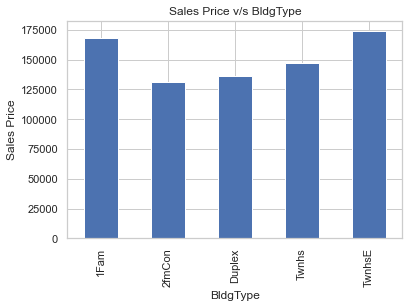

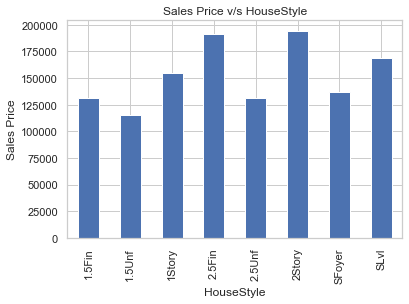

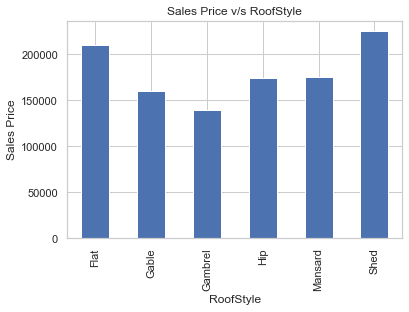

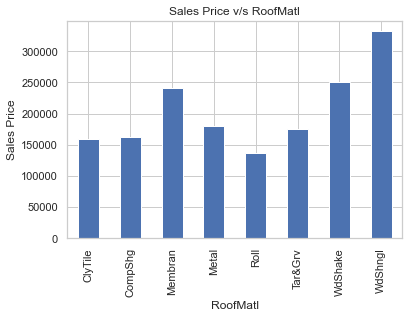

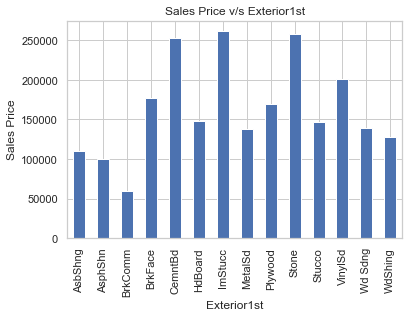

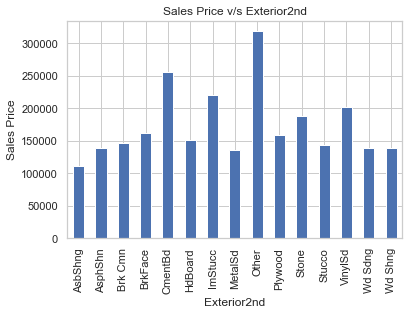

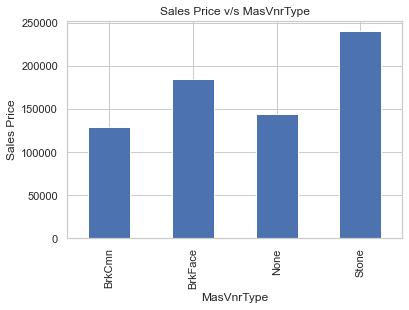

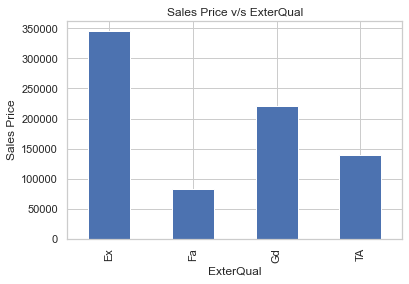

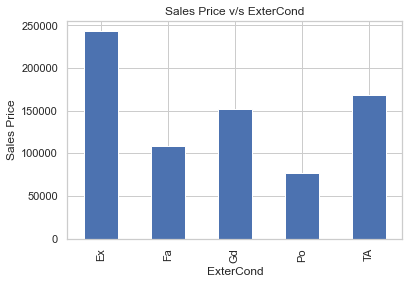

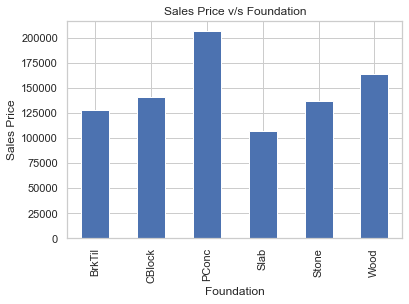

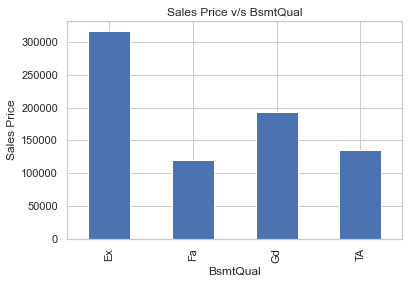

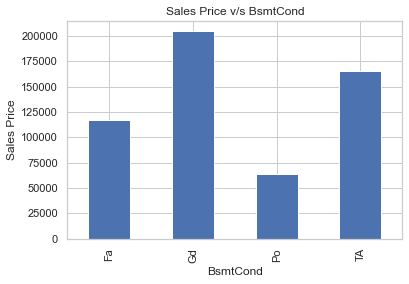

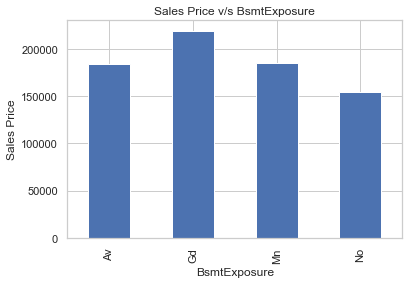

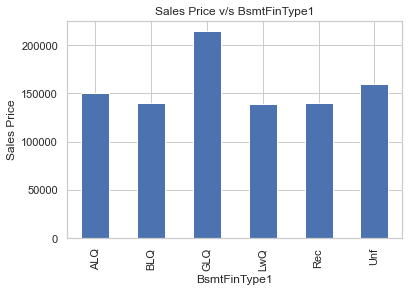

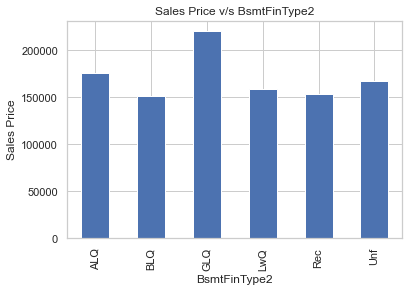

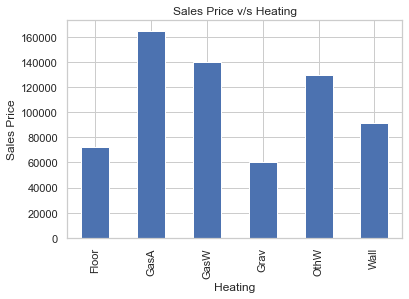

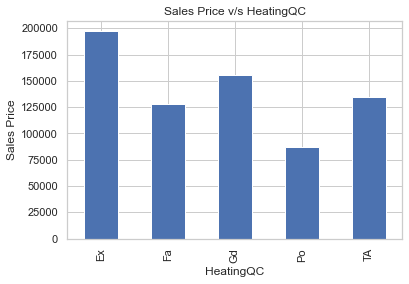

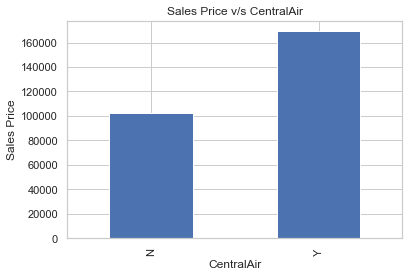

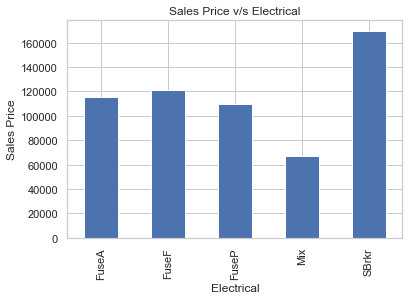

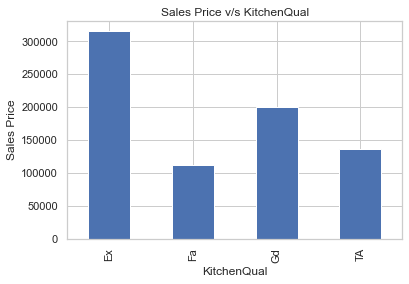

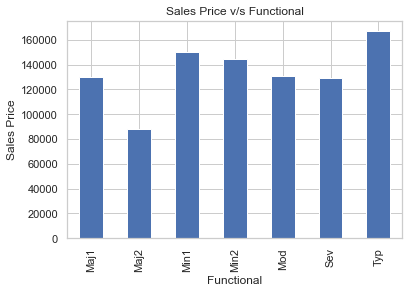

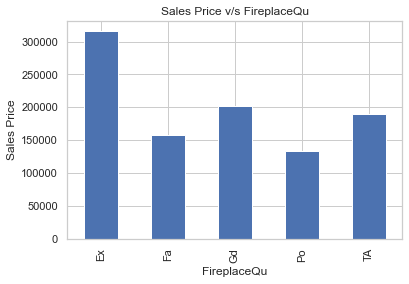

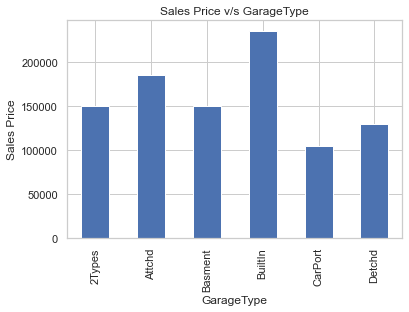

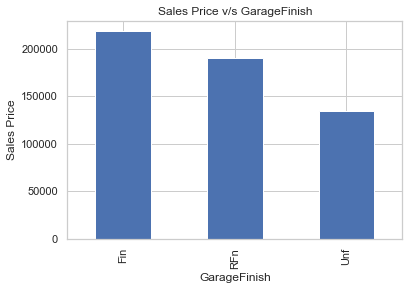

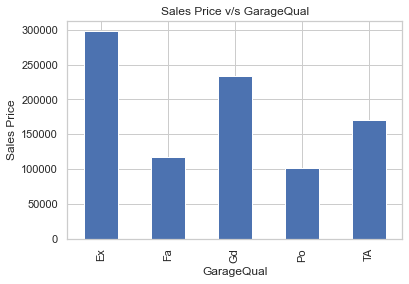

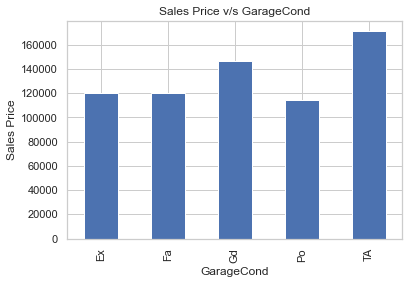

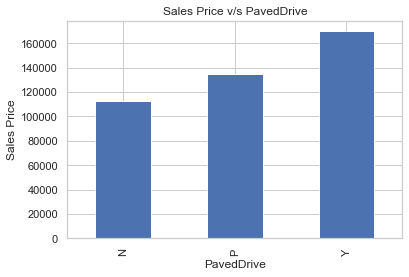

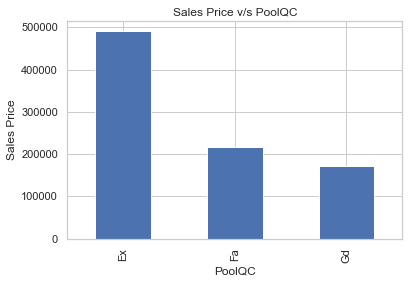

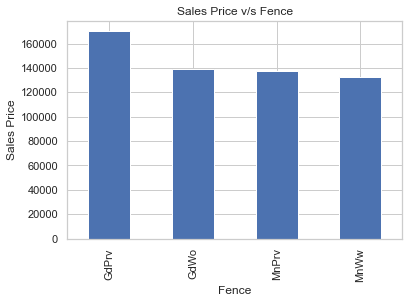

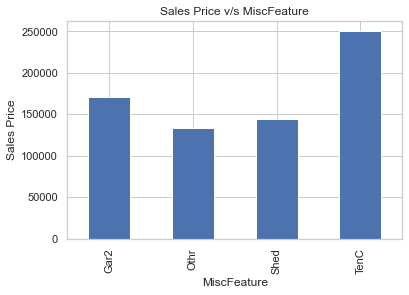

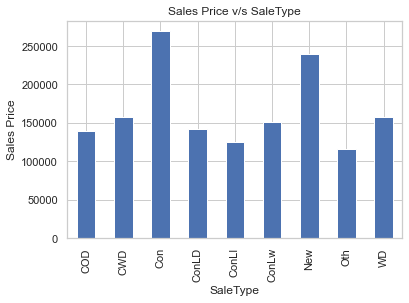

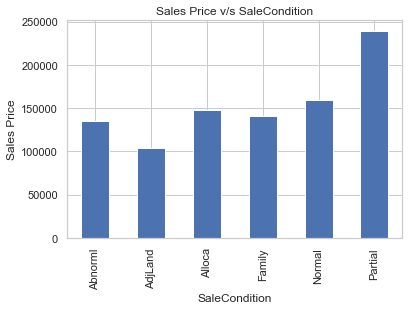

In [43]:
#Finding out the relationship between various categorical variables and the target variable 'SalePrice'
for i in cat_col:
    data=train.copy()
    data.groupby(i)['SalePrice'].median().plot.bar() #using median as data has null values
    plt.xlabel(i)
    plt.ylabel('Sales Price')
    plt.title('Sales Price v/s {}'.format(i))
    plt.show()

>Observations:
>> 1. Here we can observe the categories which corresponds to a higher selling price of the house.
>> 2. For feature MSZoning for the category FV we have house sale price to be the highest.
>> 3. Similarly, we can observe higher selling price of the house corresponding to Pave category for the feature Street.
>> 4. For other features also we see higher selling prices against one or the other category.

In [44]:
#Null values for categorical features
cat_null=[i for i in cat_col if train[i].isnull().sum()!=0]

cat_null_df=(train[cat_null].isnull().sum()/len(train)*100).sort_values(ascending=False).to_frame().rename(columns={0:'Null Values'})
print('\n Total {} categorical features have null-values.'.format(len(cat_null)))
cat_null_df


 Total 15 categorical features have null-values.


Null Values
PoolQC          99.400685
MiscFeature     96.232877
Alley           93.407534
Fence           79.708904
FireplaceQu     47.174658
GarageCond       5.479452
GarageQual       5.479452
GarageFinish     5.479452
GarageType       5.479452
BsmtFinType2     2.654110
BsmtExposure     2.654110
BsmtFinType1     2.568493
BsmtCond         2.568493
BsmtQual         2.568493
MasVnrType       0.599315

In [45]:
#describe the dataset
train[train.select_dtypes(exclude='object').columns].drop('Id',axis=1).describe().\
style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

> OBSERVATION
>> 1. The presence of outliers is confirmed seeing the huge differnece between the 75th percentile and max of the features.
>> 2. The difference between mean and 50th percentile indicates the data being skewed.

> CORRELATION

In [46]:
#lets see the correlation between columns and target column
corr = train.corr()
corr['SalePrice'].sort_values(ascending=False)[1:].to_frame().style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

> OBSERVATION
>> 1. Features namely OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd all have positive skewness with the data. They are important in predicting the House Price.

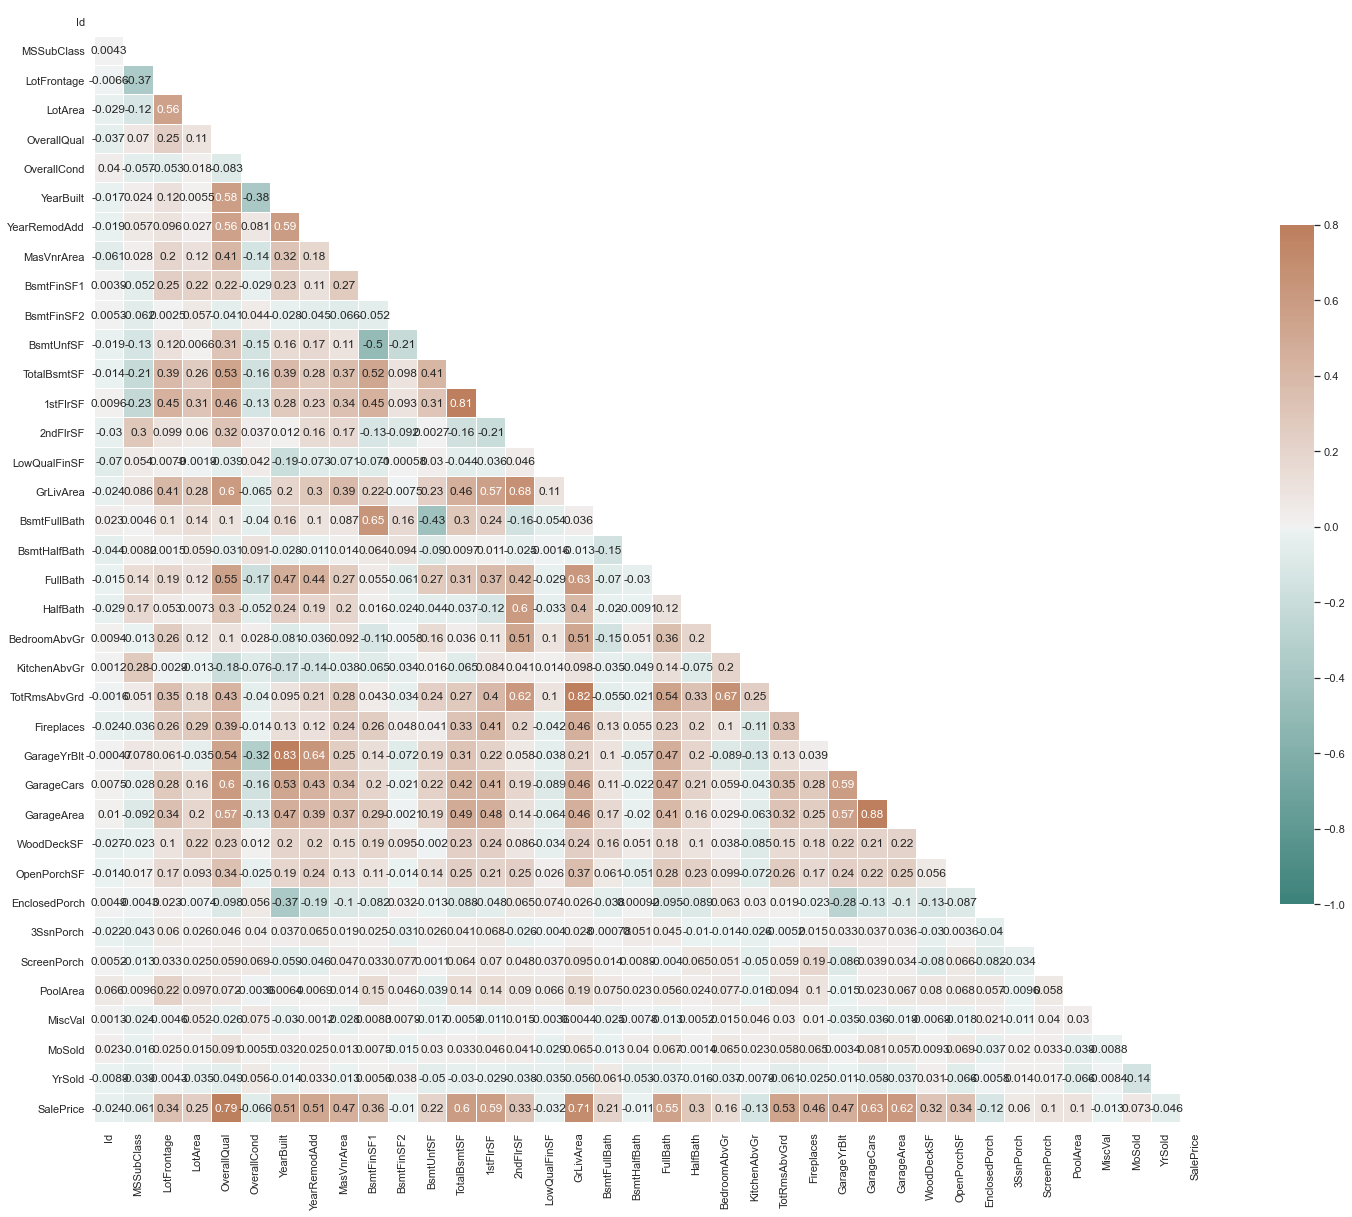

In [47]:
#correlation heatmap
corr = train.corr()

mask = np.zeros_like(corr) #mask to hide upper triangle
mask[np.triu_indices_from(mask)]=True

cmap = sns.diverging_palette(180, 30, as_cmap=True)

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(25, 25))
    sns.heatmap(corr,  mask=mask, cmap=cmap, annot=True, center=0, vmin=-1, vmax=0.8,
                square=True, cbar_kws={'shrink':.5, 'orientation': 'vertical'}, linewidth=.02);


>OBSERVATION:
>> 1. From the correlation table and heatmap we can see that Overall quality is 79% correlated with SalePrice. This makes complete sense as Overall Quality refers to the quality of the House in Overall including all the aspects. People usually prefer a house with good Overall Quality.
>> 2. GrLivArea is 70% correlated with the SalePrice. GrLivArea refers to the living area in sqft. above ground. The size of living area matters when one goes out to buy a house.
>> 3. Apart from these two features people also consider GarageArea in the house, size of the basement in the house.

<AxesSubplot:>

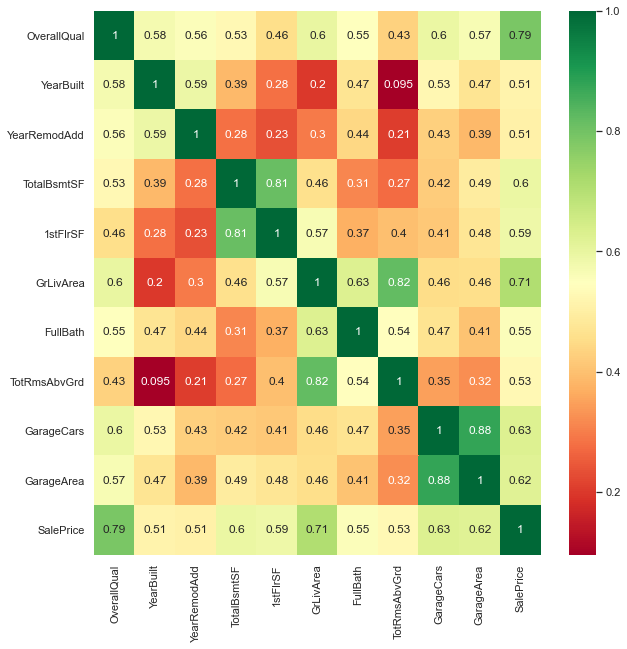

In [48]:
#Lets only visualize the feature that have high correlation with Target.
corr = train.corr()
highest_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(train[highest_corr_features].corr(),annot=True,cmap="RdYlGn")

> OBSERVATION
>> We can clearly see the correlation of OverallQual, GrLivArea, GarageCars with the SalePrice.
>> Also some of the features have a high correlation with each other- GarageCars and GarageArea are similar, TotalBsmtSf and 1stFlrSF are similar, GrLivArea and TolRmsAbvGrd are similar. We can drop one the two features mentioned.

In [49]:
#lets visualize highly correlated features with the target.
#OverallQual
print('Unique entries in OverallQual are: {}'.format(train['OverallQual'].unique()))

Unique entries in OverallQual are: [ 6  8  7  5  9  1  2  4  3 10]


OverallQual- overall quality is measured on the scale of 1-10. We can say that it is an ordinal feature. Let's plot median of Sale price with OverallQual. USing median as our data is skewed and median is robust to outliers. 

<AxesSubplot:xlabel='OverallQual'>

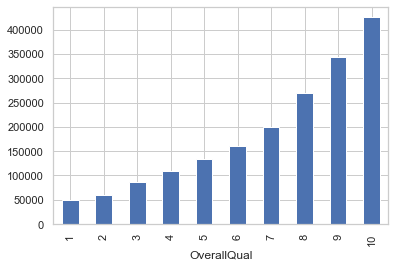

In [50]:
train.groupby('OverallQual')['SalePrice'].median().plot(kind='bar')

>OBSERVATION:
>> We were expecting the graph to behave in similar manner as the Overall Quality of the house increases, the Sale price of the house too increase.

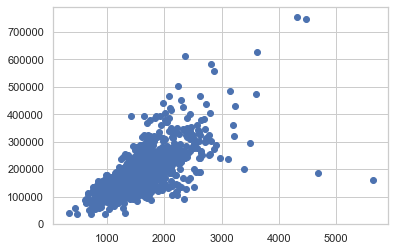

In [51]:
#Visualizing second correlated feature- GrLivArea
plt.scatter(train['GrLivArea'],train['SalePrice'])

>OBSERVATION:
>> Here also we can see a direct positive correlation between the living area and Sale price. 
>> Also we can see a few outliers in the GrLivArea around 5000 where Sale price is low evenn with a larger living area.

In [52]:
#Garage Cars v/s SalePrice
train['GarageCars'].value_counts()

2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64

<AxesSubplot:xlabel='GarageCars'>

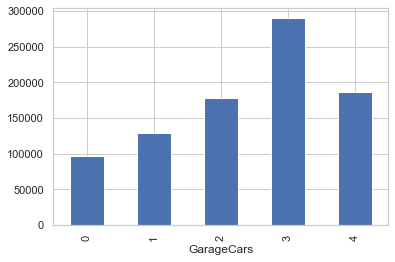

In [53]:
#plotting Garage cars with SalePrice
train.groupby('GarageCars')['SalePrice'].median().plot.bar()

>OBSERVATION:
>>  As GarageCars is the size of the garage in car capacity. Generally a family holds 1,2 or at the most three cars. So possibly a family doesnot want a garage size bigger than their requirement for that reason there might be a decline in the price for 4 as Garage Car capacity.

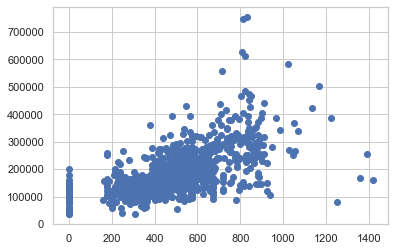

In [54]:
#Garage Area v/s Sale Price
plt.scatter(train['GarageArea'],train['SalePrice'])

>OBSERVATION:
>> A direct positive correlation can be seen between Sale Price and the GarageArea as depicted by the heatmap.

> CHECKING FOR SKEWNESS

In [55]:
#lets create a dataframe for the numeric columns with high skewness

skew=pd.DataFrame()

#Numerical Columns
num_cols=[i for i in train.columns if train[i].dtypes!='object']

#Separate columns for negative and positive skewness
skew[['Positive Columns','Skewness(+v)']] = train[num_cols].drop('Id',axis=1).skew().sort_values(ascending=False)[:10].reset_index()
skew[['Negative Columns','Skewness(-v)']] = train[num_cols].drop('Id',axis=1).skew().sort_values(ascending=True)[:10].reset_index()

skew.columns = pd.MultiIndex.from_tuples([('Positive Skewness', 'Columns'), ('Positive Skewness', 'Skewness'),
                                              ('Negative Skewness', 'Columns'), ('Negative Skewness', 'Skewness')])
#reading the skew dataframe
skew

Positive Skewness            Negative Skewness          
            Columns   Skewness           Columns  Skewness
0           MiscVal  23.065943       GarageYrBlt -0.644564
1          PoolArea  13.243711         YearBuilt -0.579204
2           LotArea  10.659285      YearRemodAdd -0.495864
3         3SsnPorch   9.770611        GarageCars -0.358556
4      LowQualFinSF   8.666142          FullBath  0.057809
5        BsmtFinSF2   4.365829            YrSold  0.115765
6      KitchenAbvGr   4.365259       OverallQual  0.175082
7      BsmtHalfBath   4.264403        GarageArea  0.189665
8       ScreenPorch   4.105741            MoSold  0.220979
9     EnclosedPorch   3.043610      BedroomAbvGr  0.243855

> OBSERVATION:
>> We got high skewness in the features:
>> 1. MiscVal 23.065
>> 2. PoolArea 13.243
>> 3. Lot Area 10.659
>> 4. 3SsnPorch 9.770
>> 5. LowQualFinSF 8.666

>FEATURE ENGINEERING
>> 1. Handling missing values of categorical and numerical data separately.
>> 2. Removing skewness.
>> 3. Dealing with outliers.
>> 4. Imputing the categorical features.

In [56]:
#Handling missing values total we have 18 columns with Null-values
#We will handle the missing values for the categorical data first
#Lets look at the percentage of null values each categorical feature has.
cat_null_df

Null Values
PoolQC          99.400685
MiscFeature     96.232877
Alley           93.407534
Fence           79.708904
FireplaceQu     47.174658
GarageCond       5.479452
GarageQual       5.479452
GarageFinish     5.479452
GarageType       5.479452
BsmtFinType2     2.654110
BsmtExposure     2.654110
BsmtFinType1     2.568493
BsmtCond         2.568493
BsmtQual         2.568493
MasVnrType       0.599315

In [57]:
#Replacing missing values with a new variable 'missing' for the categorical variables.
def rep_nan_cat(train,cat_null):
    data=train.copy()
    data[cat_null]=data[cat_null].fillna('Missing')
    return data

train=rep_nan_cat(train,cat_null)
train[cat_null].isnull().sum()   

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [58]:
train.head()
#We can see that in the categorical features the NaN has been replaced with Missing as visible in feature Alley, PoolQC, Fence, MiscFeature.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0  127         120       RL          NaN     4928   Pave  Missing      IR1   
1  889          20       RL         95.0    15865   Pave  Missing      IR1   
2  793          60       RL         92.0     9920   Pave  Missing      IR1   
3  110          20       RL        105.0    11751   Pave  Missing      IR1   
4  422          20       RL          NaN    16635   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1 

In [59]:
#Moving ahead and deal the missing values of the numerical features
#Having a look at the percentage of missing values for the numerical variables
num_nan=[i for i in train.columns if train[i].isnull().sum()!=0 and train[i].dtypes!='object']
for i in num_nan:
    print('The feature {} has {}% missing values.'.format(i,np.round(train[i].isnull().mean(),4)))

The feature LotFrontage has 0.1832% missing values.
The feature MasVnrArea has 0.006% missing values.
The feature GarageYrBlt has 0.0548% missing values.


In [60]:
#Replacing null-values of the numerical data with median as our data has outliers.
for i in num_nan:
    median_val=train[i].median()
    
    #Replacing null-value in the actual feature
    train[i].fillna(median_val,inplace=True)
    
#checking if we have successfully removed missing values
train[num_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [61]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0     127         120       RL         70.0     4928   Pave  Missing      IR1   
1     889          20       RL         95.0    15865   Pave  Missing      IR1   
2     793          60       RL         92.0     9920   Pave  Missing      IR1   
3     110          20       RL        105.0    11751   Pave  Missing      IR1   
4     422          20       RL         70.0    16635   Pave  Missing      IR1   
...   ...         ...      ...          ...      ...    ...      ...      ...   
1163  289          20       RL         70.0     9819   Pave  Missing      IR1   
1164  554          20       RL         67.0     8777   Pave  Missing      Reg   
1165  196         160       RL         24.0     2280   Pave  Missing      Reg   
1166   31          70  C (all)         50.0     8500   Pave     Pave      Reg   
1167  617          60       RL         70.0     7861   Pave  Missing      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CB

> HANDLING TEMPORAL VARIABLES / DATE-TIME VARIABLES

In [62]:
#Instead of keeping the entries of the date-time feature in year, we will convert them into 'how many years until the house was sold'
for i in year_col:  #year_col is previously created, list of the date-time features
    if i!='YrSold':
        train[i]=train['YrSold']-train[i]

In [63]:
train[year_col].head(10)

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0         31            31         30.0    2007
1         37            37         37.0    2007
2         11            10         10.0    2007
3         33            33         33.0    2010
4         32             9         32.0    2009
5          0             0          0.0    2006
6         53            14         53.0    2010
7         49             6         49.0    2006
8         42            42         42.0    2007
9         61            58         61.0    2008

>OBSERVATION:
>>So we can see that we have successfully altered the date-time variables.  

>HANDLING SKEWNESS OF NUMERICAL VARIABLES

In [64]:
#We will handle the skewness of the numerical variable with the log normal value of the entries.
#In this we will only consider those variables which do not have '0' as an entry.
# And as we noticed earlier such numerical features are: LotFrontage, LotArea, 1stFloorSF, GrLivArea and SalePrice.
col_no_0=[i for i in numerical_col if 0 not in train[i].unique()]
for i in col_no_0:
    train[i]=np.log(train[i])

In [65]:
# we will use yeo-johnson method to remove the skewness of the remaining numerical features.
rem_num_col=[i for i in numerical_col if i not in col_no_0]
len(rem_num_col)

26

In [66]:
skew=pd.DataFrame()

#Separate columns for negative and positive skewness
skew[['Positive Columns','Skewness(+v)']] = train[rem_num_col].skew().sort_values(ascending=False)[:10].reset_index()
skew[['Negative Columns','Skewness(-v)']] = train[rem_num_col].skew().sort_values(ascending=True)[:10].reset_index()

skew.columns = pd.MultiIndex.from_tuples([('Positive Skewness', 'Columns'), ('Positive Skewness', 'Skewness'),
                                              ('Negative Skewness', 'Columns'), ('Negative Skewness', 'Skewness')])
skew

Positive Skewness            Negative Skewness          
            Columns   Skewness           Columns  Skewness
0           MiscVal  23.065943        GarageCars -0.358556
1          PoolArea  13.243711          FullBath  0.057809
2         3SsnPorch   9.770611        GarageArea  0.189665
3      LowQualFinSF   8.666142      BedroomAbvGr  0.243855
4        BsmtFinSF2   4.365829      YearRemodAdd  0.495051
5      KitchenAbvGr   4.365259         YearBuilt  0.573127
6      BsmtHalfBath   4.264403      BsmtFullBath  0.627106
7       ScreenPorch   4.105741          HalfBath  0.656492
8     EnclosedPorch   3.043610       GarageYrBlt  0.664832
9        MasVnrArea   2.835718        Fireplaces  0.671966

In [67]:
skewness=train[rem_num_col].skew()
high_skew=skewness[abs(skewness)>0.5]
high_skew

YearBuilt         0.573127
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
2ndFlrSF          0.823479
LowQualFinSF      8.666142
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
HalfBath          0.656492
KitchenAbvGr      4.365259
Fireplaces        0.671966
GarageYrBlt       0.664832
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
dtype: float64

In [68]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
for i in high_skew.index:
    train[i]=pt.fit_transform(train[i].values.reshape(-1,1))

In [69]:
train[high_skew.index].skew()

YearBuilt        -0.239945
MasVnrArea        0.439526
BsmtFinSF1       -0.404528
BsmtFinSF2        2.394737
BsmtUnfSF        -0.284390
TotalBsmtSF       0.286779
2ndFlrSF          0.280208
LowQualFinSF      6.922843
BsmtFullBath      0.365488
BsmtHalfBath      3.954345
HalfBath          0.498003
KitchenAbvGr     -2.370593
Fireplaces        0.084950
GarageYrBlt      -0.207307
WoodDeckSF        0.113026
OpenPorchSF      -0.002749
EnclosedPorch     2.022616
3SsnPorch         7.087955
ScreenPorch       3.067153
PoolArea         12.817372
MiscVal           4.991071
dtype: float64

In [70]:
train

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley  \
0     4.844187    4.787492       RL     4.248495  8.502689   Pave  Missing   
1     6.790097    2.995732       RL     4.553877  9.671871   Pave  Missing   
2     6.675823    4.094345       RL     4.521789  9.202308   Pave  Missing   
3     4.700480    2.995732       RL     4.653960  9.371694   Pave  Missing   
4     6.045005    2.995732       RL     4.248495  9.719264   Pave  Missing   
...        ...         ...      ...          ...       ...    ...      ...   
1163  5.666427    2.995732       RL     4.248495  9.192075   Pave  Missing   
1164  6.317165    2.995732       RL     4.204693  9.079890   Pave  Missing   
1165  5.278115    5.075174       RL     3.178054  7.731931   Pave  Missing   
1166  3.433987    4.248495  C (all)     3.912023  9.047821   Pave     Pave   
1167  6.424869    4.094345       RL     4.248495  8.969669   Pave  Missing   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         IR1         Lvl    AllPub    Inside       Gtl      NPkVill   
1         IR1         Lvl    AllPub    Inside       Mod        NAmes   
2         IR1         Lvl    AllPub   CulDSac       Gtl      NoRidge   
3         IR1         Lvl    AllPub    Inside       Gtl       NWAmes   
4         IR1         Lvl    AllPub       FR2       Gtl       NWAmes   
...       ...         ...       ...       ...       ...          ...   
1163      IR1         Lvl    AllPub    Inside       Gtl       Sawyer   
1164      Reg         Lvl    AllPub    Inside       Gtl      Edwards   
1165      Reg         Lvl    AllPub       FR2       Gtl      NPkVill   
1166      Reg         Lvl    AllPub    Inside       Gtl       IDOTRR   
1167      IR1         Lvl    AllPub    Inside       Gtl      Gilbert   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm   TwnhsE     1Story     1.791759     1.609438   
1          Norm       Norm     1Fam     1Story     2.079442     1.791759   
2          Norm       Norm     1Fam     2Story     1.945910     1.609438   
3          Norm       Norm     1Fam     1Story     1.791759     1.791759   
4          Norm       Norm     1Fam     1Story     1.791759     1.945910   
...         ...        ...      ...        ...          ...          ...   
1163       Norm       Norm     1Fam     1Story     1.609438     1.609438   
1164      Feedr       Norm     1Fam     1Story     1.386294     1.609438   
1165       Norm       Norm    Twnhs     2Story     1.791759     1.791759   
1166      Feedr       Norm     1Fam     2Story     1.386294     1.386294   
1167       Norm       Norm     1Fam     2Story     1.791759     1.609438   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0      0.101481            31     Gable  CompShg     Plywood     Plywood   
1      0.279571            37      Flat  Tar&Grv     Wd Sdng     Wd Sdng   
2     -0.705329            10     Gable  CompShg     MetalSd     MetalSd   
3      0.162872            33       Hip  CompShg     Plywood     Plywood   
4      0.132450             9     Gable  CompShg     CemntBd     CmentBd   
...         ...           ...       ...      ...         ...         ...   
1163   0.441794            43     Gable  CompShg     MetalSd     MetalSd   
1164   0.840563             6     Gable  CompShg     VinylSd     VinylSd   
1165   0.162872            33     Gable  CompShg     Plywood     Brk Cmn   
1166   1.373868            58   Gambrel  CompShg     BrkFace     BrkFace   
1167  -1.195859             3     Gable  CompShg     VinylSd     VinylSd   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          None   -0.812901        TA        TA     CBlock       Gd       TA   
1          None   -0.812901        Gd        Gd      PConc       TA       Gd   
2          None   -0.812901        Gd        TA      PConc       Gd       TA   
3       BrkFace    1.390202        TA        TA     CBlock      

> HANDLING RARE CATEGORICAL FEATURES
>> A rare categorical feature is a feature that has atleast one variable which holds only 1% of the entries.

In [71]:
#categorical variables 
print(cat_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [72]:
#Replacing the index that holds less than 0.01% weightage in the dataset w.r.t the Sale price with a new index.
for i in cat_col:
    temp=train.groupby(i)['SalePrice'].count()/len(train)
    temp_df=temp[temp>0.01].index
    train[i]=np.where(train[i].isin(temp_df),train[i],'RareVar')

In [73]:
for i in cat_col:
    print(train.groupby(i)['SalePrice'].count(),'\n')

MSZoning
FV          52
RH          16
RL         928
RM         163
RareVar      9
Name: SalePrice, dtype: int64 

Street
Pave       1164
RareVar       4
Name: SalePrice, dtype: int64 

Alley
Grvl         41
Missing    1091
Pave         36
Name: SalePrice, dtype: int64 

LotShape
IR1        390
IR2         32
RareVar      6
Reg        740
Name: SalePrice, dtype: int64 

LandContour
Bnk      50
HLS      42
Low      30
Lvl    1046
Name: SalePrice, dtype: int64 

Utilities
AllPub    1168
Name: SalePrice, dtype: int64 

LotConfig
Corner     222
CulDSac     69
FR2         33
Inside     842
RareVar      2
Name: SalePrice, dtype: int64 

LandSlope
Gtl    1105
Mod      51
Sev      12
Name: SalePrice, dtype: int64 

Neighborhood
Blmngtn     15
BrkSide     50
ClearCr     24
CollgCr    118
Crawfor     45
Edwards     83
Gilbert     64
IDOTRR      30
Mitchel     34
NAmes      182
NWAmes      59
NoRidge     35
NridgHt     61
OldTown     86
RareVar     39
SWISU       21
Sawyer      60
SawyerW     51

>OBSERVATION:
>> We can observe that feature utilities only have one unique entry i.e.  AllPub this features will not help machine learn. We will drop this feature.

>REMOVING OUTLIERS

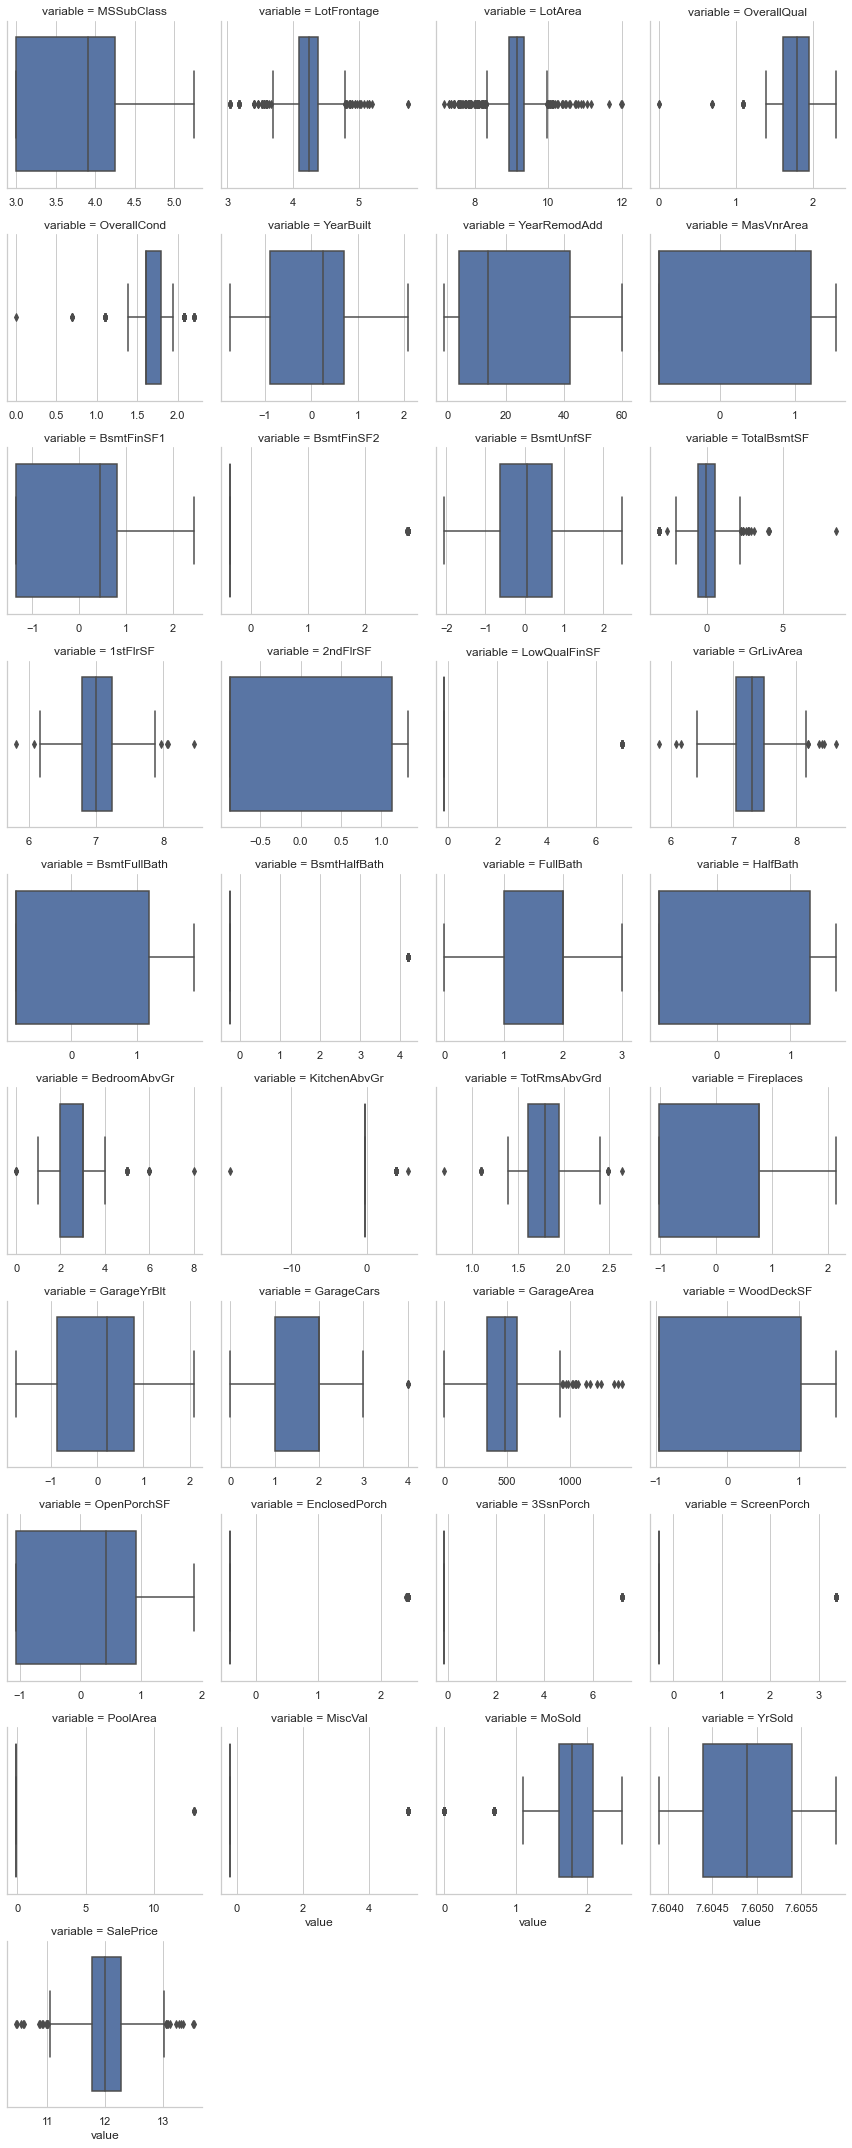

In [74]:
num_col=[i for i in train.columns if train[i].dtypes!='O']
num_col.remove('Id')
nd = pd.melt(train, value_vars = num_col)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.boxplot, 'value')
n1

> OBSERVATION:
>> We can see most of the features has outliers. We will try to work upon removing the outliers now.

In [75]:
data=train.copy()
def iqr_cap(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df[col]=np.where(df[col]<lower,lower,np.where(df[col]>upper,upper,df[col]))

In [76]:
iqr_cap(data,num_col)

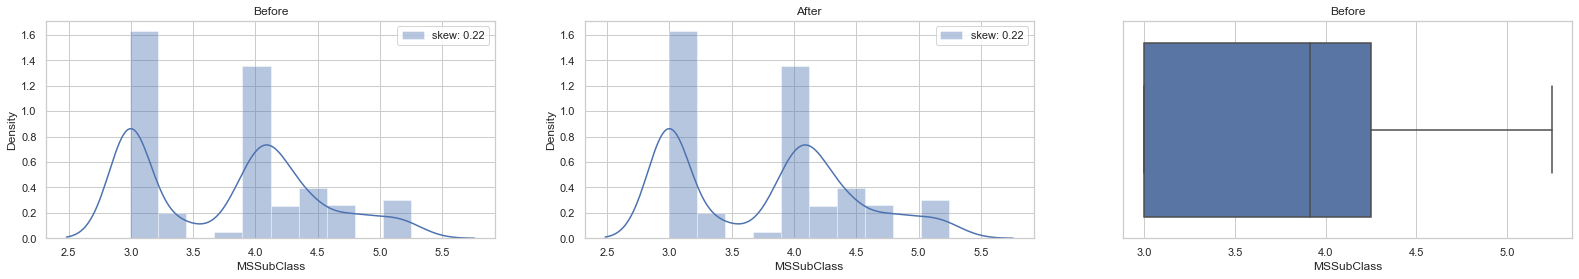

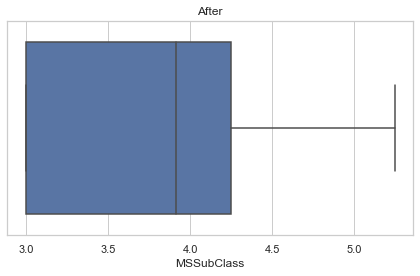

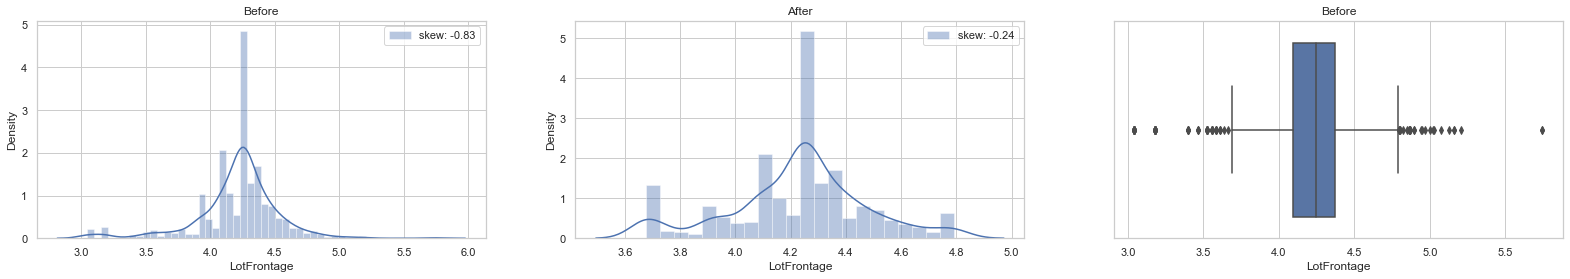

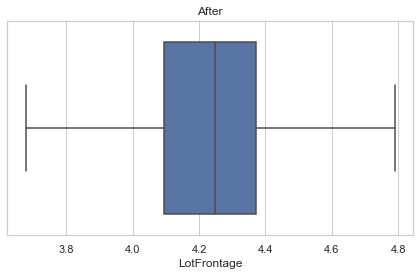

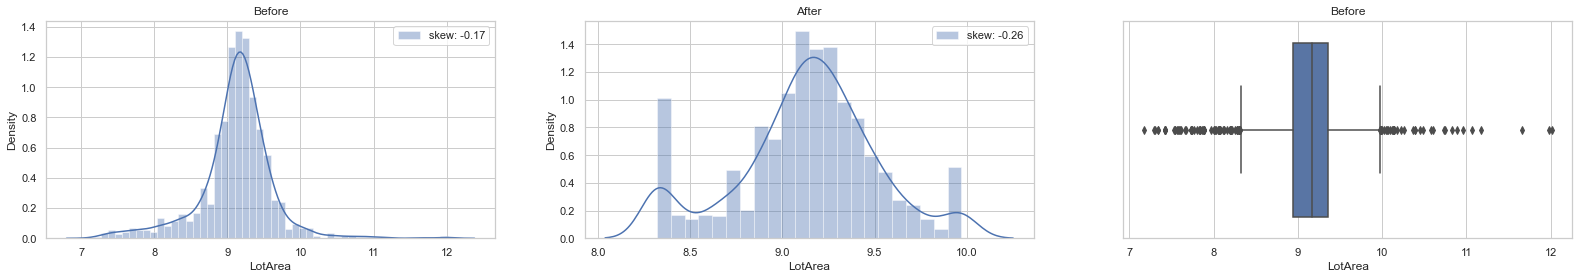

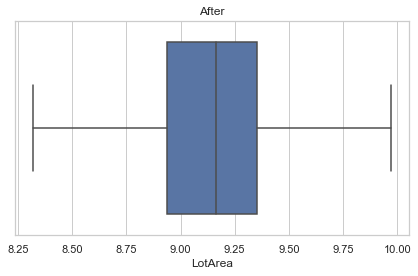

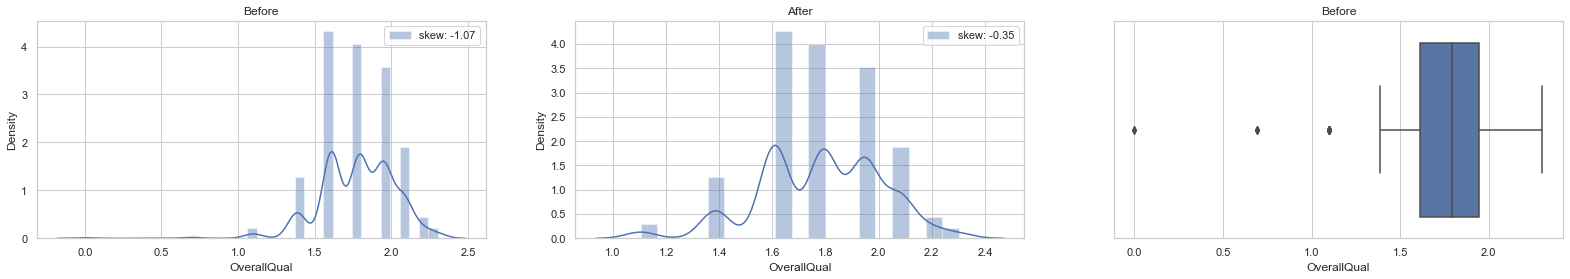

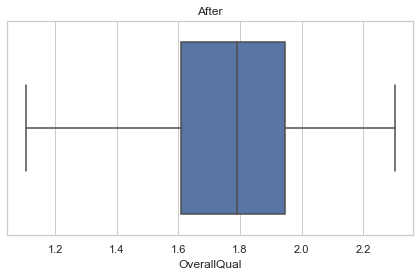

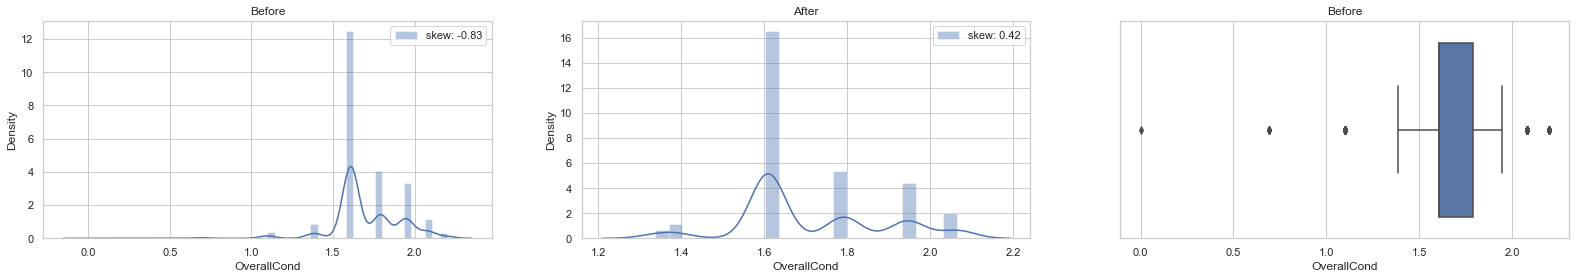

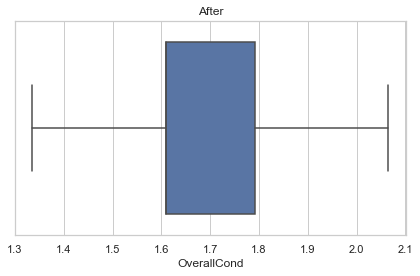

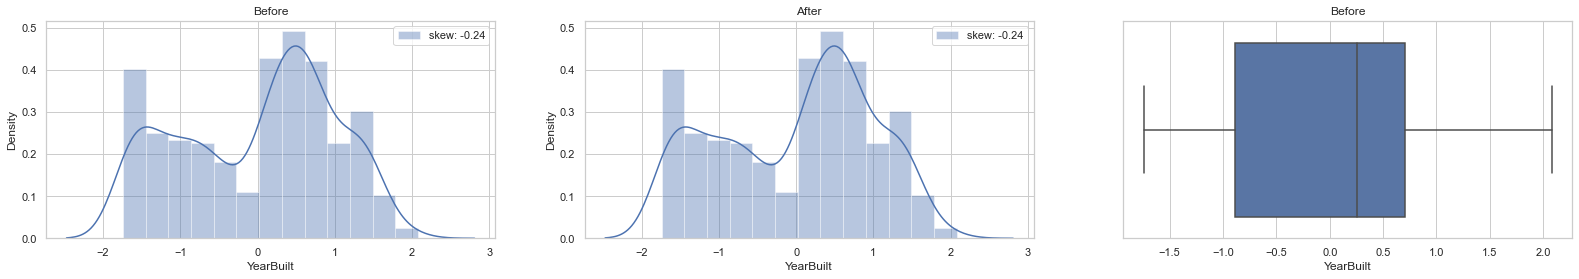

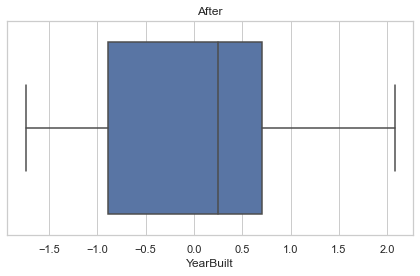

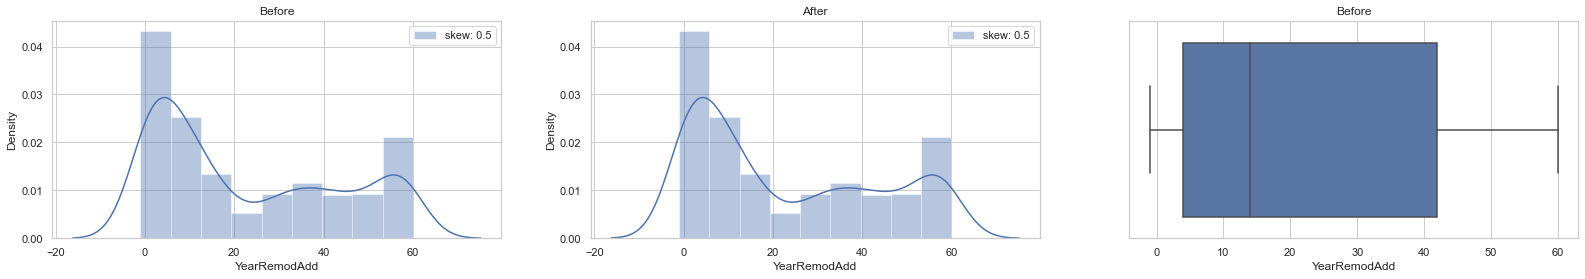

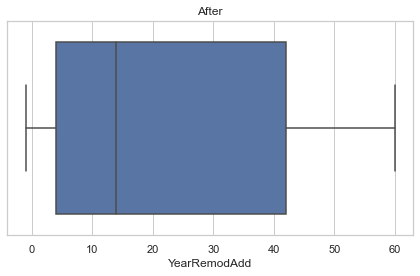

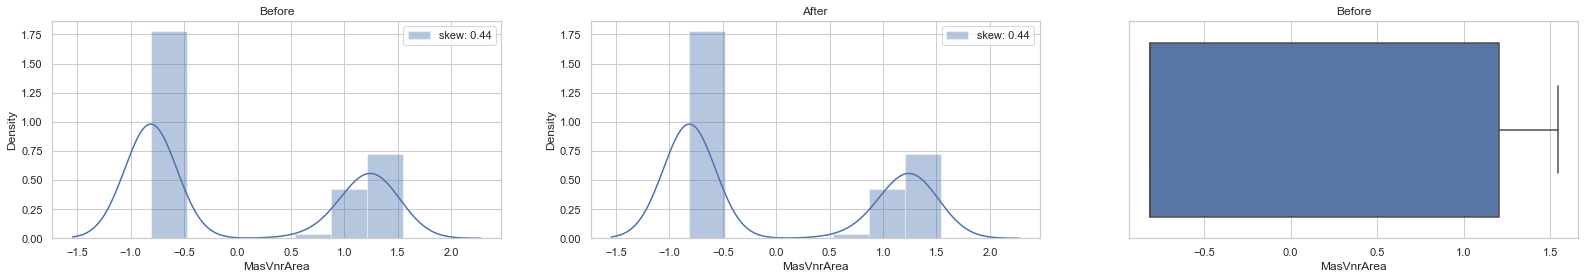

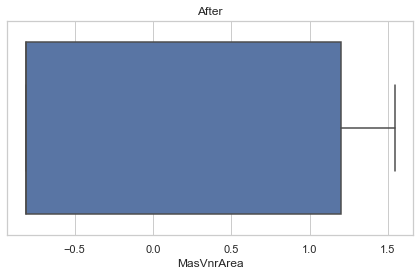

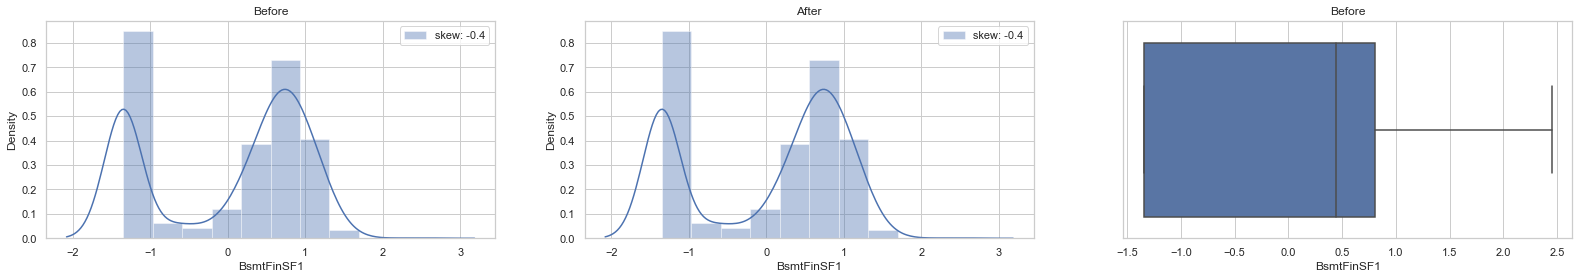

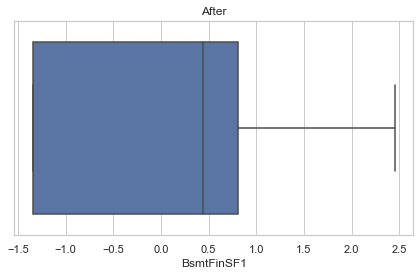

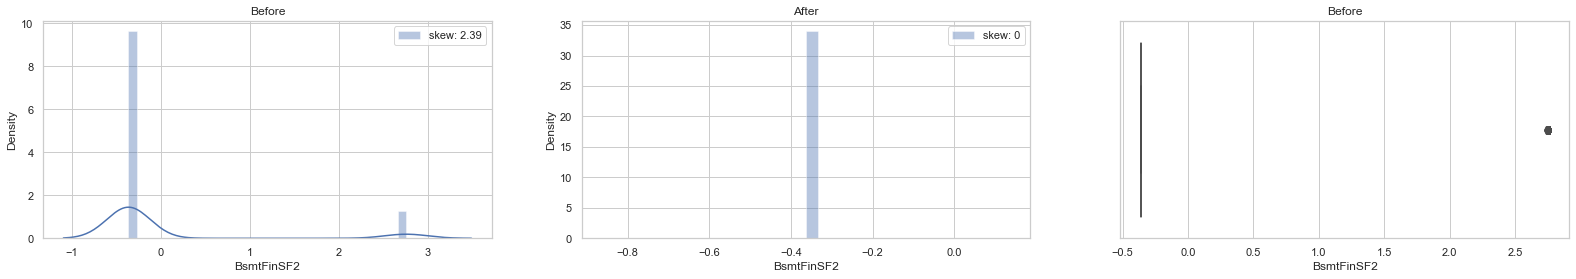

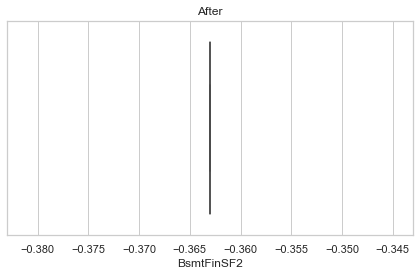

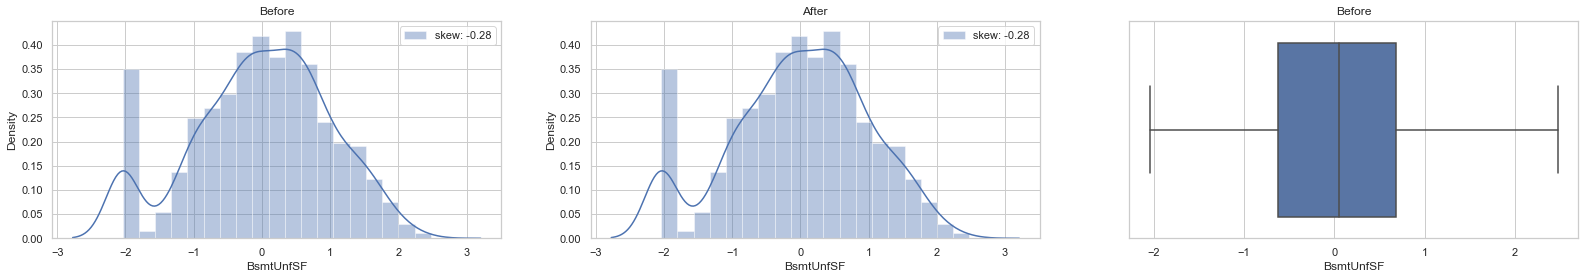

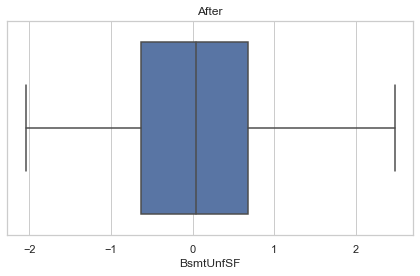

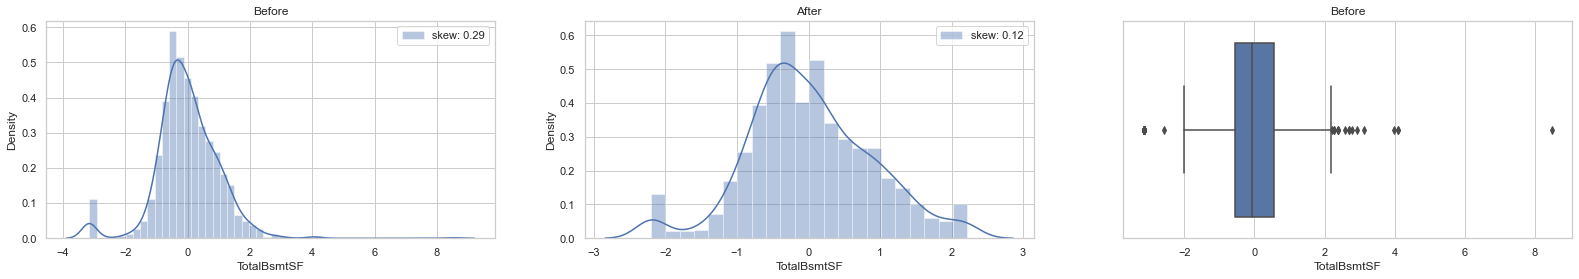

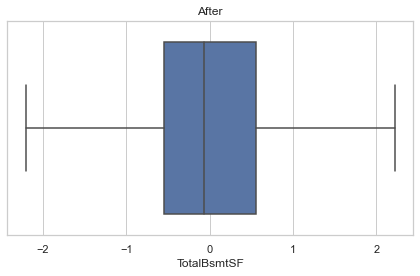

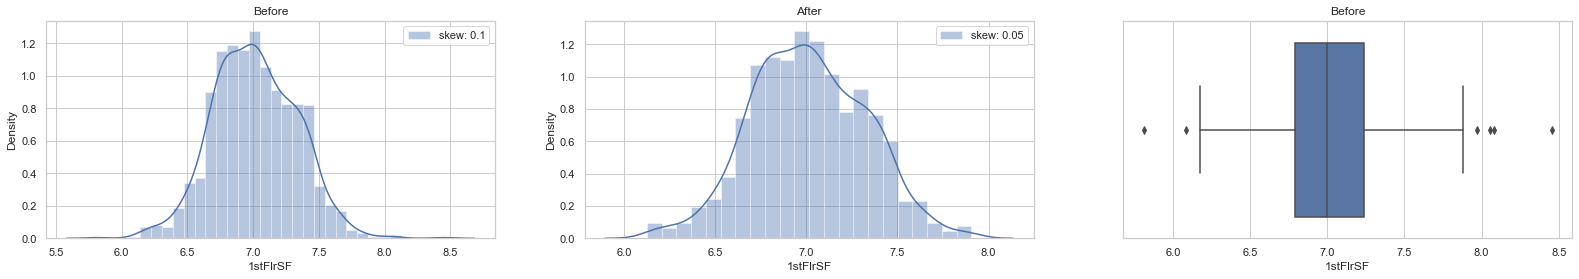

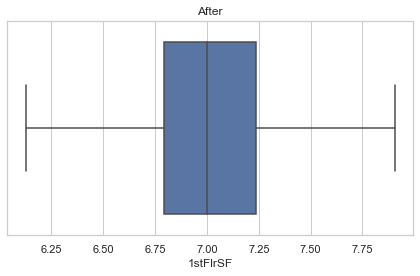

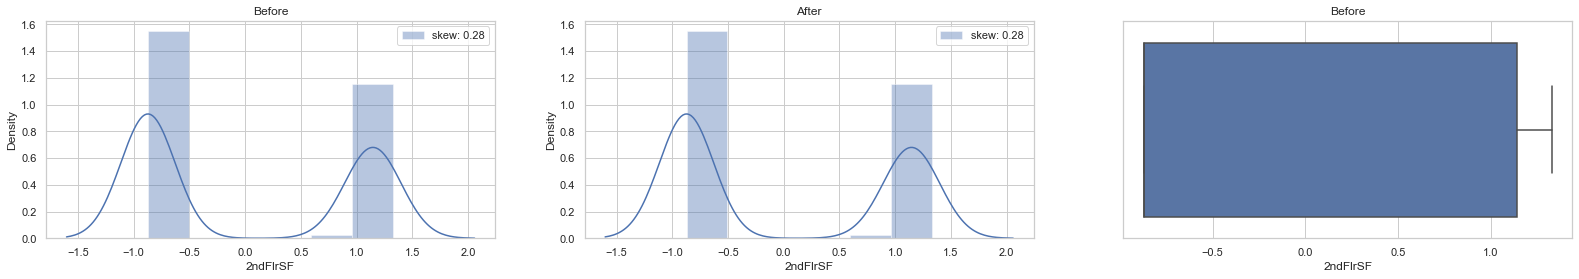

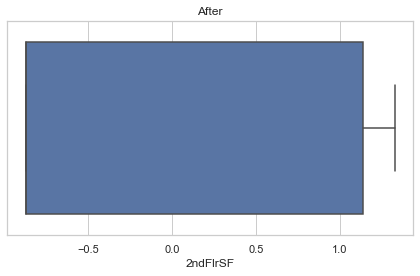

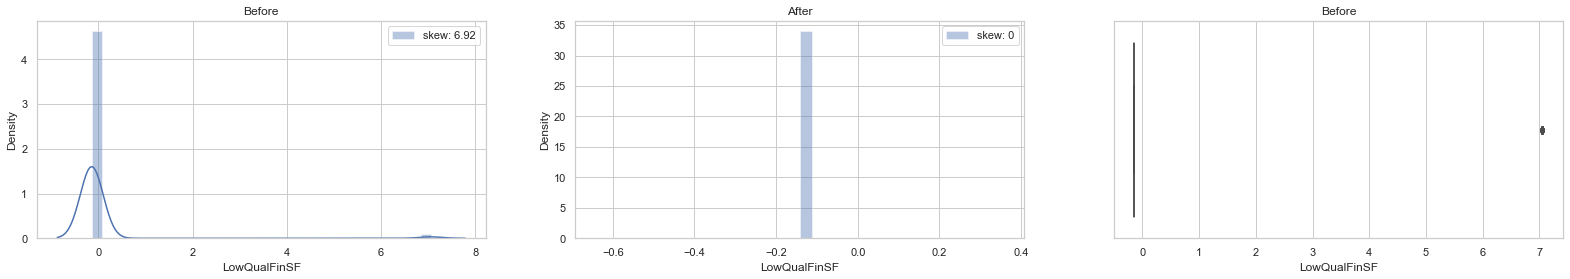

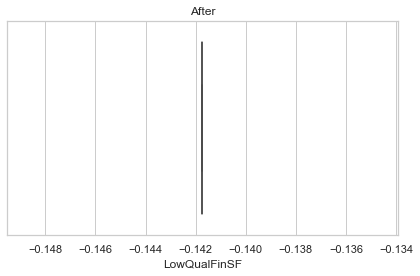

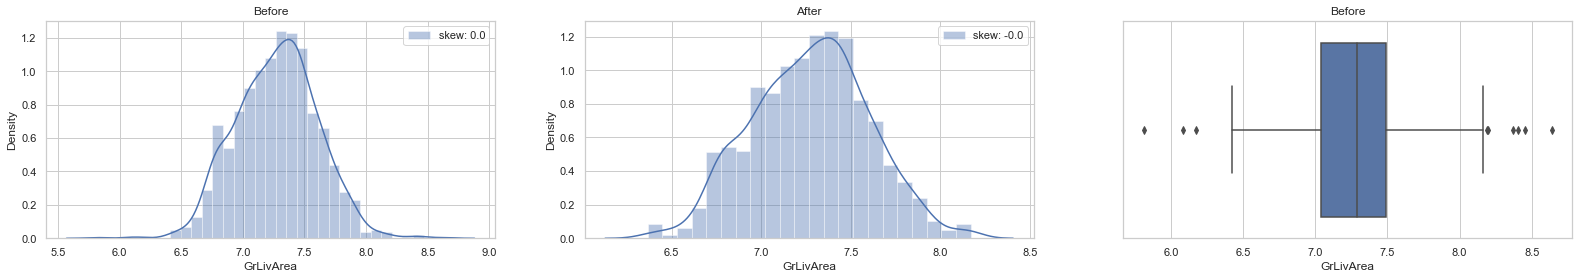

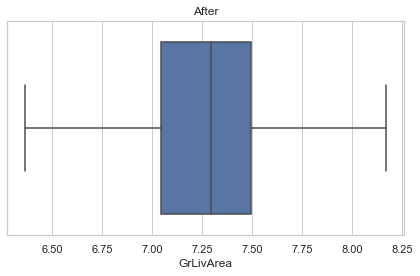

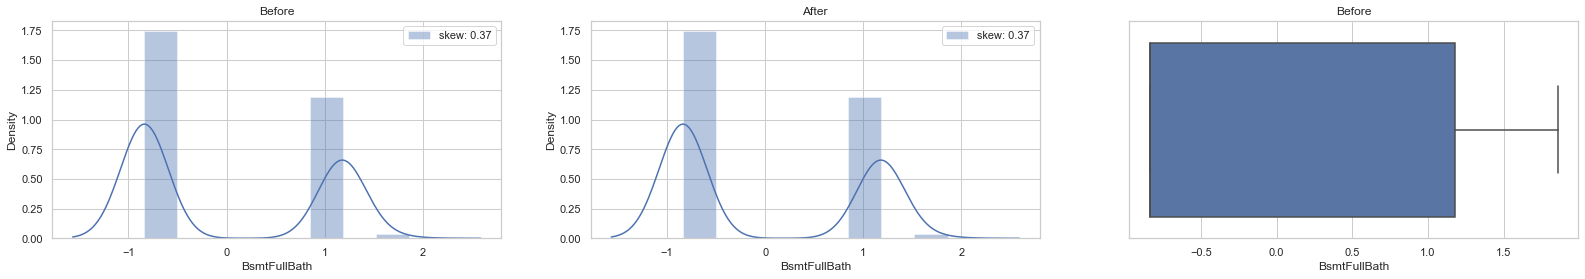

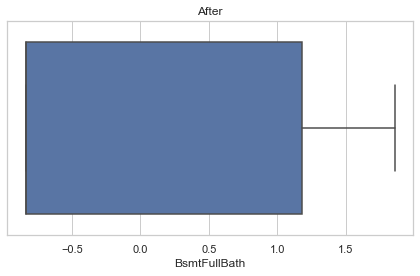

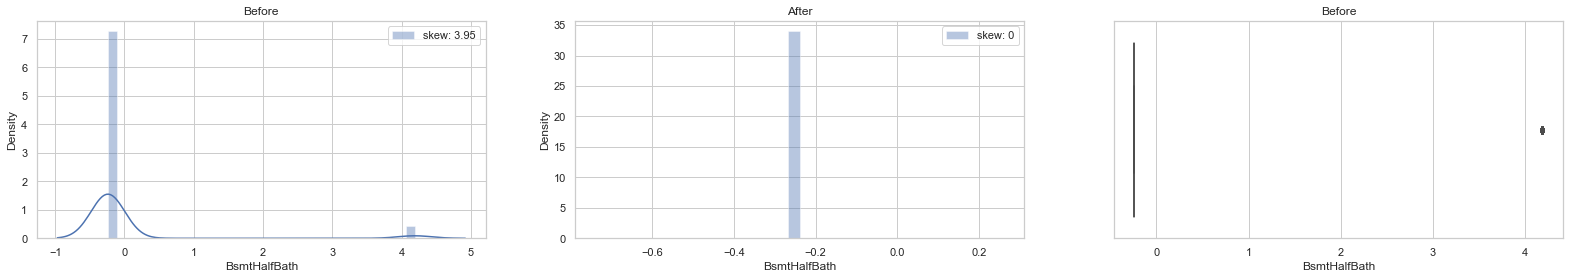

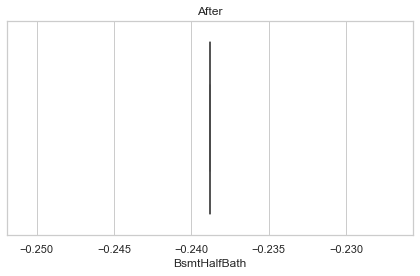

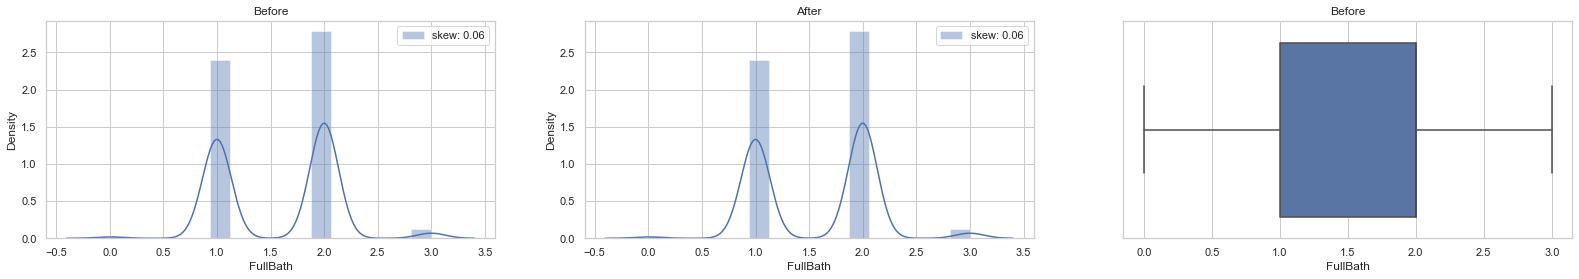

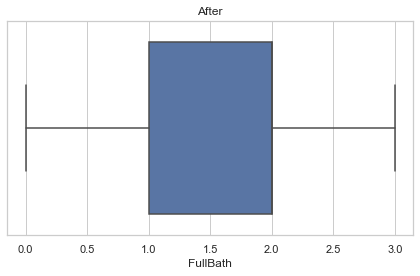

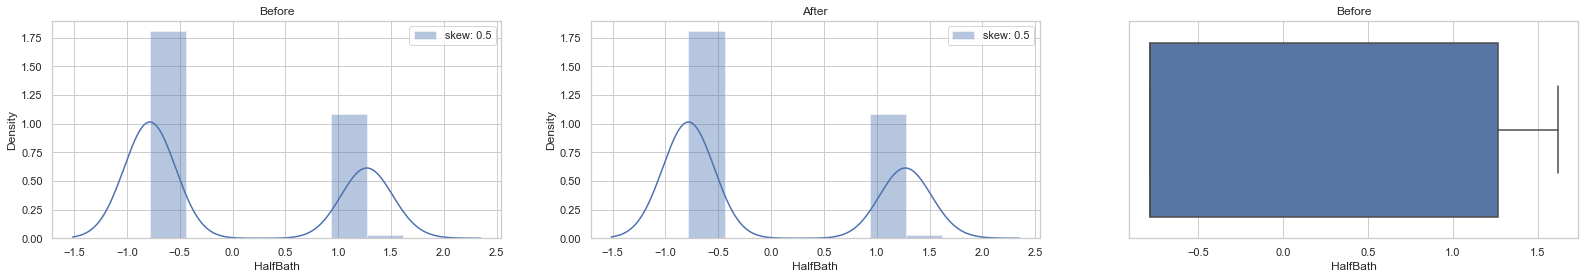

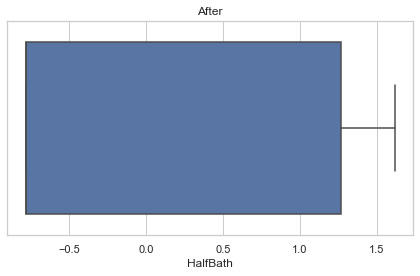

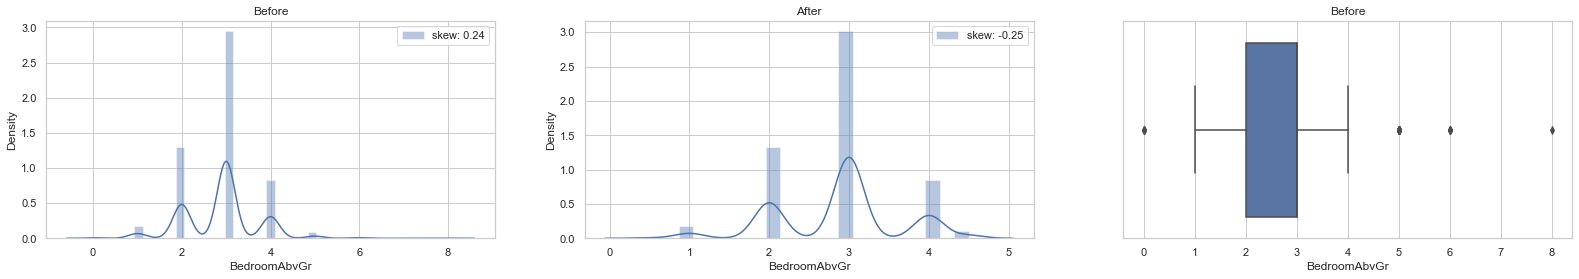

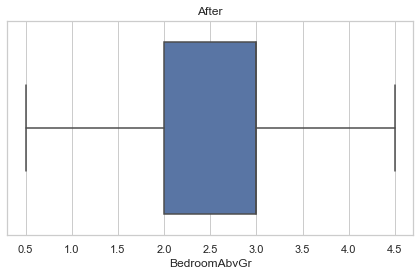

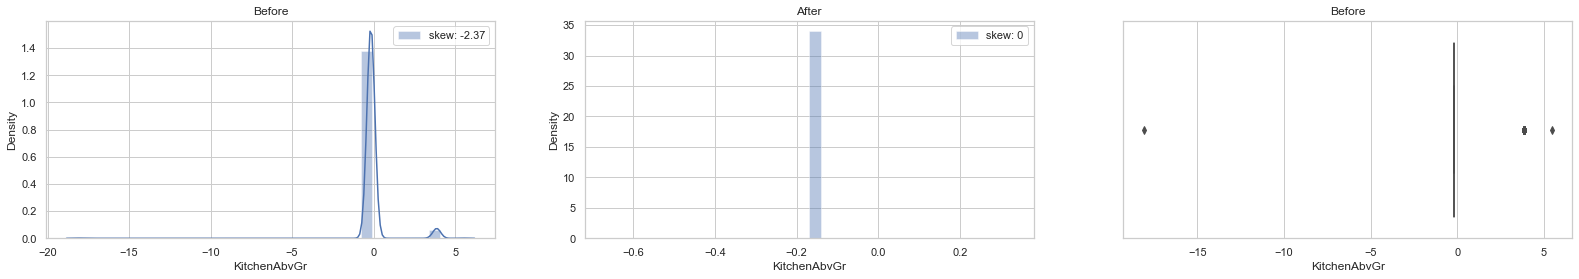

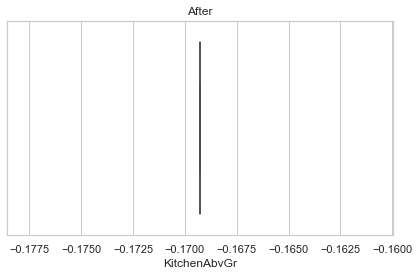

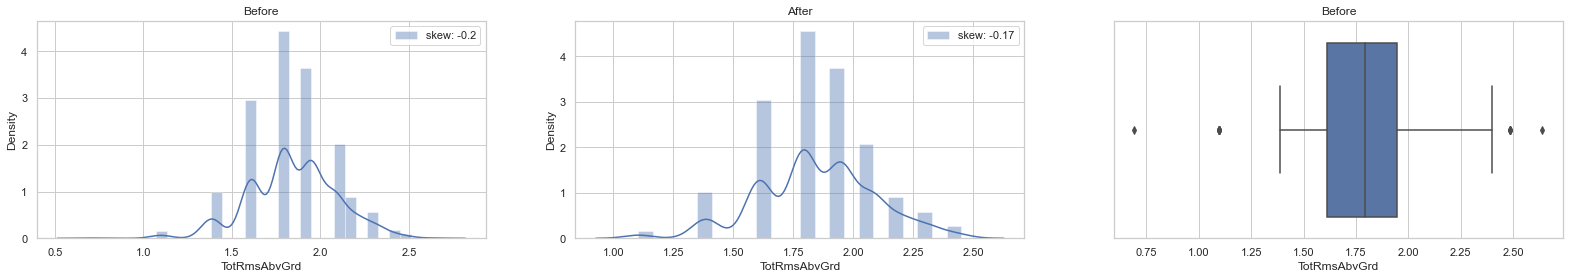

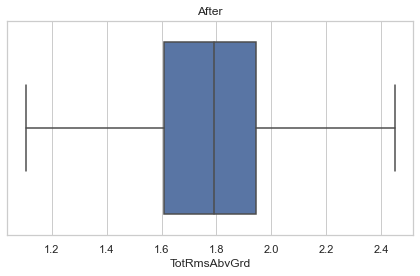

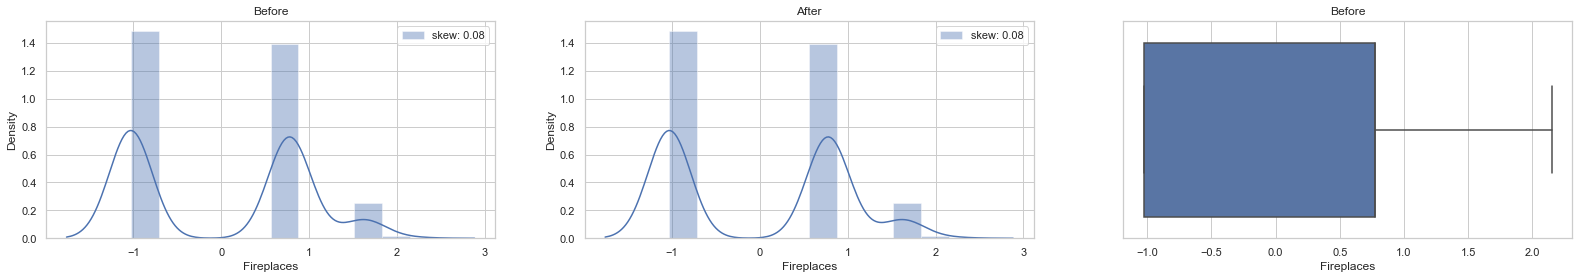

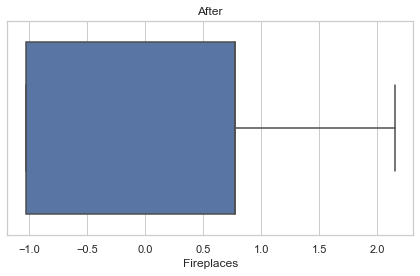

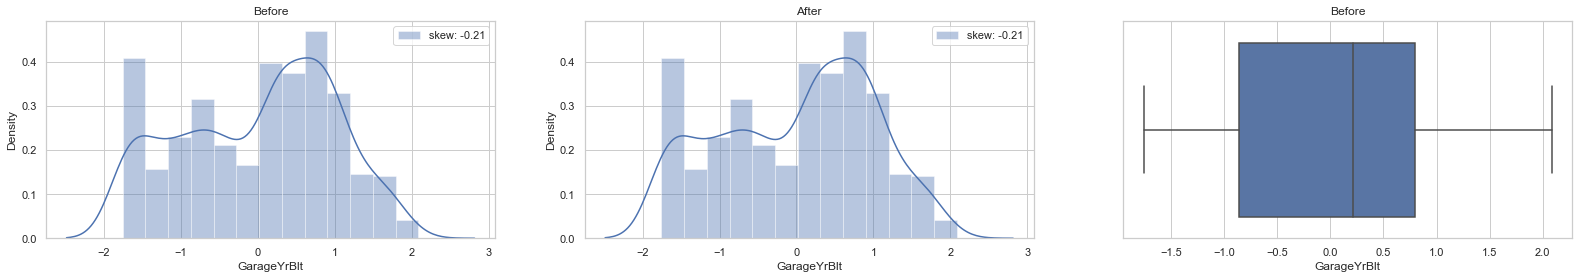

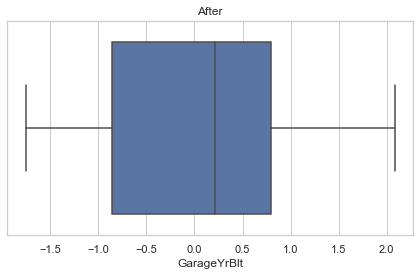

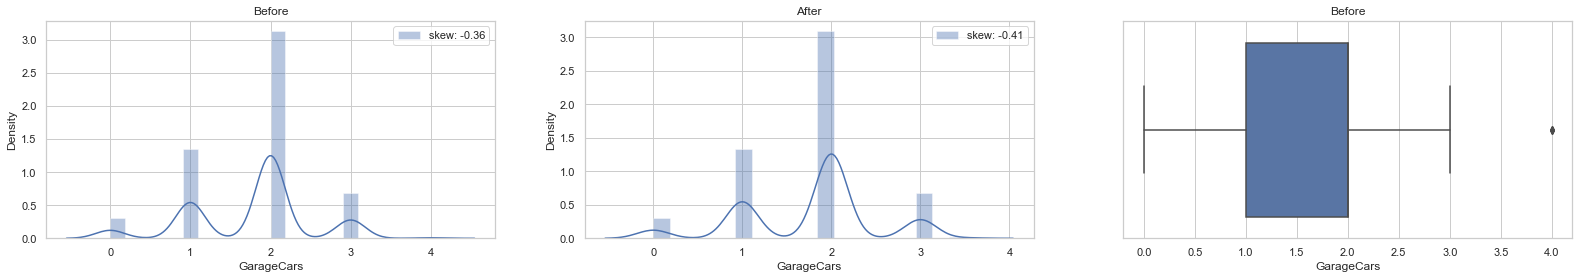

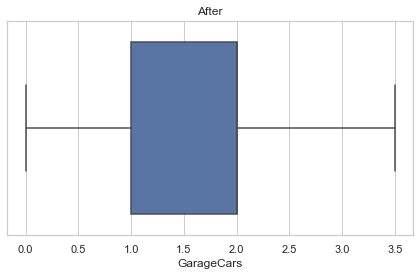

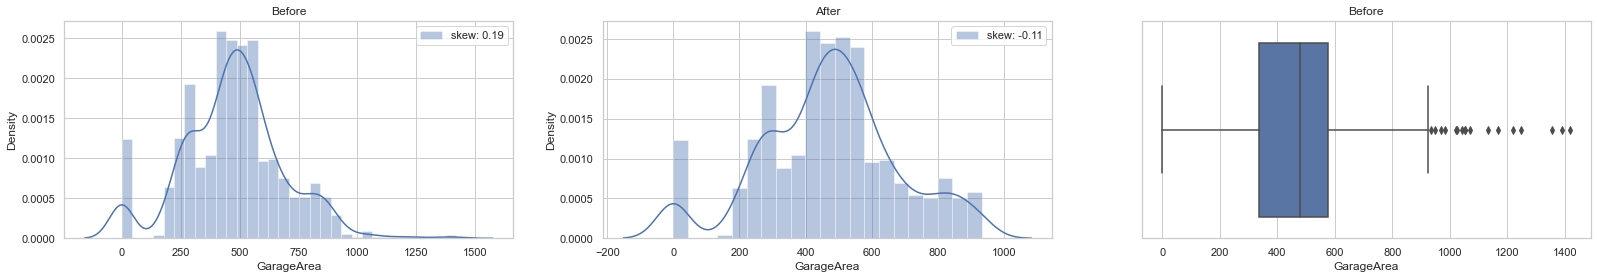

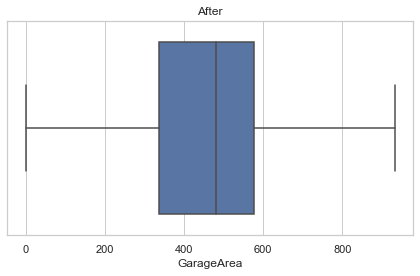

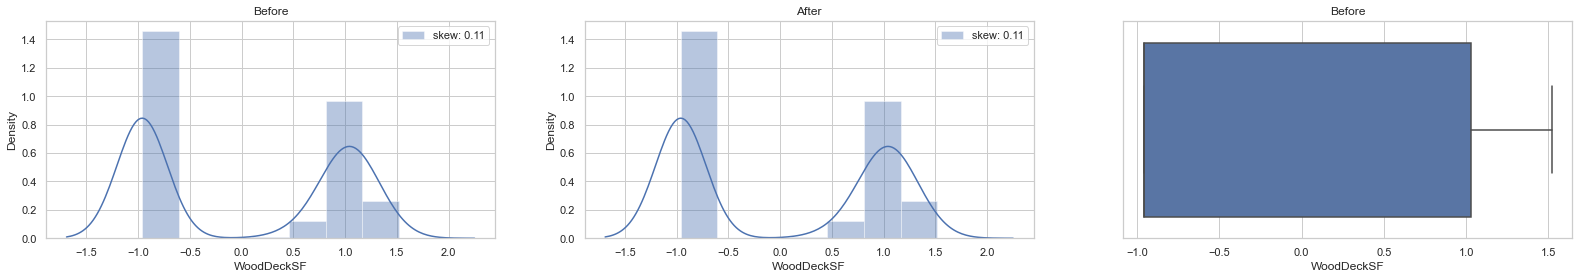

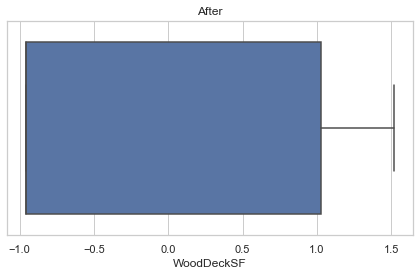

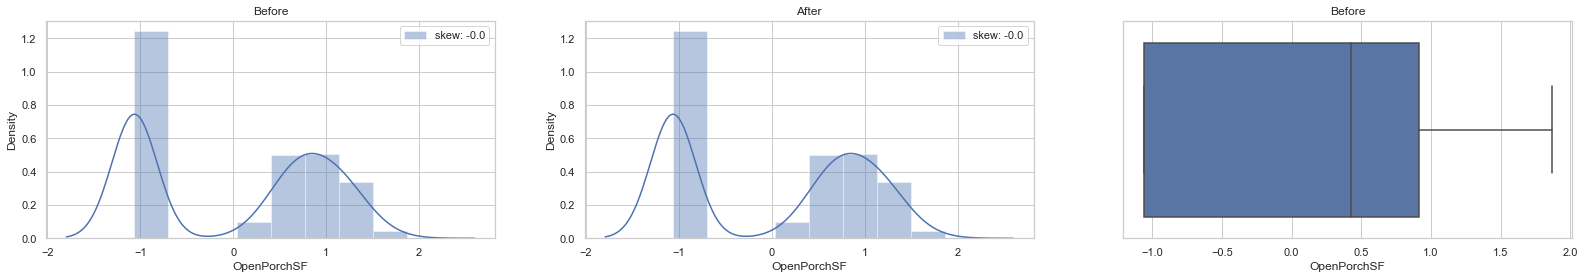

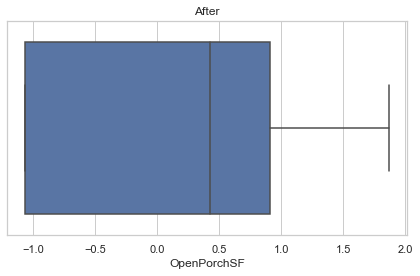

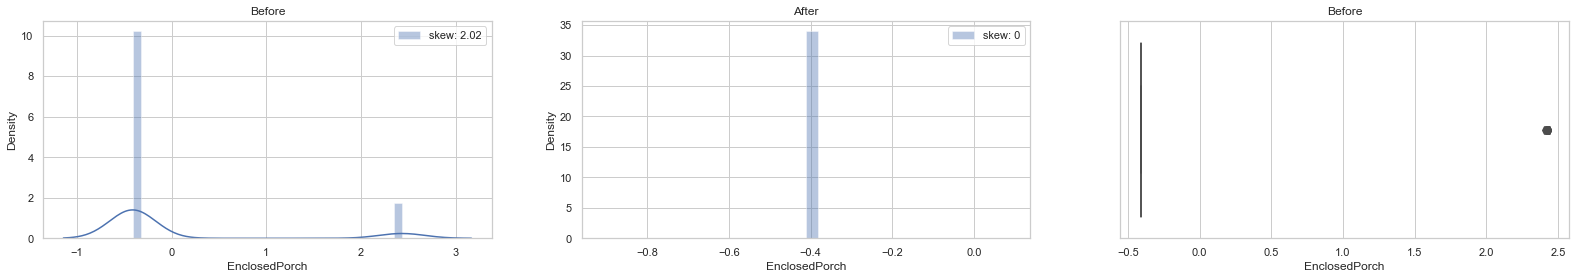

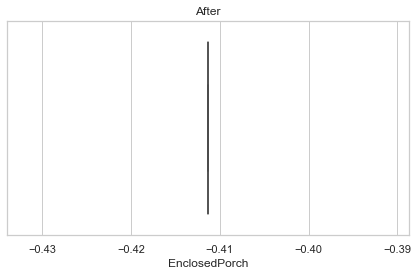

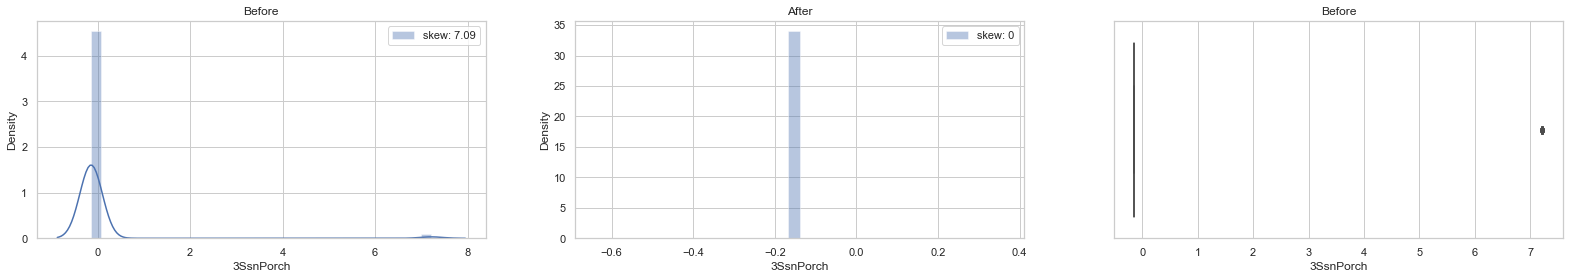

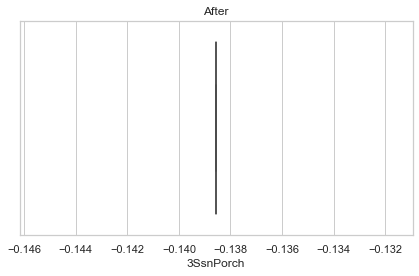

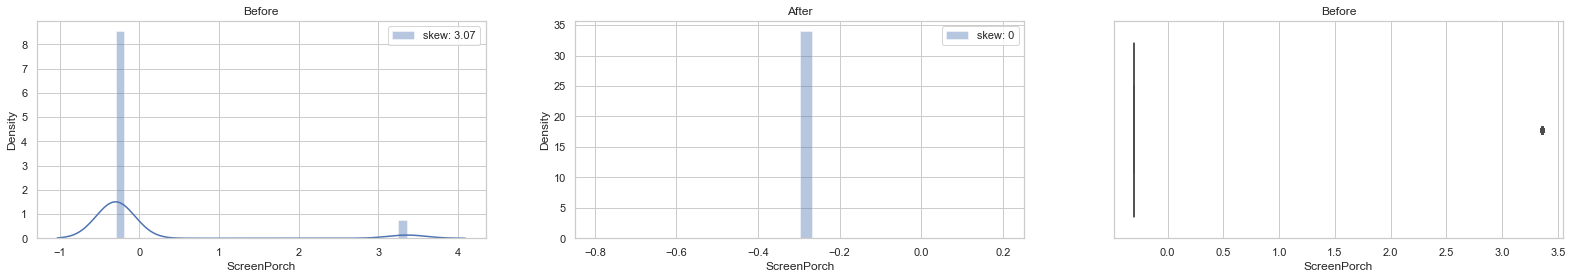

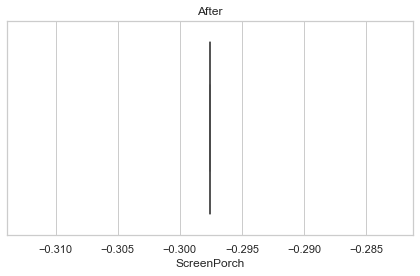

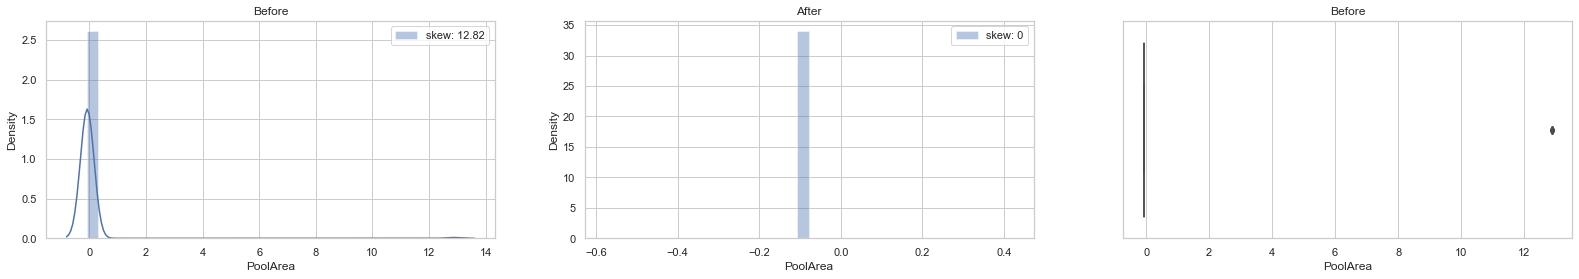

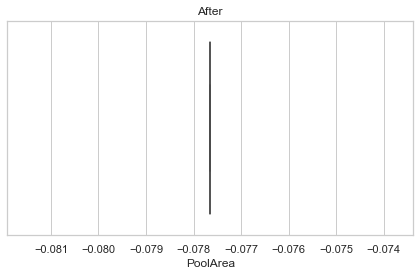

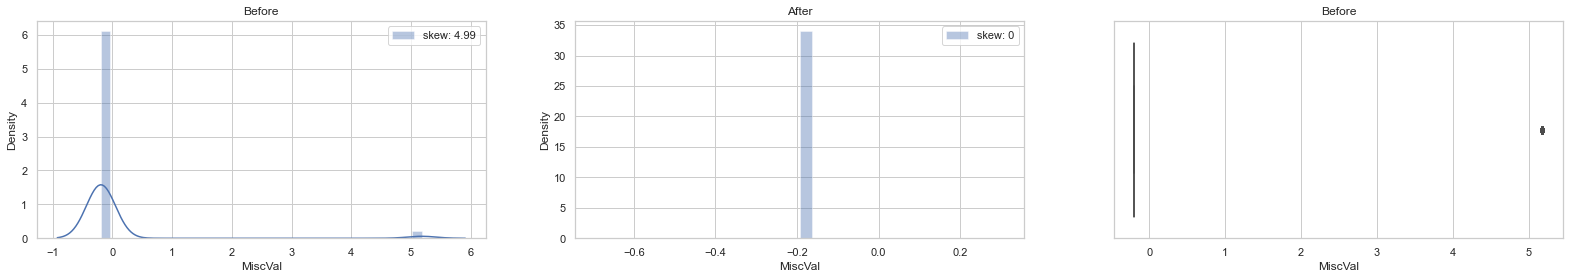

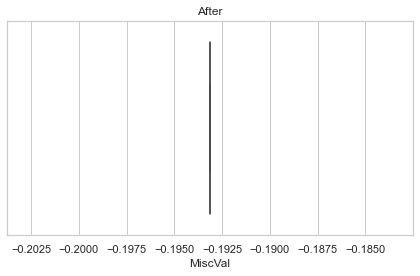

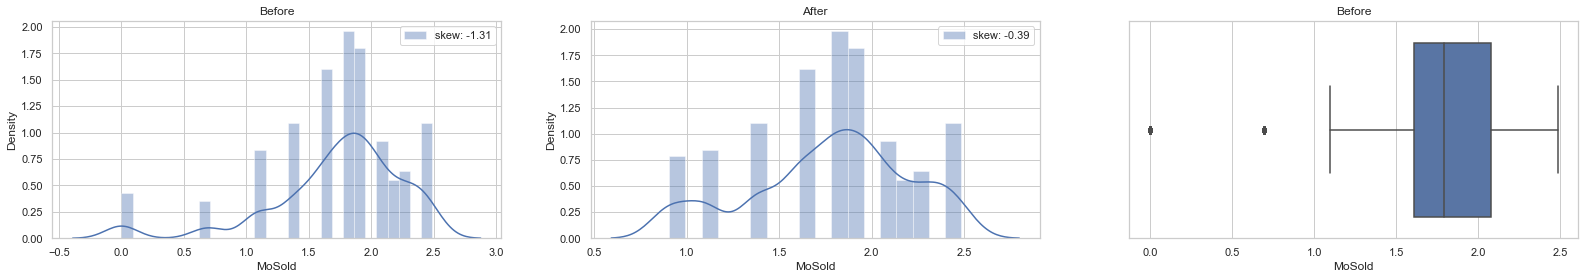

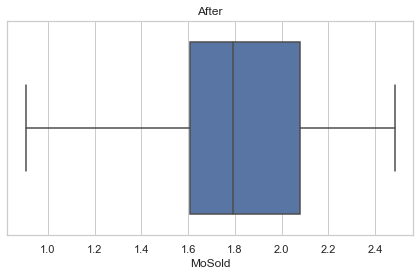

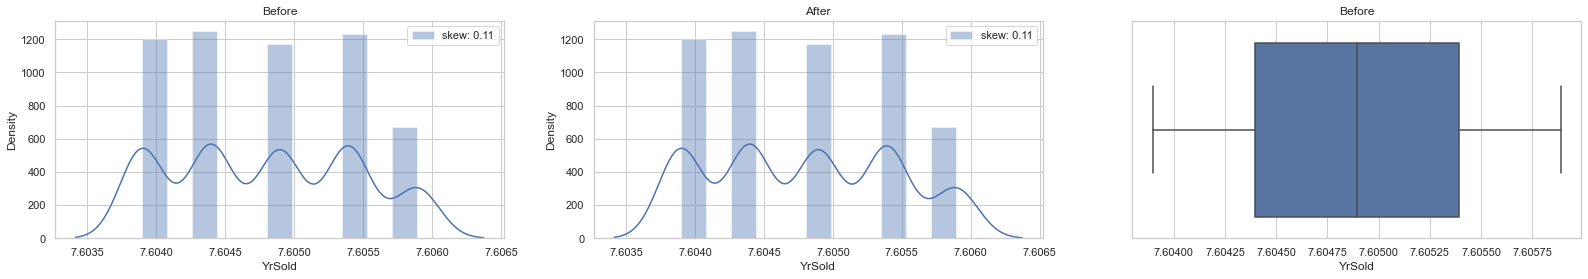

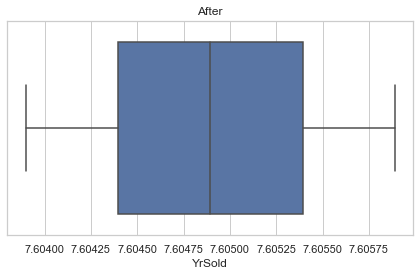

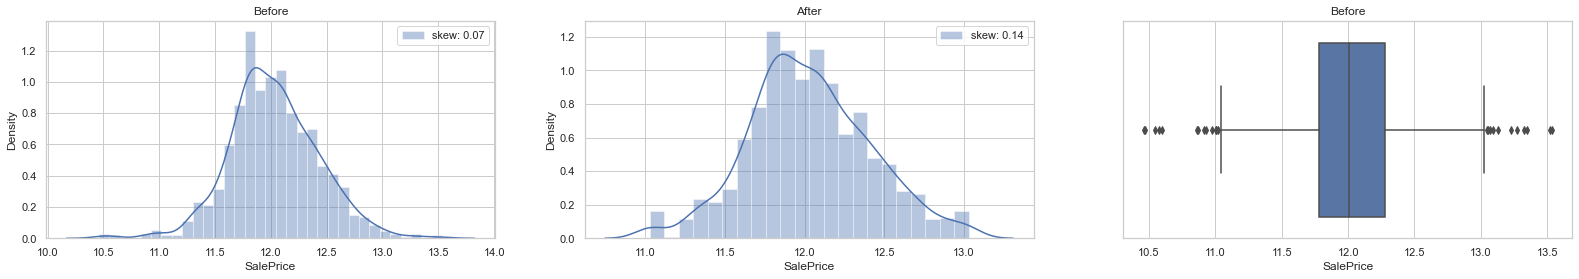

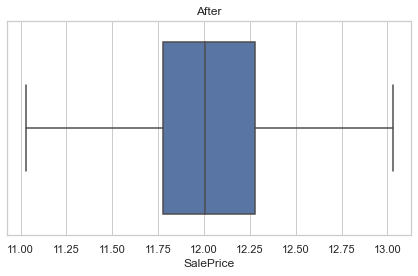

In [77]:
for i in num_col:
    
    plt.figure(figsize=(37,4))
    plt.subplot(141)
    sns.distplot(train[i],label="skew: "+str(np.round(train[i].skew(),2)))
    plt.legend()
    plt.title('Before')
    
    plt.subplot(142)
    sns.distplot(data[i],label="skew: "+str(np.round(data[i].skew(),2)))
    plt.legend()
    plt.title('After')
    
    plt.subplot(143)
    sns.boxplot(train[i])
    plt.title('Before')
    
    plt.figure(144)
    sns.boxplot(data[i])
    plt.title('After')
    plt.tight_layout()
    plt.show()

> OBSERVATION:
>> We can see that outliers are removed from the numerical data and also the skewness has reduced for some columns.

In [78]:
data

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley  \
0     4.844187    4.787492       RL     4.248495  8.502689   Pave  Missing   
1     6.790097    2.995732       RL     4.553877  9.671871   Pave  Missing   
2     6.675823    4.094345       RL     4.521789  9.202308   Pave  Missing   
3     4.700480    2.995732       RL     4.653960  9.371694   Pave  Missing   
4     6.045005    2.995732       RL     4.248495  9.719264   Pave  Missing   
...        ...         ...      ...          ...       ...    ...      ...   
1163  5.666427    2.995732       RL     4.248495  9.192075   Pave  Missing   
1164  6.317165    2.995732       RL     4.204693  9.079890   Pave  Missing   
1165  5.278115    5.075174       RL     3.676973  8.319643   Pave  Missing   
1166  3.433987    4.248495  RareVar     3.912023  9.047821   Pave     Pave   
1167  6.424869    4.094345       RL     4.248495  8.969669   Pave  Missing   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         IR1         Lvl    AllPub    Inside       Gtl      RareVar   
1         IR1         Lvl    AllPub    Inside       Mod        NAmes   
2         IR1         Lvl    AllPub   CulDSac       Gtl      NoRidge   
3         IR1         Lvl    AllPub    Inside       Gtl       NWAmes   
4         IR1         Lvl    AllPub       FR2       Gtl       NWAmes   
...       ...         ...       ...       ...       ...          ...   
1163      IR1         Lvl    AllPub    Inside       Gtl       Sawyer   
1164      Reg         Lvl    AllPub    Inside       Gtl      Edwards   
1165      Reg         Lvl    AllPub       FR2       Gtl      RareVar   
1166      Reg         Lvl    AllPub    Inside       Gtl       IDOTRR   
1167      IR1         Lvl    AllPub    Inside       Gtl      Gilbert   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm   TwnhsE     1Story     1.791759     1.609438   
1          Norm       Norm     1Fam     1Story     2.079442     1.791759   
2          Norm       Norm     1Fam     2Story     1.945910     1.609438   
3          Norm       Norm     1Fam     1Story     1.791759     1.791759   
4          Norm       Norm     1Fam     1Story     1.791759     1.945910   
...         ...        ...      ...        ...          ...          ...   
1163       Norm       Norm     1Fam     1Story     1.609438     1.609438   
1164      Feedr       Norm     1Fam     1Story     1.386294     1.609438   
1165       Norm       Norm    Twnhs     2Story     1.791759     1.791759   
1166      Feedr       Norm     1Fam     2Story     1.386294     1.386294   
1167       Norm       Norm     1Fam     2Story     1.791759     1.609438   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0      0.101481          31.0     Gable  CompShg     Plywood     Plywood   
1      0.279571          37.0      Flat  RareVar     Wd Sdng     Wd Sdng   
2     -0.705329          10.0     Gable  CompShg     MetalSd     MetalSd   
3      0.162872          33.0       Hip  CompShg     Plywood     Plywood   
4      0.132450           9.0     Gable  CompShg     CemntBd     CmentBd   
...         ...           ...       ...      ...         ...         ...   
1163   0.441794          43.0     Gable  CompShg     MetalSd     MetalSd   
1164   0.840563           6.0     Gable  CompShg     VinylSd     VinylSd   
1165   0.162872          33.0     Gable  CompShg     Plywood     RareVar   
1166   1.373868          58.0   RareVar  CompShg     BrkFace     BrkFace   
1167  -1.195859           3.0     Gable  CompShg     VinylSd     VinylSd   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          None   -0.812901        TA        TA     CBlock       Gd       TA   
1          None   -0.812901        Gd        Gd      PConc       TA       Gd   
2          None   -0.812901        Gd        TA      PConc       Gd       TA   
3       BrkFace    1.390202        TA        TA     CBlock      

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
    data[i]=le.fit_transform(data[i].astype(str))

In [83]:
data

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0     4.844187    4.787492         2     4.248495  8.502689       0      1   
1     6.790097    2.995732         2     4.553877  9.671871       0      1   
2     6.675823    4.094345         2     4.521789  9.202308       0      1   
3     4.700480    2.995732         2     4.653960  9.371694       0      1   
4     6.045005    2.995732         2     4.248495  9.719264       0      1   
...        ...         ...       ...          ...       ...     ...    ...   
1163  5.666427    2.995732         2     4.248495  9.192075       0      1   
1164  6.317165    2.995732         2     4.204693  9.079890       0      1   
1165  5.278115    5.075174         2     3.676973  8.319643       0      1   
1166  3.433987    4.248495         4     3.912023  9.047821       0      2   
1167  6.424869    4.094345         2     4.248495  8.969669       0      1   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0            0            3          0          3          0            14   
1            0            3          0          3          1             9   
2            0            3          0          1          0            11   
3            0            3          0          3          0            10   
4            0            3          0          2          0            10   
...        ...          ...        ...        ...        ...           ...   
1163         0            3          0          3          0            16   
1164         3            3          0          3          0             5   
1165         3            3          0          2          0            14   
1166         3            3          0          3          0             7   
1167         0            3          0          3          0             6   

      Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0              2           0         4           2     1.791759     1.609438   
1              2           0         0           2     2.079442     1.791759   
2              2           0         0           3     1.945910     1.609438   
3              2           0         0           2     1.791759     1.791759   
4              2           0         0           2     1.791759     1.945910   
...          ...         ...       ...         ...          ...          ...   
1163           2           0         0           2     1.609438     1.609438   
1164           1           0         0           2     1.386294     1.609438   
1165           2           0         3           3     1.791759     1.791759   
1166           1           0         0           3     1.386294     1.386294   
1167           2           0         0           3     1.791759     1.609438   

      YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0      0.101481          31.0          1         0            5            5   
1      0.279571          37.0          0         1            9            9   
2     -0.705329          10.0          1         0            4            4   
3      0.162872          33.0          2         0            5            5   
4      0.132450           9.0          1         0            2            2   
...         ...           ...        ...       ...          ...          ...   
1163   0.441794          43.0          1         0            4            4   
1164   0.840563           6.0          1         0            8            8   
1165   0.162872          33.0          1         0            5            6   
1166   1.373868          58.0          3         0            1            1   
1167  -1.195859           3.0          1         0            8            8   

      MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0              2   -0.812901          3          3           1         2   
1              2   -0.812901          1          1           2  

In [84]:
#dropping the columns that are either constant and unique to the rows or have more than 95% null-values.
data.drop(['Id','Utilities','PoolQC','MiscFeature','Alley','BsmtFinSF2','3SsnPorch','ScreenPorch','PoolArea','EnclosedPorch','KitchenAbvGr','BsmtHalfBath','LowQualFinSF'],axis=1,inplace=True)

In [85]:
data.shape

(1168, 68)

In [86]:
data

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0       4.787492         2     4.248495  8.502689       0         0   
1       2.995732         2     4.553877  9.671871       0         0   
2       4.094345         2     4.521789  9.202308       0         0   
3       2.995732         2     4.653960  9.371694       0         0   
4       2.995732         2     4.248495  9.719264       0         0   
...          ...       ...          ...       ...     ...       ...   
1163    2.995732         2     4.248495  9.192075       0         0   
1164    2.995732         2     4.204693  9.079890       0         3   
1165    5.075174         2     3.676973  8.319643       0         3   
1166    4.248495         4     3.912023  9.047821       0         3   
1167    4.094345         2     4.248495  8.969669       0         0   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0               3          3          0            14           2           0   
1               3          3          1             9           2           0   
2               3          1          0            11           2           0   
3               3          3          0            10           2           0   
4               3          2          0            10           2           0   
...           ...        ...        ...           ...         ...         ...   
1163            3          3          0            16           2           0   
1164            3          3          0             5           1           0   
1165            3          2          0            14           2           0   
1166            3          3          0             7           1           0   
1167            3          3          0             6           2           0   

      BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            4           2     1.791759     1.609438   0.101481          31.0   
1            0           2     2.079442     1.791759   0.279571          37.0   
2            0           3     1.945910     1.609438  -0.705329          10.0   
3            0           2     1.791759     1.791759   0.162872          33.0   
4            0           2     1.791759     1.945910   0.132450           9.0   
...        ...         ...          ...          ...        ...           ...   
1163         0           2     1.609438     1.609438   0.441794          43.0   
1164         0           2     1.386294     1.609438   0.840563           6.0   
1165         3           3     1.791759     1.791759   0.162872          33.0   
1166         0           3     1.386294     1.386294   1.373868          58.0   
1167         0           3     1.791759     1.609438  -1.195859           3.0   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0             1         0            5            5           2   -0.812901   
1             0         1            9            9           2   -0.812901   
2             1         0            4            4           2   -0.812901   
3             2         0            5            5           1    1.390202   
4             1         0            2            2           4    1.155573   
...         ...       ...          ...          ...         ...         ...   
1163          1         0            4            4           1    0.813623   
1164          1         0            8            8           2   -0.812901   
1165          1         0            5            6           2   -0.812901   
1166          3         0            1            1           2   -0.812901   
1167          1         0            8            8           2   -0.812901   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0             3          3           1         2         4             4   
1             1          1           2         4         1             1   
2             1          3    

> TEST DATA

In [87]:
#Readingtest data adn applying feature engineering on it.
test=pd.read_csv(r'C:\Users\Priyanka\Downloads\Project-Housing\Project-Housing_splitted\test.csv')

In [88]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0           HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1           Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3           Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4           Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
..          ...       ...       ...       ...          ...        ...   
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         Norm     1Fam     1Story            9            5       2005   
1         Norm   TwnhsE     1Story            8            5       1984   
2         Norm     1Fam     1Story            8            5       2001   
3         Norm     1Fam     2Story            7            7       1941   
4         Norm     1Fam     2Story            6            5       2007   
..         ...      ...        ...          ...          ...        ...   
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1            1984     Gable  CompShg     HdBoard     HdBoard       None   
2            2001       Hip  CompShg     VinylSd     VinylSd       None   
3            1950     Gable  CompShg     MetalSd     MetalSd       None   
4            2007     Gable  CompShg     VinylSd     VinylSd      Stone   
..            ...       ...      ...         ...         ...        ...   
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         200.0        Gd        TA      PConc       Ex       TA           Gd   
1           0.0        Gd        TA     CBlock       Gd       TA           Av   
2           0.0        Gd        TA      PConc       Gd       TA           Av   
3           0.0        TA        TA     CBlock       TA       TA   

In [89]:
#Splitting categorical and numerical features
cat_test=[i for i in test.columns if test[i].dtypes=='object']
print('Number of categorical columns are: ',len(cat_test))
print(cat_test)

Number of categorical columns are:  42
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [90]:
#As PoolQC has only Nan as entry we cannot see it in the categorical list. Adding PoolQC to categorical list.
cat_test=cat_test+['PoolQC']
print(len(cat_test))

43


In [91]:
num_test=[i for i in test.columns if test[i].dtypes!='object']
print("The number of numerical features are :",len(num_test))
print(num_test)

The number of numerical features are : 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold']


In [92]:
#Here numerical columns included PoolQC bacause of only Nan entrie. Removing PoolQC from numerical column list.
num_test.remove('PoolQC')
len(num_test)

37

> HANDLING MISSING FEATURES

In [93]:
#Handling missing values of categorical variables
# Checking for the null values in the features and making a list of the columns with missing values
cat_null=[i for i in cat_test if test[i].isnull().sum()!=0]
# Percentage of the missing values of the features.
null=(test[cat_null].isnull().sum()/len(test)*100).sort_values(ascending=False).to_frame().rename(columns={0:'Null Values'})
null

Null Values
PoolQC         100.000000
MiscFeature     96.575342
Alley           95.205479
Fence           84.931507
FireplaceQu     47.602740
GarageCond       5.821918
GarageQual       5.821918
GarageFinish     5.821918
GarageType       5.821918
BsmtFinType2     2.397260
BsmtFinType1     2.397260
BsmtExposure     2.397260
BsmtCond         2.397260
BsmtQual         2.397260
Electrical       0.342466
MasVnrType       0.342466

In [94]:
#Replacing missing values with a new variable 'missing' for the categorical variables.
def rep_nan_cat(test,cat_null):
    data=test.copy()
    data[cat_null]=data[cat_null].fillna('Missing')
    return data

test=rep_nan_cat(test,cat_null)
test[cat_null].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
Fence           0
MiscFeature     0
PoolQC          0
dtype: int64

In [95]:
#Handling missing values in the numerical features
num_nan=[i for i in num_test if test[i].isnull().sum()!=0]
null=(test[num_nan].isnull().sum()/len(test)*100).sort_values(ascending=False).to_frame().rename(columns={0:'Null Values'})
null

Null Values
LotFrontage    15.410959
GarageYrBlt     5.821918
MasVnrArea      0.342466

In [96]:
#Replacing null-values of the numerical data with median as our data has outliers.
for i in num_nan:
    median_val=test[i].median()
    
    #Replacing null-value in the actual feature
    test[i].fillna(median_val,inplace=True)
    
#checking if we have successfully removed missing values
test[num_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [97]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0     337          20       RL         86.0    14157   Pave  Missing      IR1   
1    1018         120       RL         65.0     5814   Pave  Missing      IR1   
2     929          20       RL         65.0    11838   Pave  Missing      Reg   
3    1148          70       RL         75.0    12000   Pave  Missing      Reg   
4    1227          60       RL         86.0    14598   Pave  Missing      IR1   
..    ...         ...      ...          ...      ...    ...      ...      ...   
287    83          20       RL         78.0    10206   Pave  Missing      Reg   
288  1048          20       RL         57.0     9245   Pave  Missing      IR2   
289    17          20       RL         65.0    11241   Pave  Missing      IR1   
290   523          50       RM         50.0     5000   Pave  Missing      Reg   
291  1379         160       RM         21.0     1953   Pave  Missing      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0           HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1           Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3           Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4           Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
..          ...       ...       ...       ...          ...        ...   
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         Norm     1Fam     1Story            9            5       2005   
1         Norm   TwnhsE     1Story            8            5       1984   
2         Norm     1Fam     1Story            8            5       2001   
3         Norm     1Fam     2Story            7            7       1941   
4         Norm     1Fam     2Story            6            5       2007   
..         ...      ...        ...          ...          ...        ...   
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1            1984     Gable  CompShg     HdBoard     HdBoard       None   
2            2001       Hip  CompShg     VinylSd     VinylSd       None   
3            1950     Gable  CompShg     MetalSd     MetalSd       None   
4            2007     Gable  CompShg     VinylSd     VinylSd      Stone   
..            ...       ...      ...         ...         ...        ...   
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         200.0        Gd        TA      PConc       Ex       TA           Gd   
1           0.0        Gd        TA     CBlock       Gd       TA           Av   
2           0.0        Gd        TA      PConc       Gd       TA           Av   
3           0.0        TA      

> HANDLING TEMPORAL VARIABLES

In [98]:
#Instead of keeping the entries of the date-time feature in year, we will convert them into 'how many years until the house was sold'
year_col=[i for i in num_test if 'Yr' in i or 'Year' in i]
for i in year_col:  #year_col is previously created, list of the date-time features
    if i!='YrSold':
        test[i]=test['YrSold']-test[i]

In [99]:
test[year_col]

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0            2             1          2.0    2007
1           25            25         25.0    2009
2            8             8          8.0    2009
3           68            59         68.0    2009
4            1             1          1.0    2008
..         ...           ...          ...     ...
287          1             1          1.0    2008
288         14            13         12.0    2008
289         40            40         40.0    2010
290         59            56         56.0    2006
291         33            33         33.0    2006

[292 rows x 4 columns]

> HANDLING SKEWNESS OF NUMERICAL VARIABLES

In [100]:
#We will handle the skewness of the numerical variable with the log normal value of the entries.
#In this we will only consider those variables which do not have '0' as an entry.
col_with_0=[i for i in  num_test if 0  in test[i].unique()]
col_no_0=[i for i in num_test if i not in col_with_0]

In [101]:
for i in col_no_0:
    test[i]=np.log(test[i])

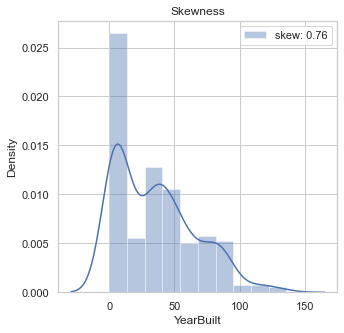

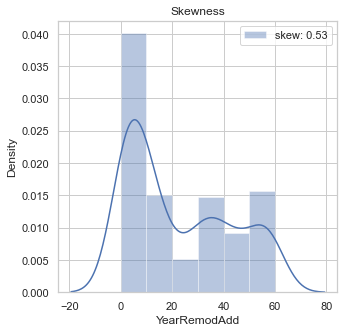

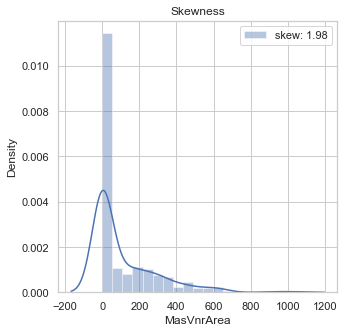

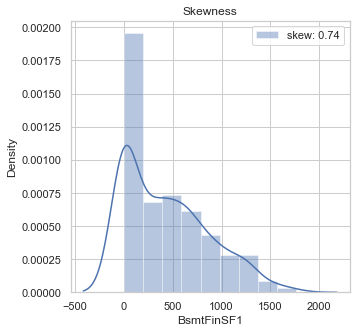

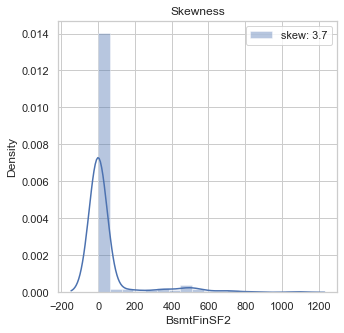

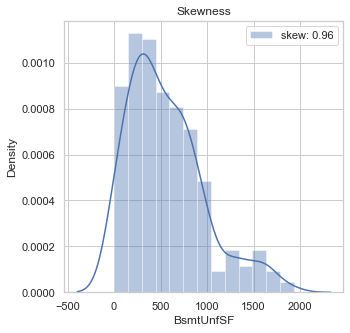

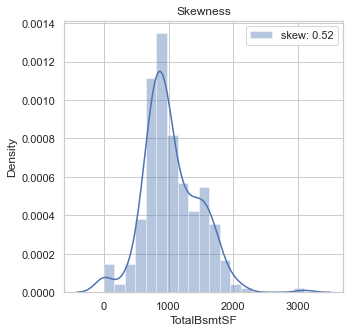

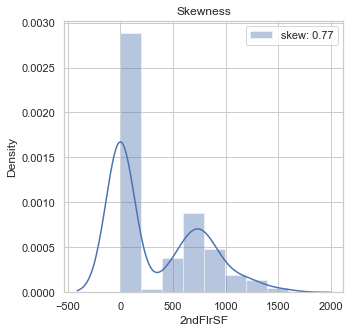

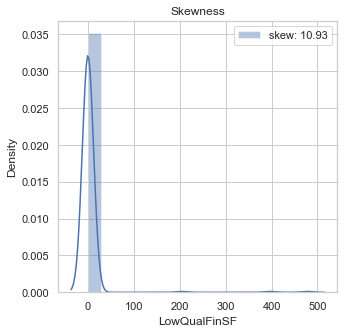

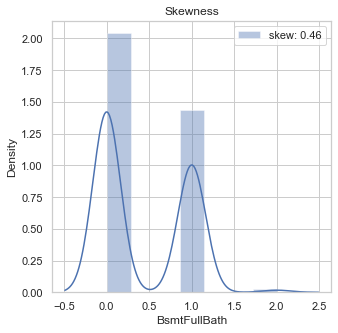

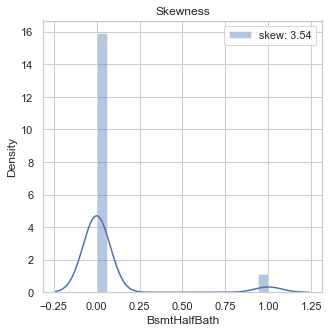

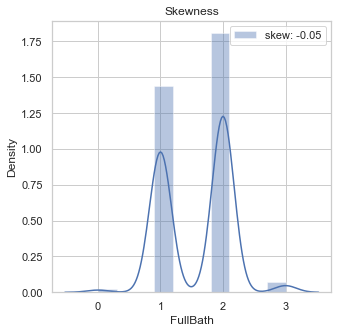

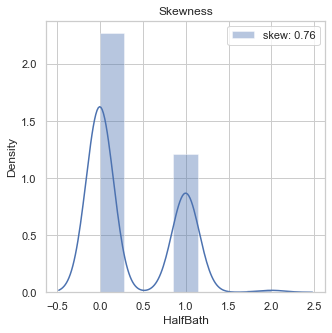

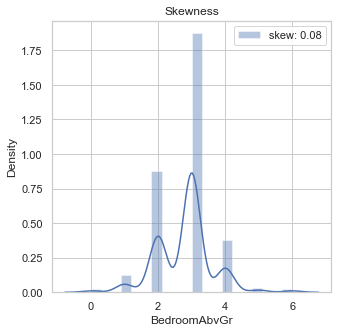

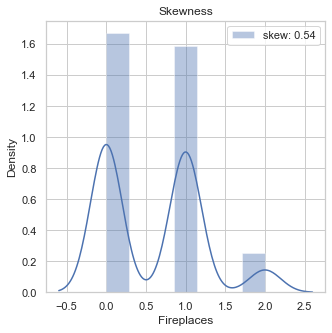

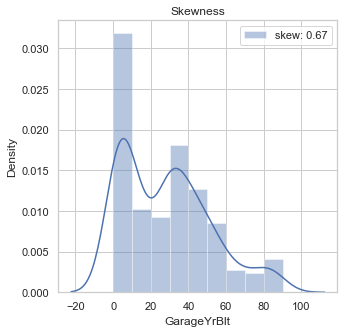

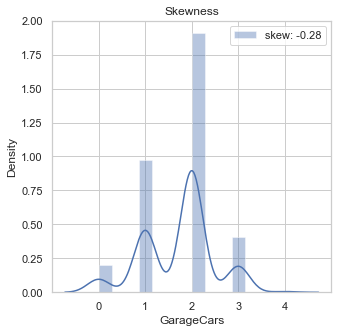

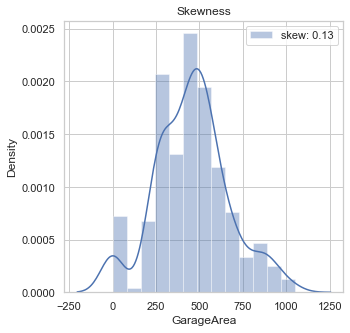

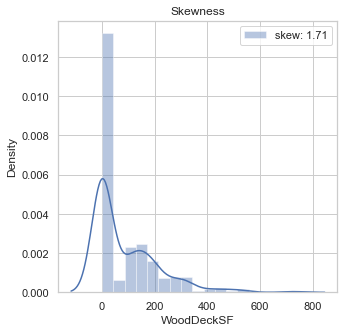

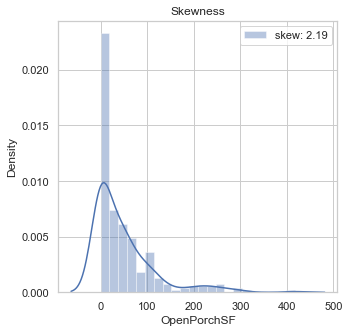

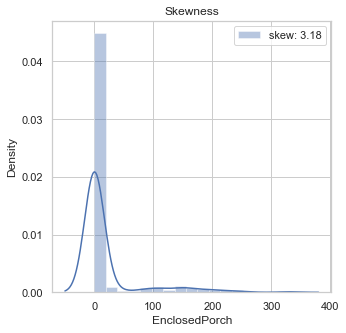

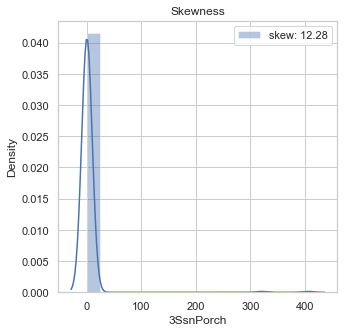

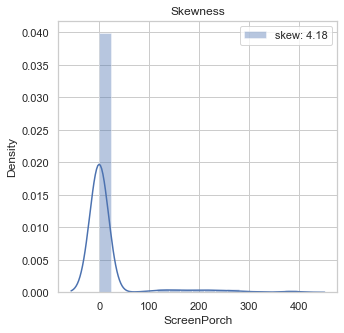

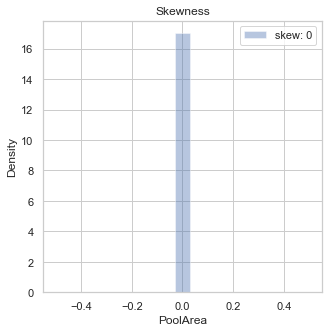

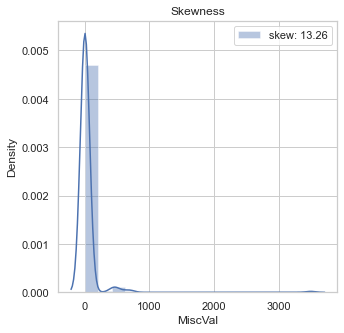

In [102]:
#Checking the distribution of the features after removing skewness
for i in col_with_0:
    plt.figure(figsize=(5,5))
    sns.distplot(test[i],label="skew: "+str(np.round(test[i].skew(),2)))
    plt.legend()
    plt.title('Skewness')
    plt.show()

In [103]:
skew=pd.DataFrame()

#Separate columns for negative and positive skewness
skew[['Positive Columns','Skewness(+v)']] = test[col_with_0].skew().sort_values(ascending=False)[:10].reset_index()
skew[['Negative Columns','Skewness(-v)']] = test[col_with_0].skew().sort_values(ascending=True)[:10].reset_index()

skew.columns = pd.MultiIndex.from_tuples([('Positive Skewness', 'Columns'), ('Positive Skewness', 'Skewness'),
                                              ('Negative Skewness', 'Columns'), ('Negative Skewness', 'Skewness')])
skew

Positive Skewness            Negative Skewness          
            Columns   Skewness           Columns  Skewness
0           MiscVal  13.264758        GarageCars -0.280324
1         3SsnPorch  12.277476          FullBath -0.049800
2      LowQualFinSF  10.929928          PoolArea  0.000000
3       ScreenPorch   4.182351      BedroomAbvGr  0.075315
4        BsmtFinSF2   3.698543        GarageArea  0.133547
5      BsmtHalfBath   3.544994      BsmtFullBath  0.463685
6     EnclosedPorch   3.177046       TotalBsmtSF  0.519257
7       OpenPorchSF   2.185030      YearRemodAdd  0.533693
8        MasVnrArea   1.978463        Fireplaces  0.540164
9        WoodDeckSF   1.708221       GarageYrBlt  0.671496

In [104]:
skewness=test[col_with_0].skew()
high_skew=skewness[abs(skewness)>0.5]
high_skew

YearBuilt         0.756971
YearRemodAdd      0.533693
MasVnrArea        1.978463
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
2ndFlrSF          0.765511
LowQualFinSF     10.929928
BsmtHalfBath      3.544994
HalfBath          0.758892
Fireplaces        0.540164
GarageYrBlt       0.671496
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
MiscVal          13.264758
dtype: float64

In [105]:
#Using power transformer to remove the skewness of the features with 0.
for i in high_skew.index:
    test[i]=pt.fit_transform(test[i].values.reshape(-1,1))

In [106]:
test[col_with_0].skew()

YearBuilt        -0.178083
YearRemodAdd     -0.140395
MasVnrArea        0.376082
BsmtFinSF1       -0.441605
BsmtFinSF2        2.570199
BsmtUnfSF        -0.232099
TotalBsmtSF      -0.037982
2ndFlrSF          0.284246
LowQualFinSF      9.763295
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.621093
BedroomAbvGr      0.075315
Fireplaces        0.076669
GarageYrBlt      -0.188306
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        0.210102
OpenPorchSF      -0.058951
EnclosedPorch     2.165535
3SsnPorch        12.020386
ScreenPorch       3.331084
PoolArea          0.000000
MiscVal           5.148542
dtype: float64

>Handling Rare Categorical Features

In [107]:
print(cat_test)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'PoolQC']


In [108]:
#Replacing the index that holds less than 0.01% weightage in the dataset w.r.t the Sale price with a new index.
for i in cat_test:
    temp=test[i].value_counts()/len(test)
    temp_df=temp[temp>0.01].index
    test[i]=np.where(test[i].isin(temp_df),test[i],'RareVar')

In [109]:
for i in cat_test:
    print(test[i].value_counts(),'\n')

RL         223
RM          55
FV          13
RareVar      1
Name: MSZoning, dtype: int64 

Pave       290
RareVar      2
Name: Street, dtype: int64 

Missing    278
Grvl         9
Pave         5
Name: Alley, dtype: int64 

Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64 

Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64 

AllPub     291
RareVar      1
Name: Utilities, dtype: int64 

Inside     210
Corner      41
CulDSac     25
FR2         14
RareVar      2
Name: LotConfig, dtype: int64 

Gtl        277
Mod         14
RareVar      1
Name: LandSlope, dtype: int64 

NAmes      43
CollgCr    32
OldTown    27
Somerst    18
Edwards    17
NridgHt    16
Mitchel    15
Gilbert    15
Sawyer     14
NWAmes     14
Timber     14
SawyerW     8
MeadowV     8
BrkSide     8
IDOTRR      7
StoneBr     6
NoRidge     6
Crawfor     6
BrDale      5
RareVar     5
ClearCr     4
SWISU       4
Name: Neighborhood, dtype: int64 

Norm       255
Feedr       14
Arter

> REMOVING OUTLIERS

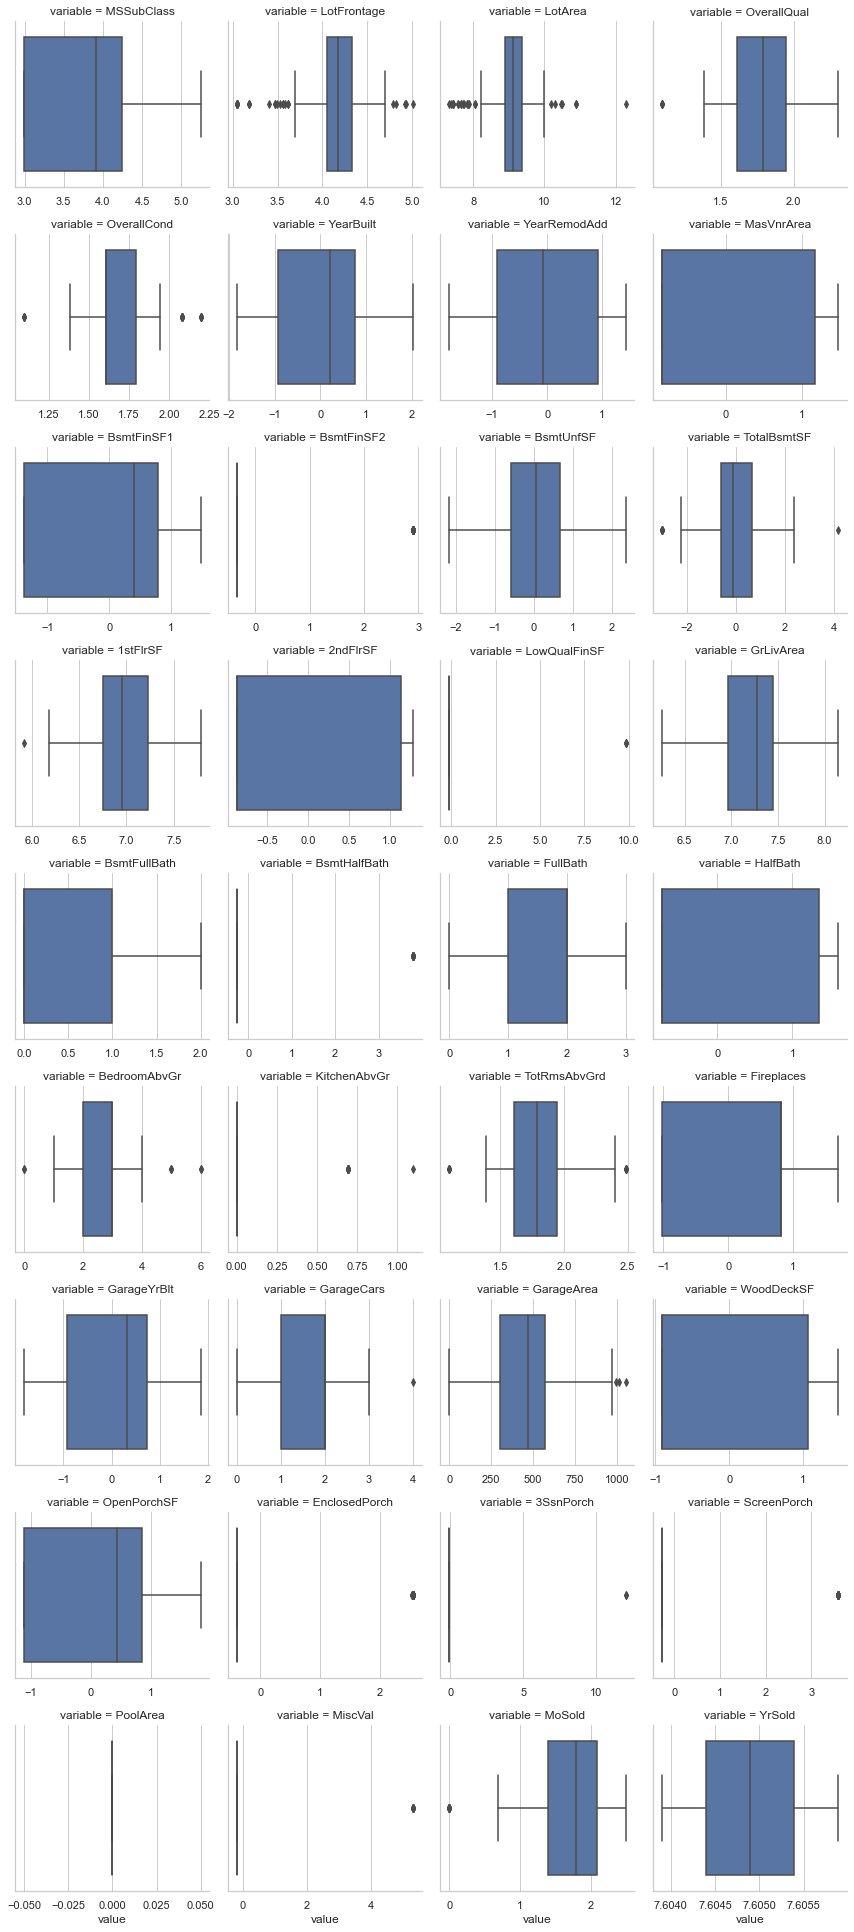

In [110]:
#VISUALIZING OUTLIERS
num_col=[i for i in test.columns if test[i].dtypes!='O']
num_col.remove('Id')
nd = pd.melt(test, value_vars = num_col)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.boxplot, 'value')
n1

> OBSERVATION:
    >>We can see that outliers are present in the test data.

In [111]:
data_test=test.copy()
def iqr_cap(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df[col]=np.where(df[col]<lower,lower,np.where(df[col]>upper,upper,df[col]))

In [112]:
iqr_cap(data_test,num_col)

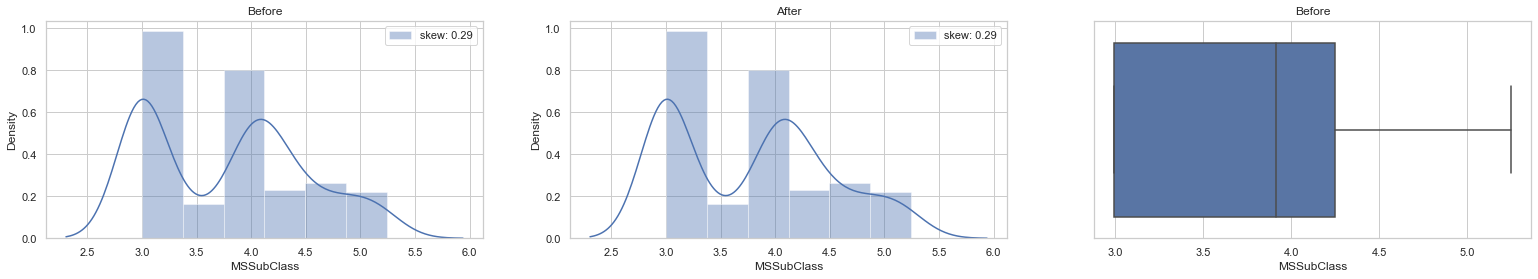

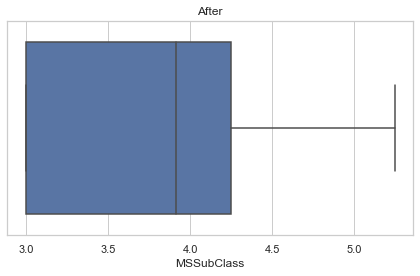

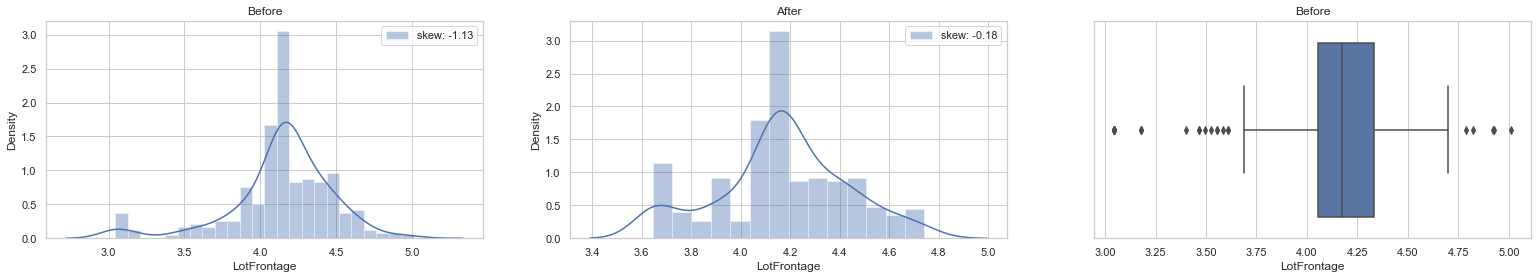

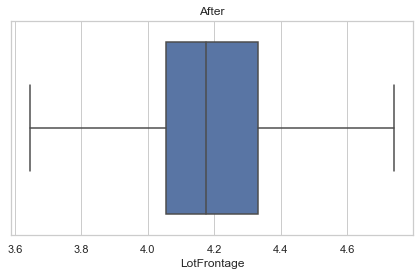

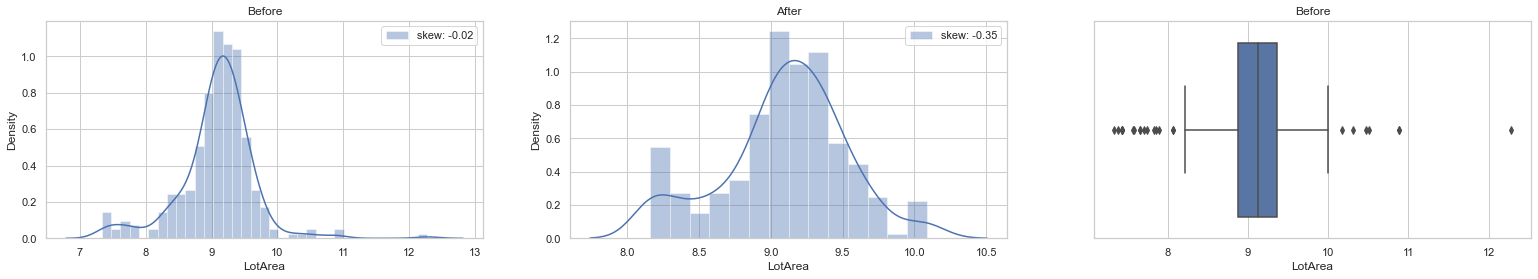

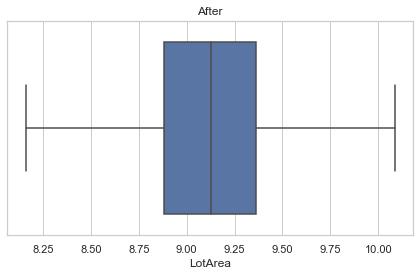

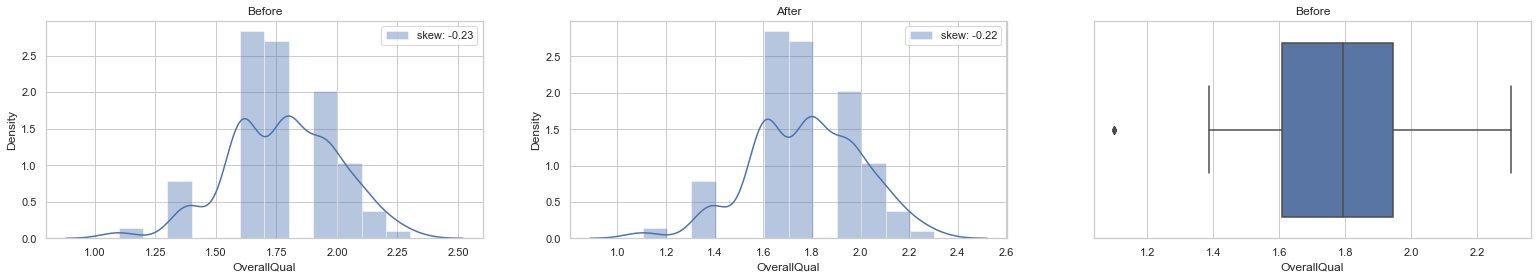

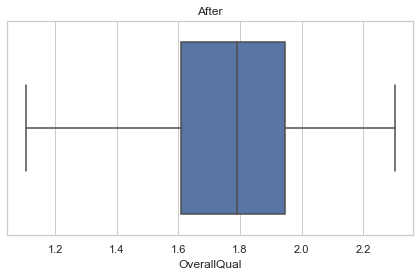

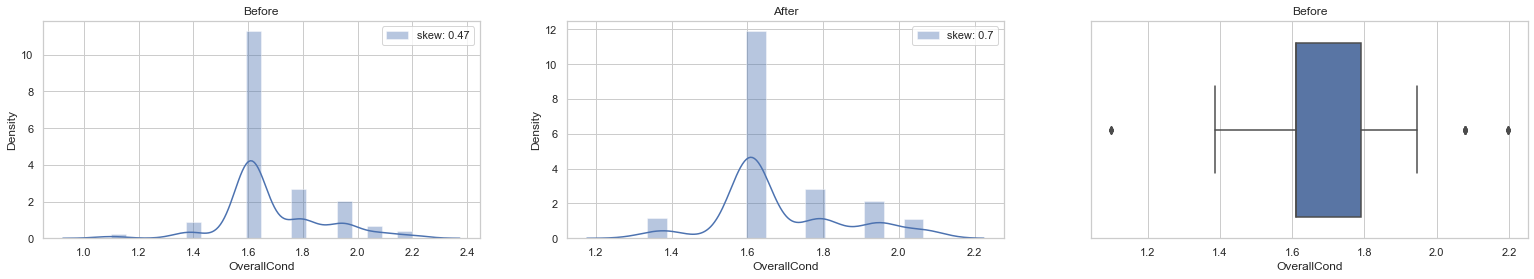

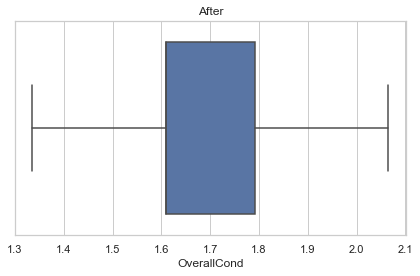

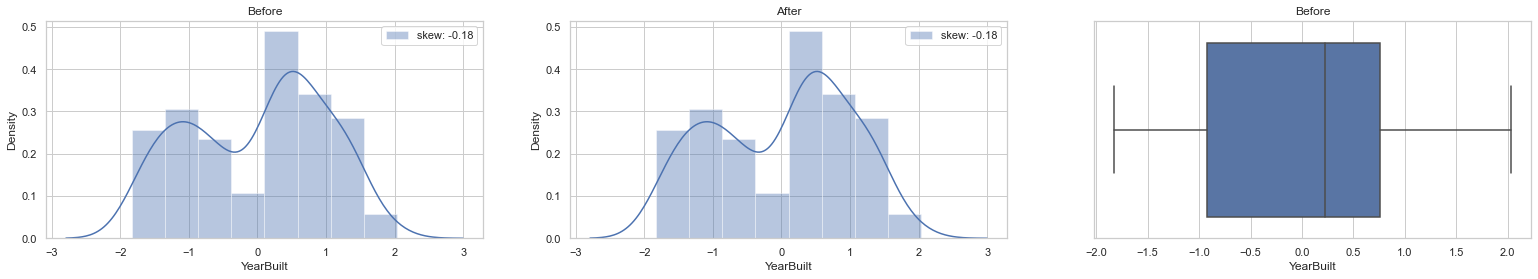

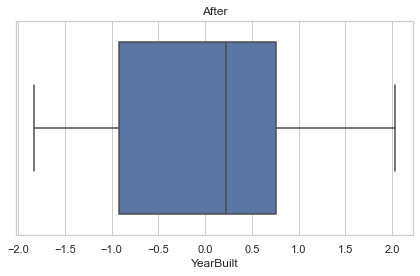

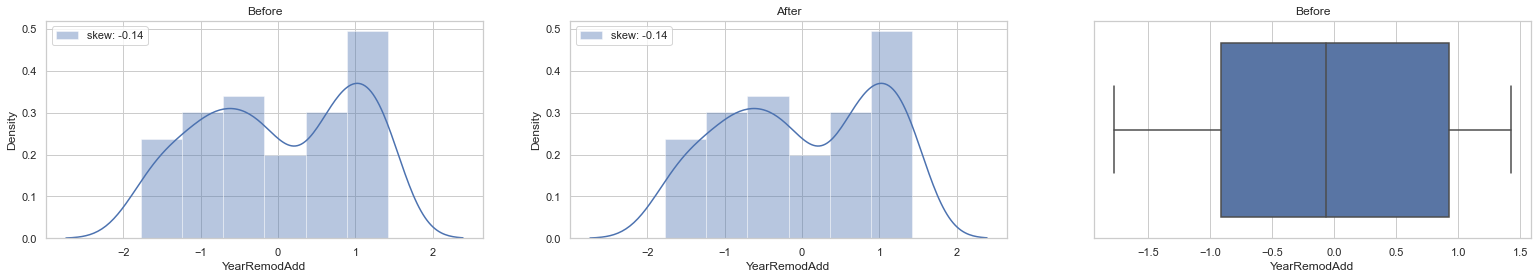

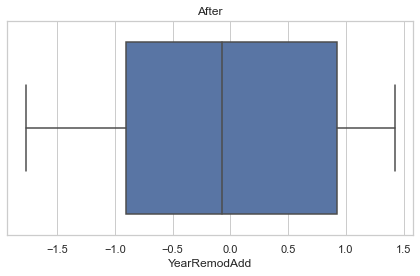

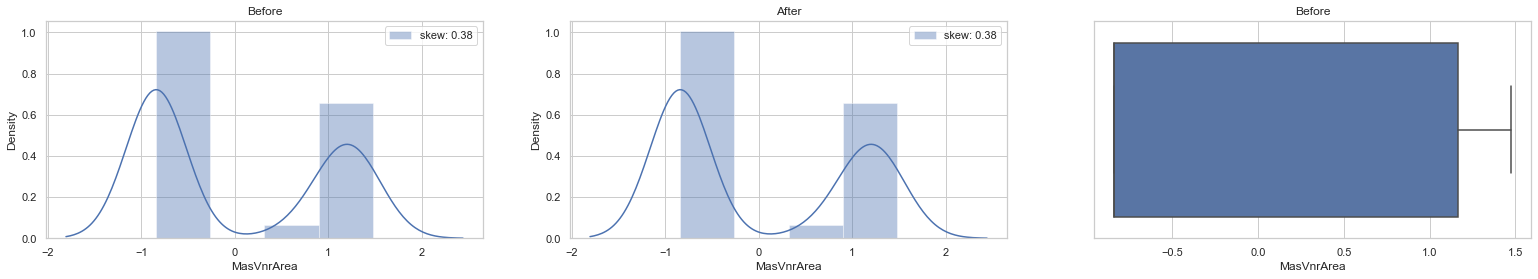

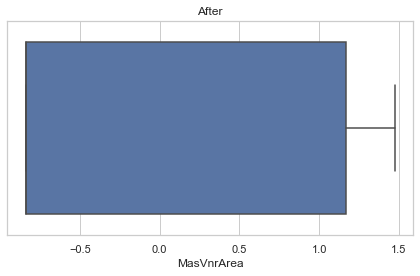

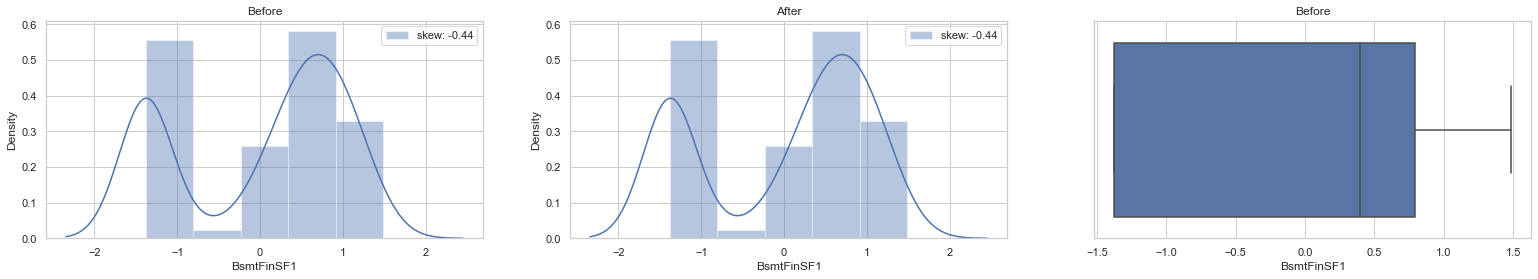

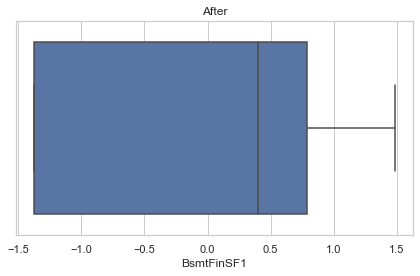

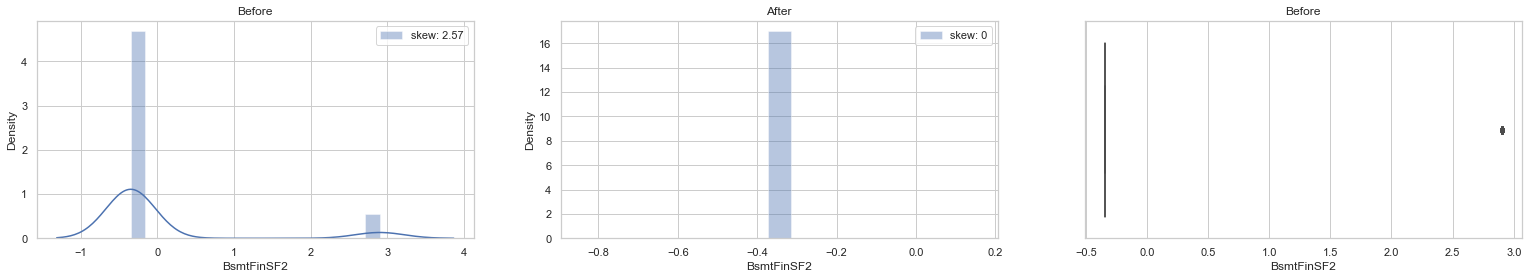

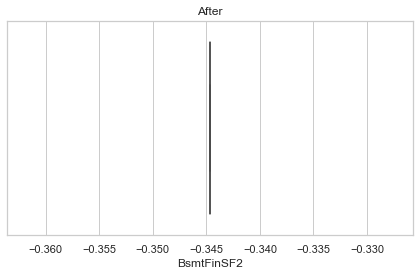

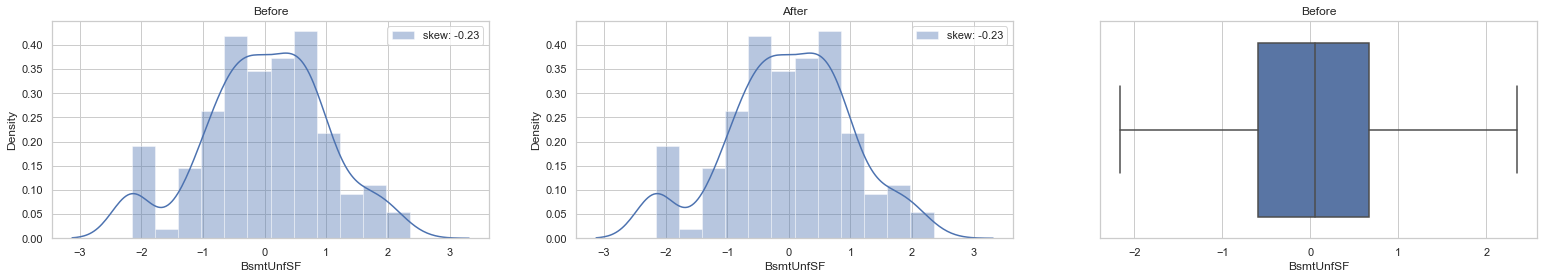

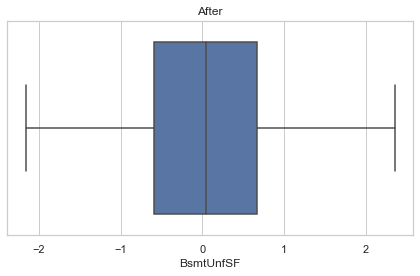

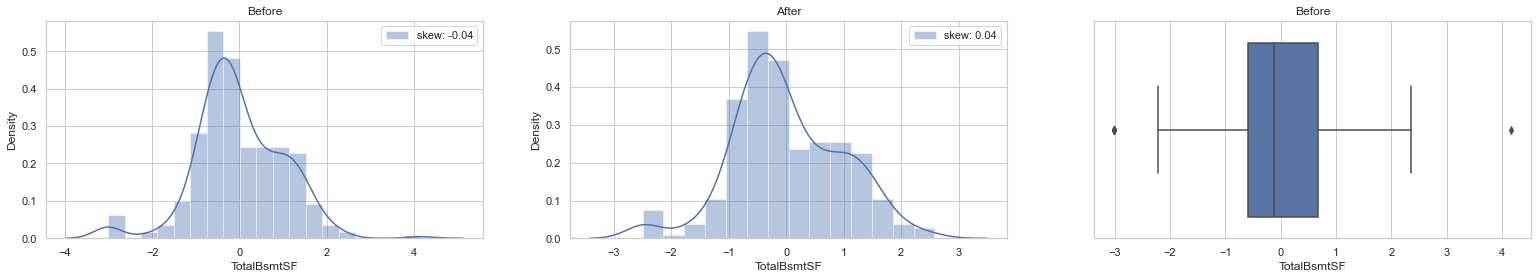

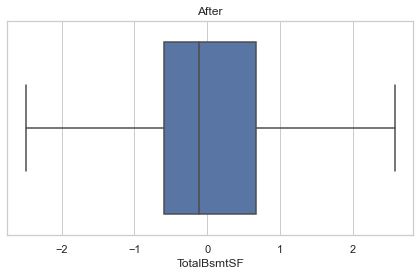

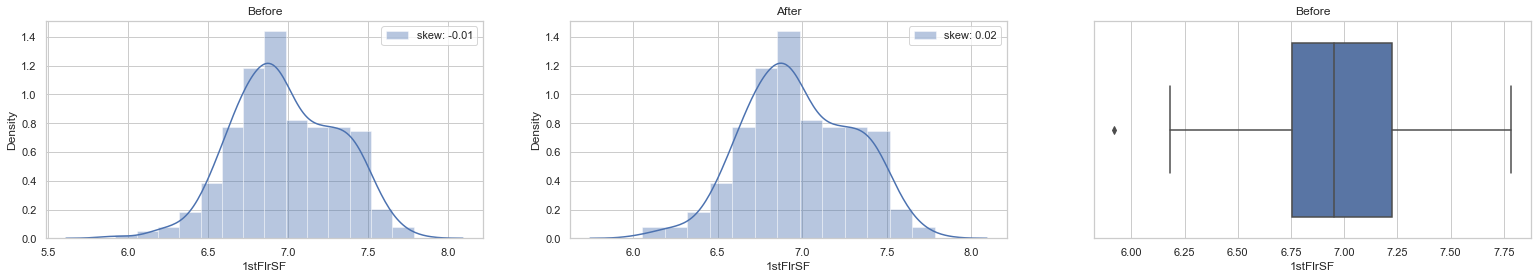

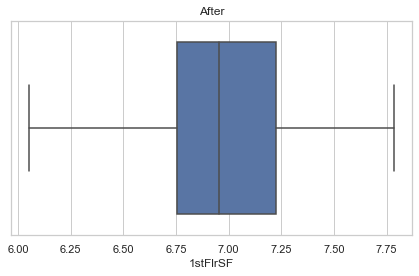

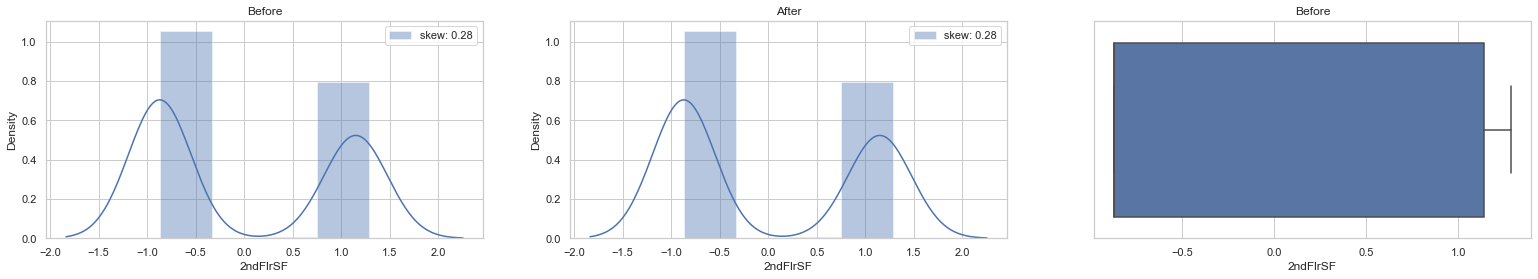

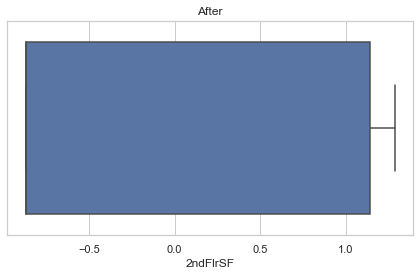

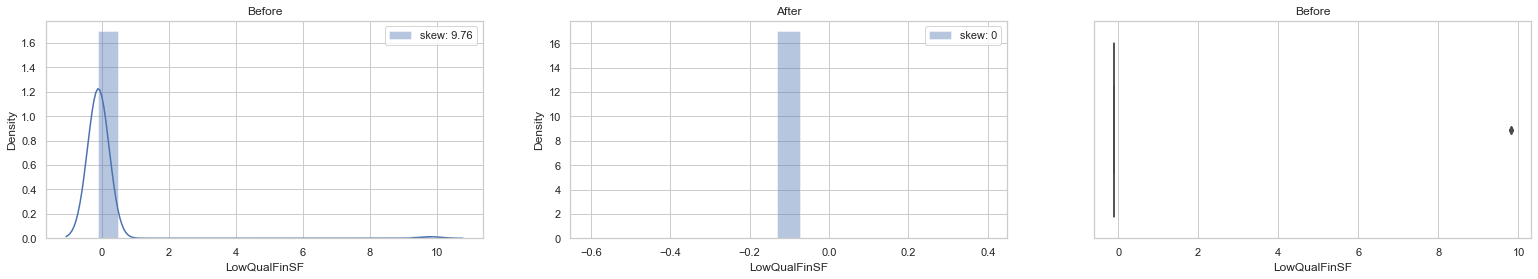

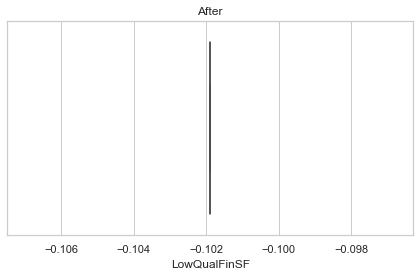

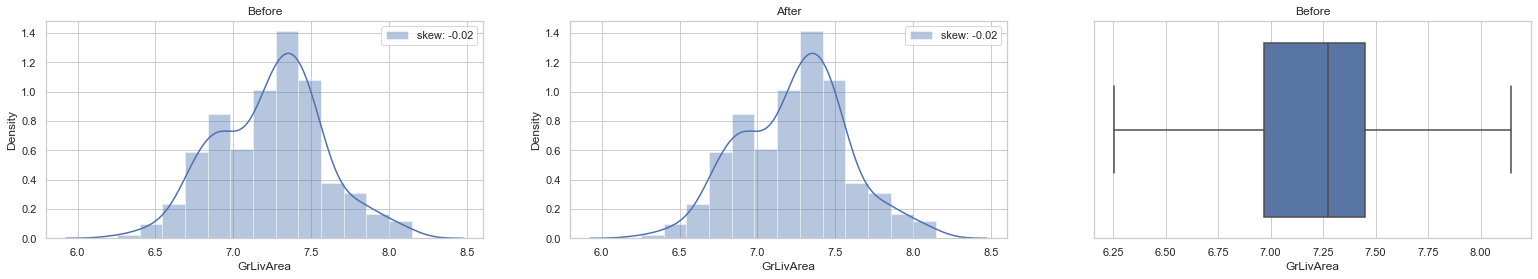

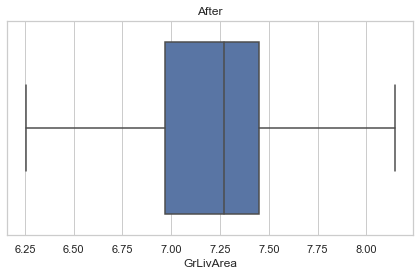

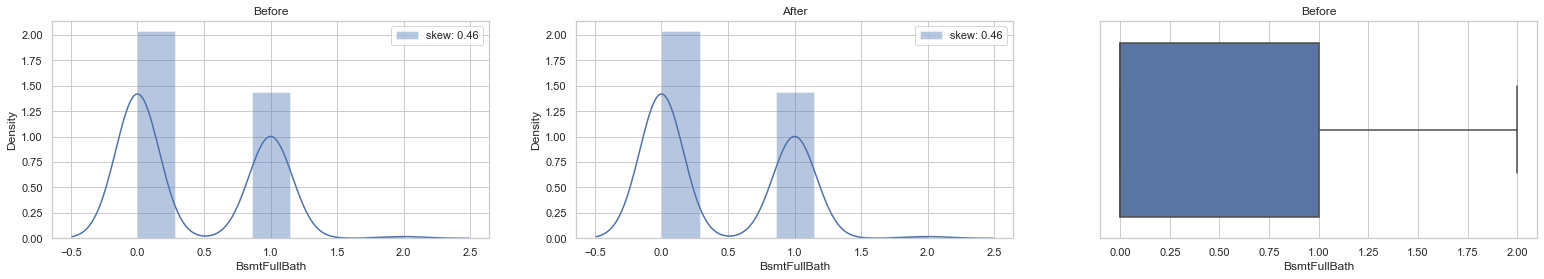

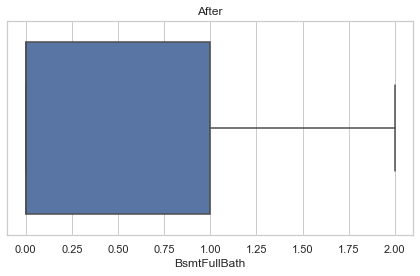

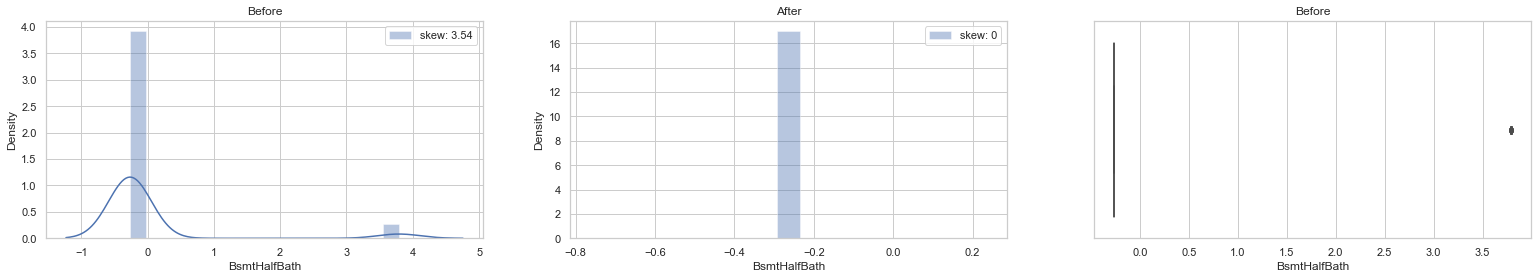

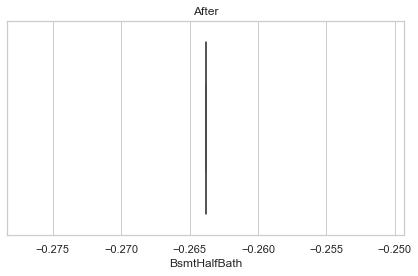

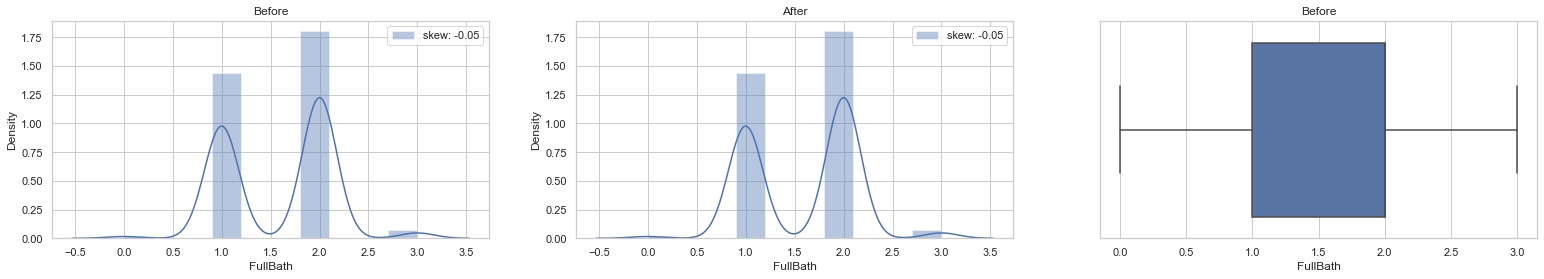

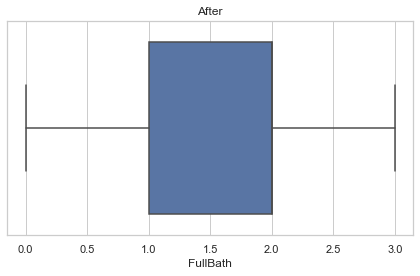

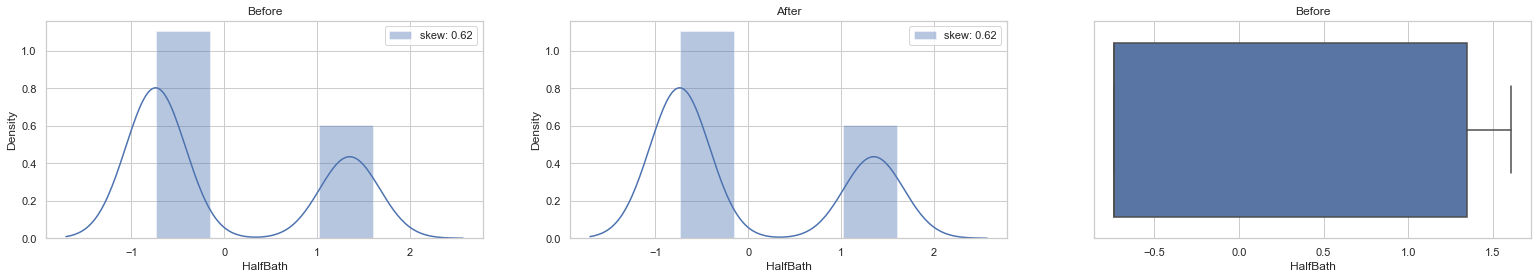

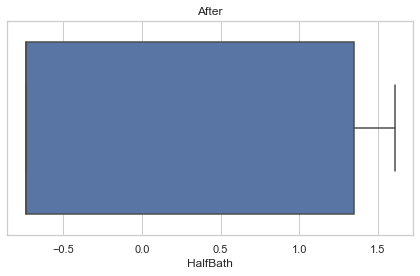

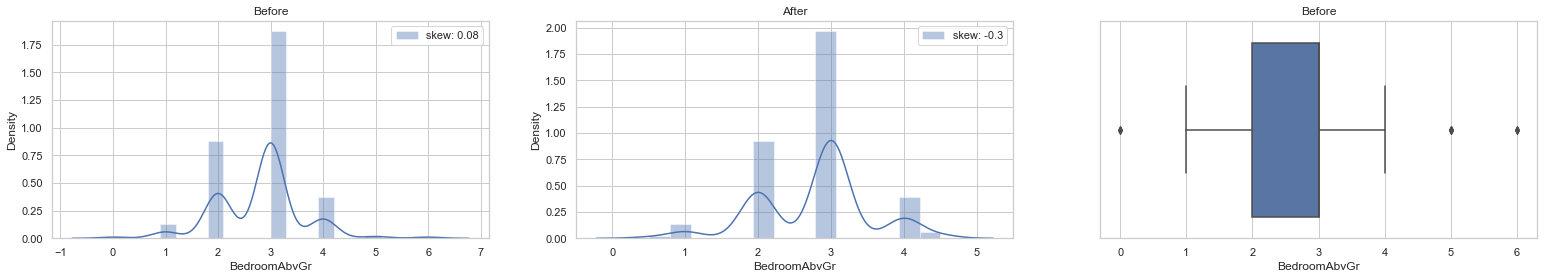

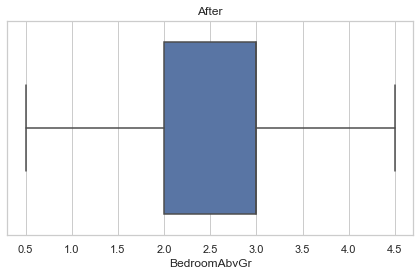

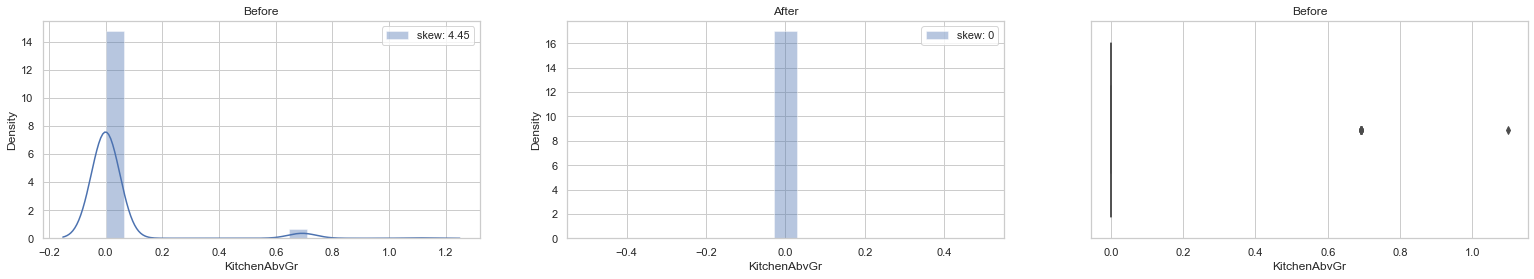

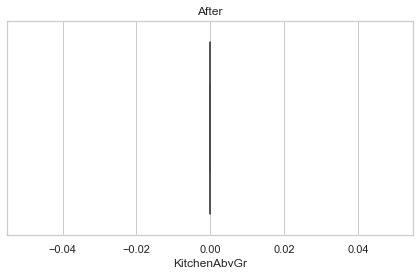

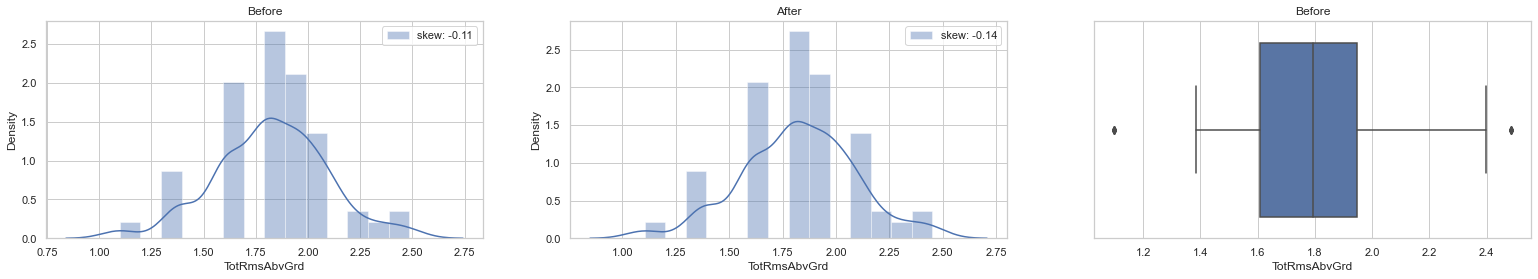

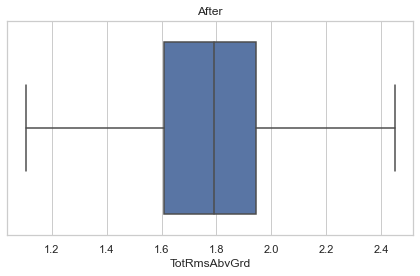

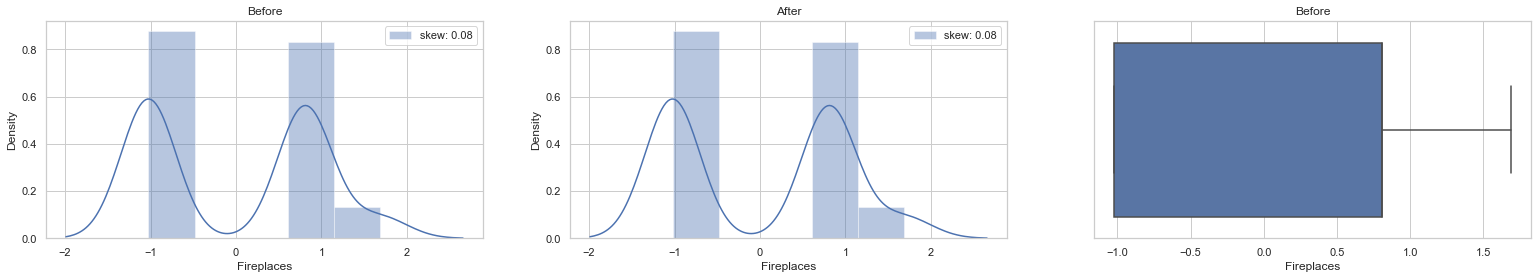

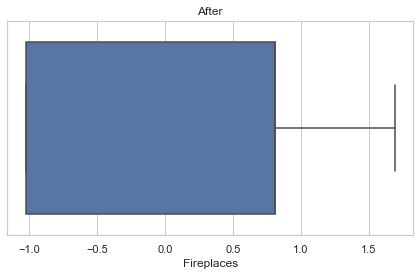

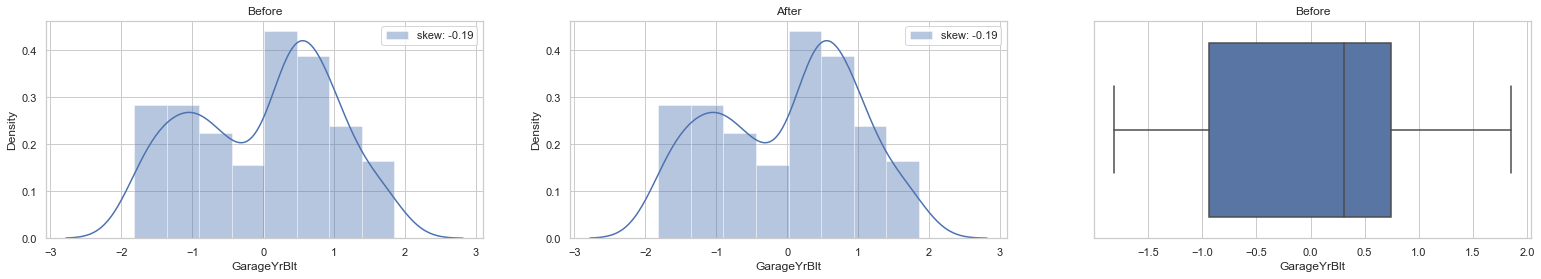

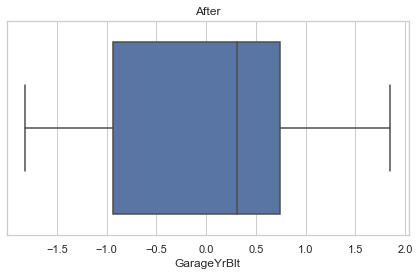

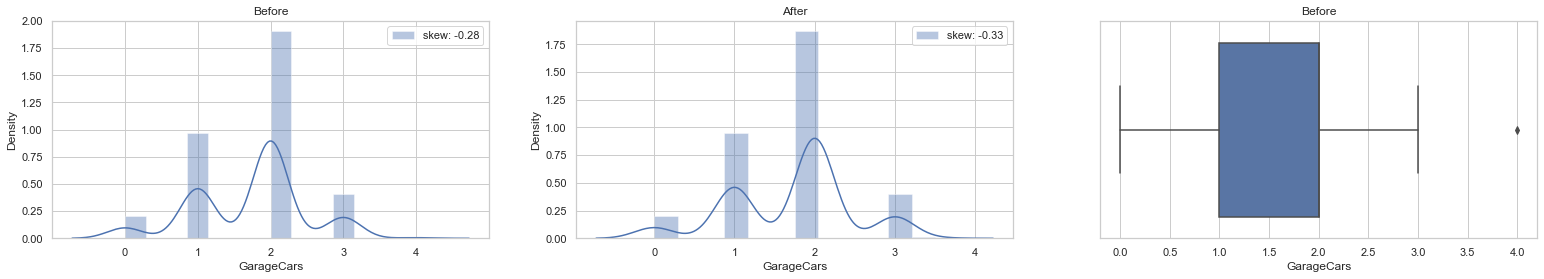

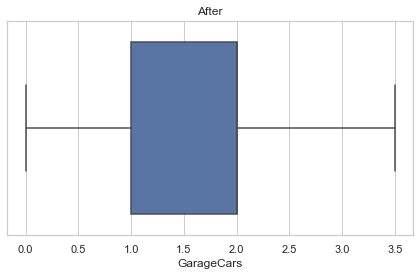

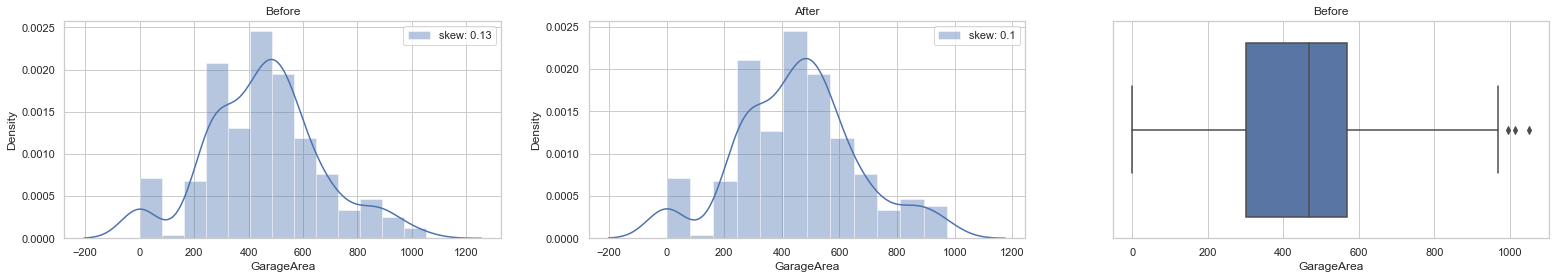

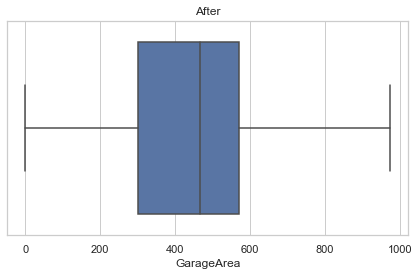

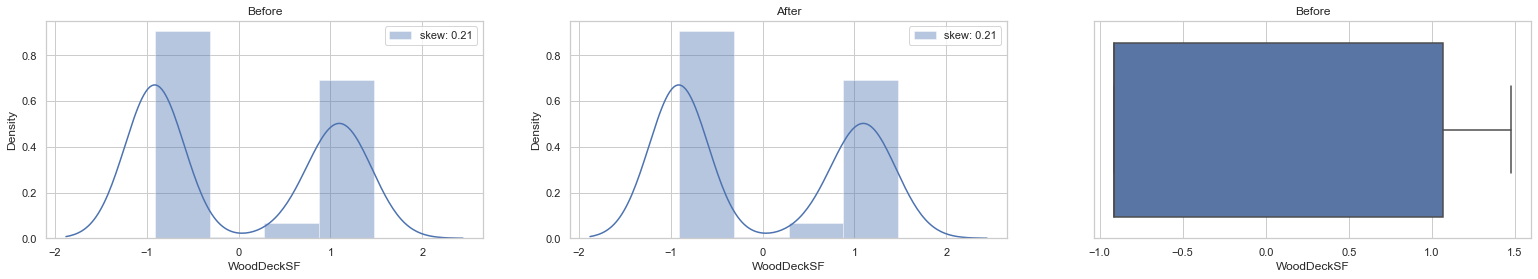

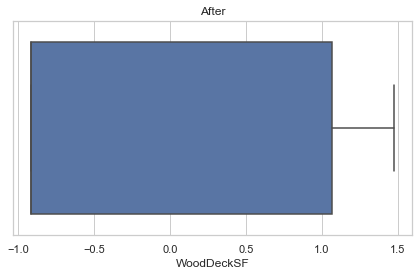

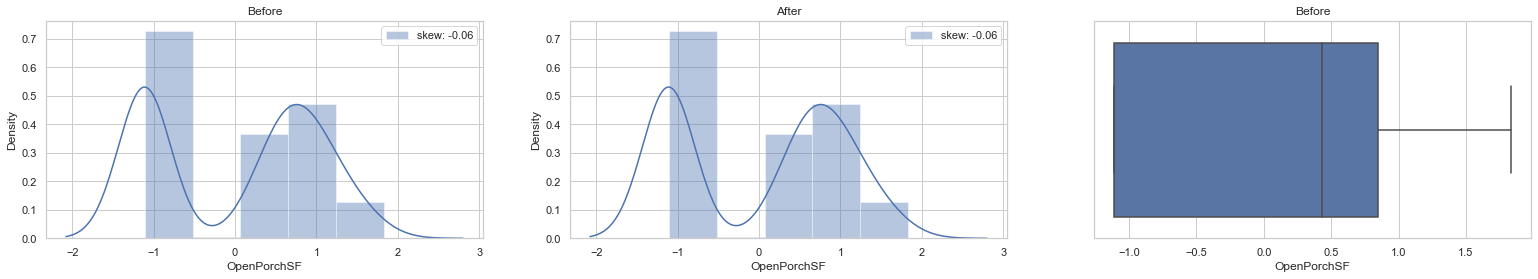

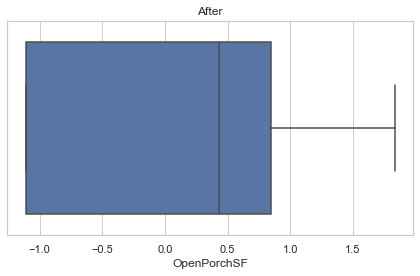

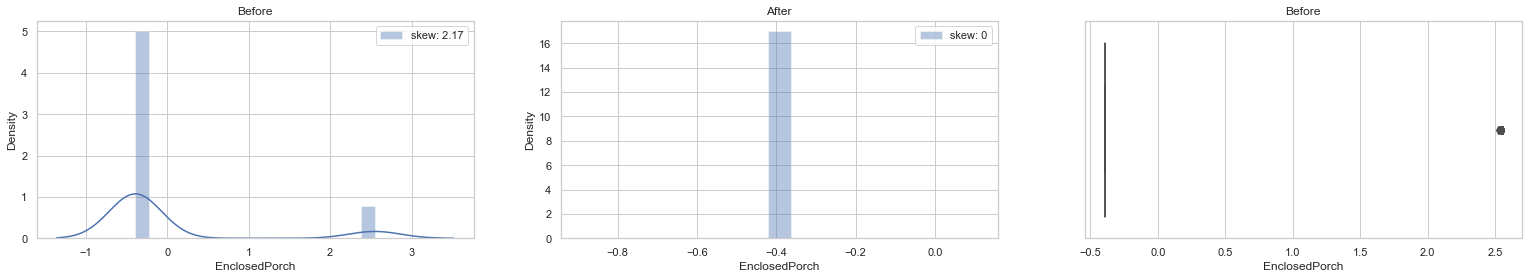

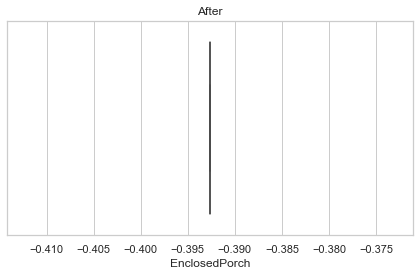

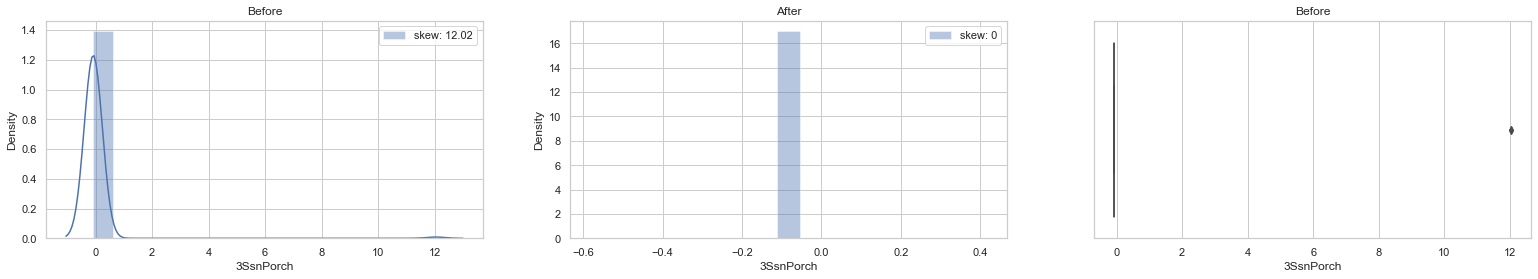

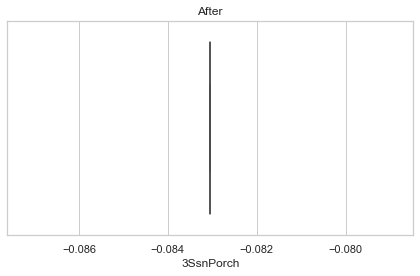

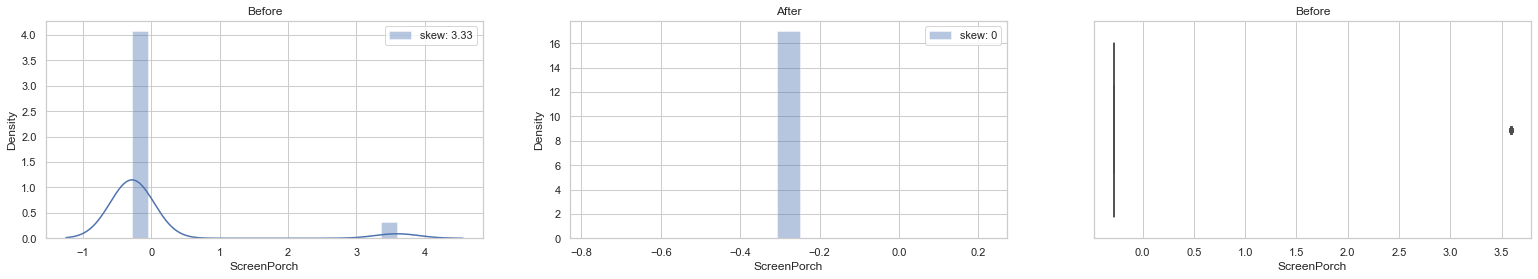

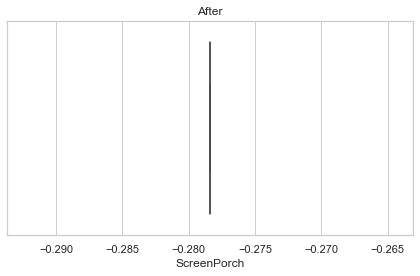

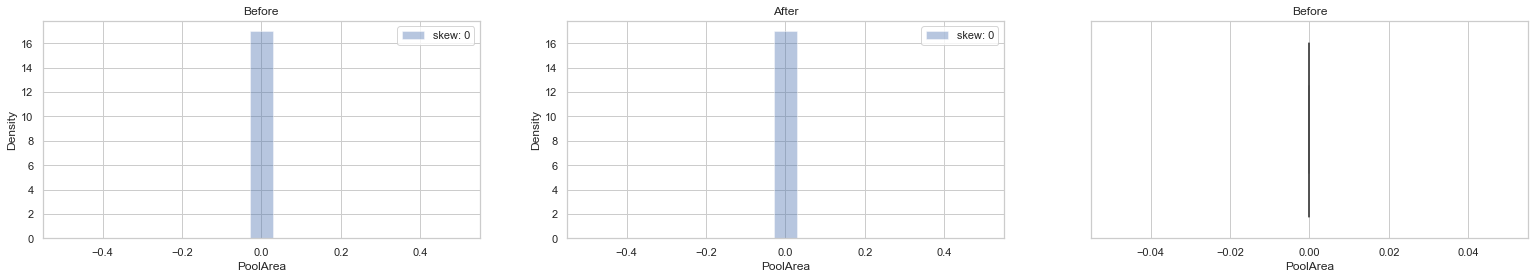

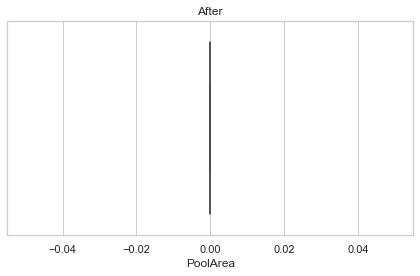

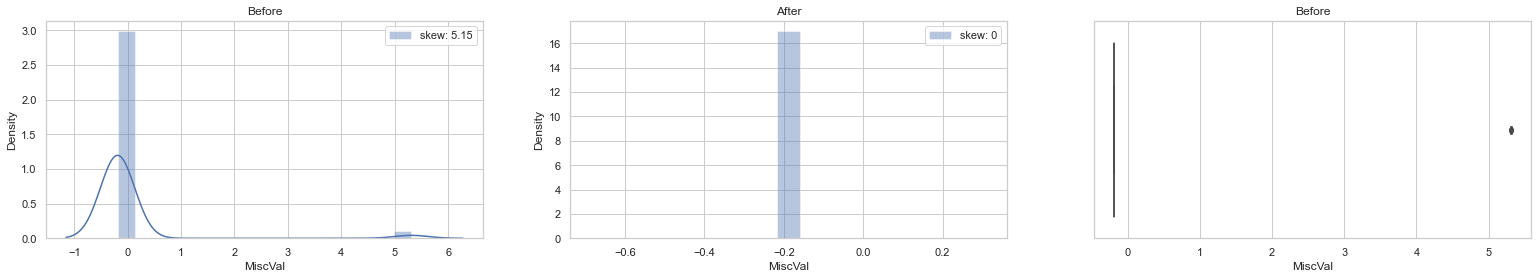

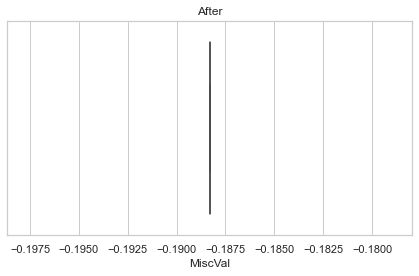

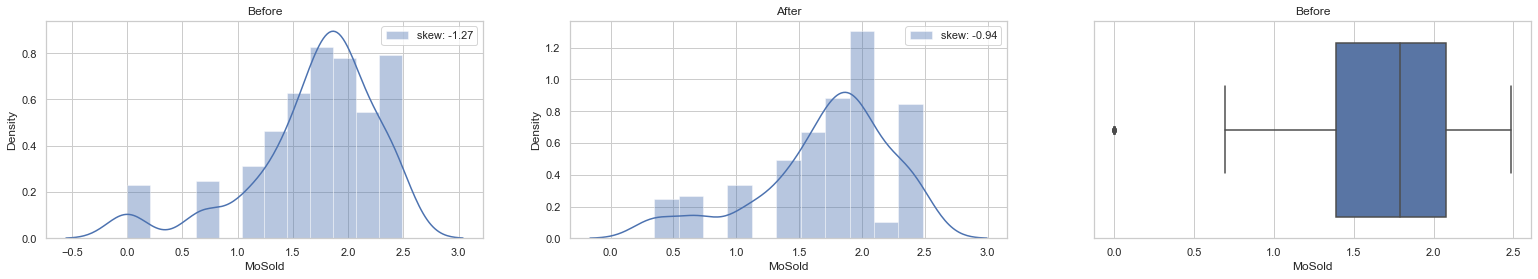

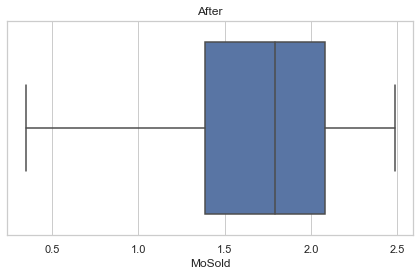

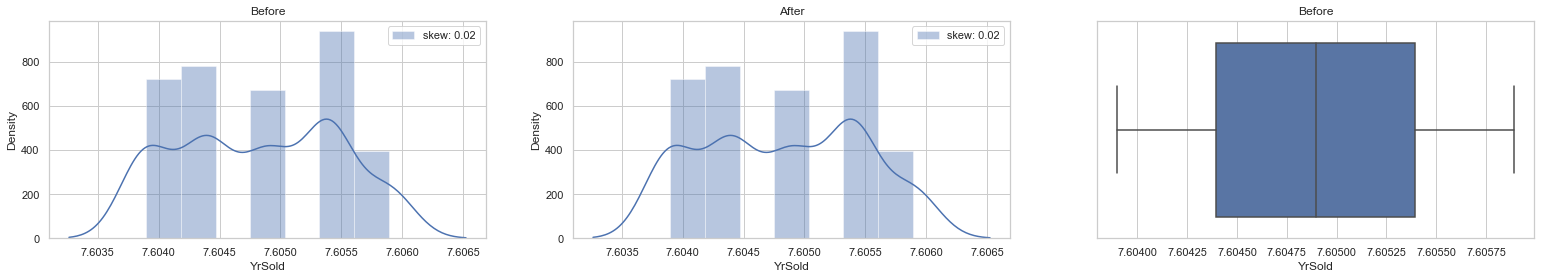

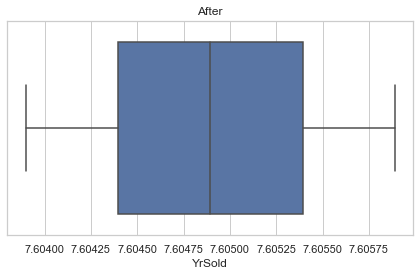

In [113]:
for i in num_col:
    
    plt.figure(figsize=(36,4))
    plt.subplot(141)
    sns.distplot(test[i],label="skew: "+str(np.round(test[i].skew(),2)))
    plt.legend()
    plt.title('Before')
    
    plt.subplot(142)
    sns.distplot(data_test[i],label="skew: "+str(np.round(data_test[i].skew(),2)))
    plt.legend()
    plt.title('After')
    
    plt.subplot(143)
    sns.boxplot(test[i])
    plt.title('Before')
    
    plt.figure(144)
    sns.boxplot(data_test[i])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [114]:
data_test

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley  \
0    5.820083    2.995732       RL     4.454347  9.557964   Pave  Missing   
1    6.925595    4.787492       RL     4.174387  8.668024   Pave  Missing   
2    6.834109    2.995732       RL     4.174387  9.379070   Pave  Missing   
3    7.045777    4.248495       RL     4.317488  9.392662   Pave  Missing   
4    7.112327    4.094345       RL     4.454347  9.588640   Pave  Missing   
..        ...         ...      ...          ...       ...    ...      ...   
287  4.418841    2.995732       RL     4.356709  9.230731   Pave  Missing   
288  6.954639    2.995732       RL     4.043051  9.131838   Pave  Missing   
289  2.833213    2.995732       RL     4.174387  9.327323   Pave  Missing   
290  6.259581    3.912023       RM     3.912023  8.517193   Pave  Missing   
291  7.229114    5.075174       RM     3.644138  8.158876   Pave  Missing   

    LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0        IR1         HLS    AllPub    Corner       Gtl      StoneBr   
1        IR1         Lvl    AllPub   CulDSac       Gtl      StoneBr   
2        Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
3        Reg         Bnk    AllPub    Inside       Gtl      Crawfor   
4        IR1         Lvl    AllPub   CulDSac       Gtl      Somerst   
..       ...         ...       ...       ...       ...          ...   
287      Reg         Lvl    AllPub    Inside       Gtl      Somerst   
288      IR2         Lvl    AllPub    Inside       Gtl      CollgCr   
289      IR1         Lvl    AllPub   CulDSac       Gtl        NAmes   
290      Reg         Lvl    AllPub    Corner       Gtl      BrkSide   
291      Reg         Lvl    AllPub    Inside       Gtl       BrDale   

    Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0         Norm       Norm     1Fam     1Story     2.197225     1.609438   
1         Norm       Norm   TwnhsE     1Story     2.079442     1.609438   
2         Norm       Norm     1Fam     1Story     2.079442     1.609438   
3         Norm       Norm     1Fam     2Story     1.945910     1.945910   
4        Feedr       Norm     1Fam     2Story     1.791759     1.609438   
..         ...        ...      ...        ...          ...          ...   
287       Norm       Norm     1Fam     1Story     2.079442     1.609438   
288       Norm       Norm     1Fam     1Story     1.609438     1.609438   
289       Norm       Norm     1Fam     1Story     1.791759     1.945910   
290      Feedr       Norm     1Fam     1.5Fin     1.791759     1.945910   
291       Norm       Norm    Twnhs     2Story     1.791759     1.609438   

     YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0    -1.416532     -1.445667       Hip  CompShg     VinylSd     VinylSd   
1    -0.005055      0.451735     Gable  CompShg     HdBoard     HdBoard   
2    -0.824418     -0.489875       Hip  CompShg     VinylSd     VinylSd   
3     1.052874      1.403199     Gable  CompShg     MetalSd     MetalSd   
4    -1.585761     -1.445667     Gable  CompShg     VinylSd     VinylSd   
..         ...           ...       ...      ...         ...         ...   
287  -1.585761     -1.445667     Gable  CompShg     VinylSd     VinylSd   
288  -0.465904     -0.129350     Gable  CompShg     VinylSd     VinylSd   
289   0.446037      0.943948     Gable  CompShg     Wd Sdng     Wd Sdng   
290   0.879459      1.338620     Gable  CompShg     CemntBd     CmentBd   
291   0.252298      0.734474     Gable  CompShg     HdBoard     HdBoard   

    MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0        Stone    1.190680        Gd        TA      PConc       Ex       TA   
1         None   -0.840837        Gd        TA     CBlock       Gd       TA   
2         None   -0.840837        Gd        TA      PConc       Gd       TA   
3         None   -0.840837        TA        TA     CBlock       TA       TA   
4        Stone    0.964275        Gd

In [115]:
#Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_test:
    data_test[i]=le.fit_transform(data_test[i].astype(str))

In [116]:
data_test

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0    5.820083    2.995732         1     4.454347  9.557964       0      1   
1    6.925595    4.787492         1     4.174387  8.668024       0      1   
2    6.834109    2.995732         1     4.174387  9.379070       0      1   
3    7.045777    4.248495         1     4.317488  9.392662       0      1   
4    7.112327    4.094345         1     4.454347  9.588640       0      1   
..        ...         ...       ...          ...       ...     ...    ...   
287  4.418841    2.995732         1     4.356709  9.230731       0      1   
288  6.954639    2.995732         1     4.043051  9.131838       0      1   
289  2.833213    2.995732         1     4.174387  9.327323       0      1   
290  6.259581    3.912023         2     3.912023  8.517193       0      1   
291  7.229114    5.075174         2     3.644138  8.158876       0      1   

     LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0           0            1          0          0          0            20   
1           0            3          0          1          0            20   
2           3            3          0          3          0             3   
3           3            0          0          3          0             4   
4           0            3          0          1          0            19   
..        ...          ...        ...        ...        ...           ...   
287         3            3          0          3          0            19   
288         1            3          0          3          0             3   
289         0            3          0          1          0            10   
290         3            3          0          0          0             1   
291         3            3          0          3          0             0   

     Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0             2           0         0           1     2.197225     1.609438   
1             2           0         4           1     2.079442     1.609438   
2             2           0         0           1     2.079442     1.609438   
3             2           0         0           2     1.945910     1.945910   
4             1           0         0           2     1.791759     1.609438   
..          ...         ...       ...         ...          ...          ...   
287           2           0         0           1     2.079442     1.609438   
288           2           0         0           1     1.609438     1.609438   
289           2           0         0           1     1.791759     1.945910   
290           1           0         0           0     1.791759     1.945910   
291           2           0         3           2     1.791759     1.609438   

     YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0    -1.416532     -1.445667          1         0            7            7   
1    -0.005055      0.451735          0         0            2            2   
2    -0.824418     -0.489875          1         0            7            7   
3     1.052874      1.403199          0         0            3            3   
4    -1.585761     -1.445667          0         0            7            7   
..         ...           ...        ...       ...          ...          ...   
287  -1.585761     -1.445667          0         0            7            7   
288  -0.465904     -0.129350          0         0            7            7   
289   0.446037      0.943948          0         0            8            8   
290   0.879459      1.338620          0         0            1            1   
291   0.252298      0.734474          0         0            2            2   

     MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0             3    1.190680          2          2           2         0   
1             1   -0.840837          2          2           1         2   
2             1   -0.840837          2

In [117]:
#dropping the columns that were dropped in train dataset
data_test.drop(['Id','Utilities','PoolQC','MiscFeature','Alley','BsmtFinSF2','3SsnPorch','ScreenPorch','PoolArea','EnclosedPorch','KitchenAbvGr','BsmtHalfBath','LowQualFinSF'],axis=1,inplace=True)

In [118]:
data_test.shape

(292, 67)

In [119]:
print(data.shape,'\t',data_test.shape)

(1168, 68) 	 (292, 67)


In [120]:
#Our shape for train and test data seems fine. Splitting the train data into x and y.
x=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [121]:
#Applying Min max scaler to transfomr the data into scale of 0-1.
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()

In [122]:
x_scale=mns.fit_transform(x)
x=pd.DataFrame(x_scale,columns=x.columns)

test_scale=mns.fit_transform(data_test)
test=pd.DataFrame(test_scale,columns=data_test.columns)

In [123]:
print(x.shape,'\t',y.shape)

(1168, 67) 	 (1168,)


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [125]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),Ridge(),Lasso(),ElasticNet()]
for j in model:
    print('For algorithm: ',j)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=48)
    j.fit(x_train,y_train)
    predict=j.predict(x_test)
    r2=r2_score(predict,y_test)
    print('R2 Score is: ',r2)
    print('Mean absolute error: ',mean_absolute_error(predict,y_test))
    print('Mean squared error: ',mean_squared_error(predict,y_test))
    print('Root mean squared error: ',np.sqrt(mean_squared_error(predict,y_test)))
    print('******************************************************************')

For algorithm:  LinearRegression()
R2 Score is:  0.9065550318353998
Mean absolute error:  0.08503571767485191
Mean squared error:  0.012422528770798288
Root mean squared error:  0.11145639851887504
******************************************************************
For algorithm:  DecisionTreeRegressor()
R2 Score is:  0.7428883809844333
Mean absolute error:  0.13502564854930243
Mean squared error:  0.03538866163859653
Root mean squared error:  0.18811874345369345
******************************************************************
For algorithm:  KNeighborsRegressor()
R2 Score is:  0.693139039220839
Mean absolute error:  0.1294099390470202
Mean squared error:  0.030109750700343777
Root mean squared error:  0.1735216145047751
******************************************************************
For algorithm:  SVR()
R2 Score is:  0.8842362752343607
Mean absolute error:  0.09409896218835395
Mean squared error:  0.014881427547773251
Root mean squared error:  0.12198945670742718
****************

> OBSERVATION
>> Models - Linear Regression, Decision Tree Regressor, Random forest Regresssor, Ridge performed well with the training data.

> Hyper parameter tuning 

In [126]:
from sklearn.model_selection import GridSearchCV

params={'criterion':['mse','mae']}
rf=RandomForestRegressor()
gd=GridSearchCV(rf,params)
gd.fit(x,y)
gd.best_params_

{'criterion': 'mse'}

In [127]:
params={'criterion':['mse', 'friedman_mse', 'mae', 'poisson']}
dt=DecisionTreeRegressor()
gd=GridSearchCV(dt,params)
gd.fit(x,y)
gd.best_params_

{'criterion': 'mse'}

In [128]:
params={'alpha':[0.001, 0.01, 0.1]}
rd=Ridge()
gd=GridSearchCV(rd,params)
gd.fit(x,y)
gd.best_params_

{'alpha': 0.1}

In [129]:
lr=LinearRegression(n_jobs=None)
rf=RandomForestRegressor(criterion='mse')
dt=DecisionTreeRegressor(criterion='mse')
rd=Ridge(alpha=0.1)

In [130]:
Models=[]
Models.append(('Linear Regression',lr))
Models.append(("Random Forest Regressor",rf))
Models.append(('Decision Tree Regressor',dt))
Models.append(('Ridge',rd))

In [131]:
from sklearn.model_selection import cross_val_score

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=48)
Model=[]
R2=[]
MAE=[]
MSE=[]
RMSE=[]
CVS=[]

for name,model in Models:
    print(name,':\n')
    Model.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #R2 score
    r2=r2_score(y_test,pred)
    print('R2 Score: ',r2)
    R2.append(r2*100)
    print('\n')
    
    #MAE
    mae=mean_absolute_error(pred,y_test)
    print('Mean absolute error: ',mae)
    MAE.append(mae)
    
    #MSE
    mse=mean_squared_error(pred,y_test)
    print('Mean squared error: ',mse)
    MSE.append(mse)
    
    #RMSE
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    print('Root mean squared error: ',rmse)
    RMSE.append(rmse)
    
    #cross val score
    cross_val=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross Val Score: ',cross_val)
    CVS.append(cross_val*100)
    print('\n')

Linear Regression :

LinearRegression()


R2 Score:  0.914919169126624


Mean absolute error:  0.08503571767485191
Mean squared error:  0.012422528770798288
Root mean squared error:  0.11145639851887504
Cross Val Score:  0.880983019769648


Random Forest Regressor :

RandomForestRegressor()


R2 Score:  0.8825281559031817


Mean absolute error:  0.09776756057324365
Mean squared error:  0.017151893653028594
Root mean squared error:  0.13096523833837967
Cross Val Score:  0.8689239839347778


Decision Tree Regressor :

DecisionTreeRegressor()


R2 Score:  0.7363061823107766


Mean absolute error:  0.14083097625671576
Mean squared error:  0.03850155203351548
Root mean squared error:  0.19621812361123903
Cross Val Score:  0.7173352884140686


Ridge :

Ridge(alpha=0.1)


R2 Score:  0.9152124827174967


Mean absolute error:  0.08483166595895497
Mean squared error:  0.012379702478623212
Root mean squared error:  0.11126411136850557
Cross Val Score:  0.8819696305033398




In [133]:
pd.DataFrame({"Model":Model,"R2 Score":R2,'Cross Val Score':CVS,'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE})

Model   R2 Score  Cross Val Score  Mean Absolute Error  \
0        Linear Regression  91.491917        88.098302             0.085036   
1  Random Forest Regressor  88.252816        86.892398             0.097768   
2  Decision Tree Regressor  73.630618        71.733529             0.140831   
3                    Ridge  91.521248        88.196963             0.084832   

   Mean Squared Error  Root Mean Squared Error  
0            0.012423                 0.111456  
1            0.017152                 0.130965  
2            0.038502                 0.196218  
3            0.012380                 0.111264

> Conclusion:
>>1. Working with training model we can say that Ridge regression performed best of all the models with R2 score 91.52 and cross validation score of 88.2%.
>>2. Saving Ridge regression as ridge also reduces the overfitting by model. 

In [134]:
#Saving Ridge 
import joblib
joblib.dump(rd,'house_prediction.pkl')

['house_prediction.pkl']

In [135]:
#Reading the saved model and predicting test data.
model=joblib.load('house_prediction.pkl')
model.predict(test)

array([12.68771215, 12.20989865, 12.4267008 , 12.10071047, 12.29531228,
       11.36697011, 11.75880915, 12.60180267, 12.41784193, 11.95852903,
       11.0900942 , 11.84060733, 11.72832427, 12.04854854, 12.58494927,
       11.83564221, 11.60746099, 11.65198907, 12.07815706, 12.26245269,
       11.95741712, 11.86845701, 11.89503037, 11.33271369, 11.52082783,
       11.72902338, 12.0808454 , 11.90539791, 12.04831815, 11.30924159,
       11.86011596, 12.14529298, 12.4125455 , 12.09466948, 11.64279715,
       12.03620675, 12.13535901, 11.69565357, 12.06196549, 11.92476522,
       11.43866528, 12.54748286, 12.34581501, 12.15954401, 11.81643057,
       11.79898662, 11.76269089, 11.36913943, 12.23327841, 12.70735774,
       11.86803951, 12.32731957, 11.44258058, 11.46341192, 12.40986636,
       11.78542303, 11.89921006, 12.16580212, 11.5337674 , 12.40034405,
       11.53175961, 12.15759254, 11.78063388, 11.84811036, 12.19847432,
       11.43438055, 11.9559823 , 12.31039889, 11.8612724 , 12.00